### 데이터 전처리

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv('train_santander.csv')
print('dataset shape :',cust_df.shape)
cust_df.head(3)

dataset shape : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [25]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [26]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [27]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [28]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df.drop('ID',axis=1,inplace=True)
cust_df['var3']=cust_df['var3'].replace(-999999,2)

cust_df.head(3)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [29]:
X_feature = cust_df.iloc[:,:-1]
y_label = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_feature.shape))

피처 데이터 shape:(76020, 369)


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_feature,y_label,test_size=0.2)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape : {0}, 테스트 세트 shape : {1}'.format(X_train.shape,X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율 ')
print(y_test.value_counts()/test_cnt)

학습 세트 shape : (60816, 369), 테스트 세트 shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.9608
1    0.0392
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율 
0    0.958958
1    0.041042
Name: TARGET, dtype: float64


In [31]:
# X_train,y_train을 다시 학습과 검증 데이터 세트로 분리
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.3)

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로 learning_rate는 0.05
xgb_clf = XGBClassifier(n_estimators =500,learning_rate = 0.05)

# 서능 평가 지표로 auc로, 조기중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',eval_set = [(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC_AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82113	validation_1-auc:0.80053
[1]	validation_0-auc:0.83132	validation_1-auc:0.81051
[2]	validation_0-auc:0.83249	validation_1-auc:0.81145
[3]	validation_0-auc:0.83265	validation_1-auc:0.80891
[4]	validation_0-auc:0.83543	validation_1-auc:0.81391
[5]	validation_0-auc:0.83704	validation_1-auc:0.81594
[6]	validation_0-auc:0.83715	validation_1-auc:0.81585
[7]	validation_0-auc:0.83881	validation_1-auc:0.81852
[8]	validation_0-auc:0.83914	validation_1-auc:0.81842
[9]	validation_0-auc:0.84059	validation_1-auc:0.81811
[10]	validation_0-auc:0.84158	validation_1-auc:0.81915
[11]	validation_0-auc:0.84214	validation_1-auc:0.81957
[12]	validation_0-auc:0.84256	validation_1-auc:0.81979
[13]	validation_0-auc:0.84425	validation_1-auc:0.82199
[14]	validation_0-auc:0.84499	validation_1-auc:0.82224
[15]	validation_0-auc:0.84569	validation_1-auc:0.82118
[16]	validation_0-auc:0.84598	validation_1-auc:0.82101
[17]	validation_0-auc:0.84653	validation_1-auc:0.82140
[18]	validation_0-au

[149]	validation_0-auc:0.90115	validation_1-auc:0.83543
[150]	validation_0-auc:0.90120	validation_1-auc:0.83548
[151]	validation_0-auc:0.90129	validation_1-auc:0.83548
[152]	validation_0-auc:0.90130	validation_1-auc:0.83555
[153]	validation_0-auc:0.90139	validation_1-auc:0.83556
[154]	validation_0-auc:0.90148	validation_1-auc:0.83564
[155]	validation_0-auc:0.90157	validation_1-auc:0.83558
[156]	validation_0-auc:0.90170	validation_1-auc:0.83550
[157]	validation_0-auc:0.90185	validation_1-auc:0.83529
[158]	validation_0-auc:0.90191	validation_1-auc:0.83527
[159]	validation_0-auc:0.90199	validation_1-auc:0.83531
[160]	validation_0-auc:0.90207	validation_1-auc:0.83534
[161]	validation_0-auc:0.90212	validation_1-auc:0.83535
[162]	validation_0-auc:0.90222	validation_1-auc:0.83534
[163]	validation_0-auc:0.90235	validation_1-auc:0.83533
[164]	validation_0-auc:0.90256	validation_1-auc:0.83520
[165]	validation_0-auc:0.90270	validation_1-auc:0.83525
[166]	validation_0-auc:0.90276	validation_1-auc:

In [33]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth' : hp.quniform('max_depth',5,15,1),
                    'min_child_weight' : hp.quniform('min_child_weight',1,6,1),
                    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,0.95),
                    'learning_rate' : hp.uniform('learning_rate',0.01,0.2),}


In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [35]:
# 목적 함수 설정
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.

def objective_fun(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
     # 3개 k-fold방식 적용 
    kf=KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index,val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr,y_tr = X_train.iloc[tr_index],y_train.iloc[tr_index]
        X_val,y_val = X_train.iloc[val_index],y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=30,eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)])
        
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val,xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.     
    return -1*np.mean(roc_auc_list)

In [36]:
from hyperopt import fmin,tpe,Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_fun,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print('best : ',best)

[0]	validation_0-auc:0.71269	validation_1-auc:0.69616                           
[1]	validation_0-auc:0.74044	validation_1-auc:0.71631                           
[2]	validation_0-auc:0.81988	validation_1-auc:0.80004                           
[3]	validation_0-auc:0.82973	validation_1-auc:0.81112                           
[4]	validation_0-auc:0.83521	validation_1-auc:0.81422                           
[5]	validation_0-auc:0.84236	validation_1-auc:0.82194                           
[6]	validation_0-auc:0.83984	validation_1-auc:0.81815                           
[7]	validation_0-auc:0.84407	validation_1-auc:0.82229                           
[8]	validation_0-auc:0.84471	validation_1-auc:0.82026                           
[9]	validation_0-auc:0.84460	validation_1-auc:0.81688                           
[10]	validation_0-auc:0.84915	validation_1-auc:0.82130                          
[11]	validation_0-auc:0.85228	validation_1-auc:0.82535                          
[12]	validation_0-auc:0.8553

[23]	validation_0-auc:0.87448	validation_1-auc:0.82873                          
[24]	validation_0-auc:0.87509	validation_1-auc:0.82892                          
[25]	validation_0-auc:0.87571	validation_1-auc:0.82788                          
[26]	validation_0-auc:0.87751	validation_1-auc:0.82799                          
[27]	validation_0-auc:0.87929	validation_1-auc:0.82875                          
[28]	validation_0-auc:0.88078	validation_1-auc:0.82869                          
[29]	validation_0-auc:0.88221	validation_1-auc:0.82980                          
[30]	validation_0-auc:0.88354	validation_1-auc:0.83014                          
[31]	validation_0-auc:0.88448	validation_1-auc:0.82960                          
[32]	validation_0-auc:0.88569	validation_1-auc:0.83009                          
[33]	validation_0-auc:0.88644	validation_1-auc:0.83046                          
[34]	validation_0-auc:0.88714	validation_1-auc:0.83096                          
[35]	validation_0-auc:0.8881

[49]	validation_0-auc:0.89474	validation_1-auc:0.83540                          
[50]	validation_0-auc:0.89534	validation_1-auc:0.83520                          
[51]	validation_0-auc:0.89635	validation_1-auc:0.83526                          
[52]	validation_0-auc:0.89671	validation_1-auc:0.83533                          
[53]	validation_0-auc:0.89749	validation_1-auc:0.83562                          
[54]	validation_0-auc:0.89808	validation_1-auc:0.83574                          
[55]	validation_0-auc:0.89824	validation_1-auc:0.83569                          
[56]	validation_0-auc:0.89894	validation_1-auc:0.83566                          
[57]	validation_0-auc:0.89920	validation_1-auc:0.83553                          
[58]	validation_0-auc:0.89938	validation_1-auc:0.83553                          
[59]	validation_0-auc:0.89961	validation_1-auc:0.83580                          
[60]	validation_0-auc:0.90033	validation_1-auc:0.83575                          
[61]	validation_0-auc:0.9004

[61]	validation_0-auc:0.88575	validation_1-auc:0.83724                          
[62]	validation_0-auc:0.88613	validation_1-auc:0.83764                          
[63]	validation_0-auc:0.88654	validation_1-auc:0.83803                          
[64]	validation_0-auc:0.88736	validation_1-auc:0.83780                          
[65]	validation_0-auc:0.88808	validation_1-auc:0.83811                          
[66]	validation_0-auc:0.88844	validation_1-auc:0.83843                          
[67]	validation_0-auc:0.88888	validation_1-auc:0.83844                          
[68]	validation_0-auc:0.88935	validation_1-auc:0.83869                          
[69]	validation_0-auc:0.88977	validation_1-auc:0.83889                          
[70]	validation_0-auc:0.89008	validation_1-auc:0.83900                          
[71]	validation_0-auc:0.89060	validation_1-auc:0.83894                          
[72]	validation_0-auc:0.89098	validation_1-auc:0.83894                          
[73]	validation_0-auc:0.8914

[62]	validation_0-auc:0.88942	validation_1-auc:0.83086                          
[63]	validation_0-auc:0.88997	validation_1-auc:0.83123                          
[64]	validation_0-auc:0.89056	validation_1-auc:0.83119                          
[65]	validation_0-auc:0.89090	validation_1-auc:0.83128                          
[66]	validation_0-auc:0.89126	validation_1-auc:0.83153                          
[67]	validation_0-auc:0.89193	validation_1-auc:0.83136                          
[68]	validation_0-auc:0.89248	validation_1-auc:0.83182                          
[69]	validation_0-auc:0.89327	validation_1-auc:0.83198                          
[70]	validation_0-auc:0.89336	validation_1-auc:0.83198                          
[71]	validation_0-auc:0.89393	validation_1-auc:0.83189                          
[72]	validation_0-auc:0.89434	validation_1-auc:0.83207                          
[73]	validation_0-auc:0.89471	validation_1-auc:0.83185                          
[74]	validation_0-auc:0.8950

[63]	validation_0-auc:0.88733	validation_1-auc:0.83451                          
[64]	validation_0-auc:0.88772	validation_1-auc:0.83458                          
[65]	validation_0-auc:0.88811	validation_1-auc:0.83445                          
[66]	validation_0-auc:0.88856	validation_1-auc:0.83473                          
[67]	validation_0-auc:0.88906	validation_1-auc:0.83429                          
[68]	validation_0-auc:0.88931	validation_1-auc:0.83418                          
[69]	validation_0-auc:0.88973	validation_1-auc:0.83404                          
[70]	validation_0-auc:0.89000	validation_1-auc:0.83436                          
[71]	validation_0-auc:0.89030	validation_1-auc:0.83423                          
[72]	validation_0-auc:0.89081	validation_1-auc:0.83442                          
[73]	validation_0-auc:0.89114	validation_1-auc:0.83440                          
[74]	validation_0-auc:0.89132	validation_1-auc:0.83449                          
[75]	validation_0-auc:0.8917

[64]	validation_0-auc:0.90967	validation_1-auc:0.83438                          
[65]	validation_0-auc:0.91041	validation_1-auc:0.83457                          
[66]	validation_0-auc:0.91076	validation_1-auc:0.83483                          
[67]	validation_0-auc:0.91115	validation_1-auc:0.83425                          
[68]	validation_0-auc:0.91160	validation_1-auc:0.83437                          
[69]	validation_0-auc:0.91256	validation_1-auc:0.83453                          
[70]	validation_0-auc:0.91301	validation_1-auc:0.83469                          
[71]	validation_0-auc:0.91341	validation_1-auc:0.83445                          
[72]	validation_0-auc:0.91420	validation_1-auc:0.83452                          
[73]	validation_0-auc:0.91498	validation_1-auc:0.83453                          
[74]	validation_0-auc:0.91553	validation_1-auc:0.83487                          
[75]	validation_0-auc:0.91597	validation_1-auc:0.83533                          
[76]	validation_0-auc:0.9166

[65]	validation_0-auc:0.91121	validation_1-auc:0.82619                          
[66]	validation_0-auc:0.91180	validation_1-auc:0.82678                          
[67]	validation_0-auc:0.91255	validation_1-auc:0.82662                          
[68]	validation_0-auc:0.91316	validation_1-auc:0.82692                          
[69]	validation_0-auc:0.91407	validation_1-auc:0.82770                          
[70]	validation_0-auc:0.91451	validation_1-auc:0.82809                          
[71]	validation_0-auc:0.91481	validation_1-auc:0.82805                          
[72]	validation_0-auc:0.91557	validation_1-auc:0.82828                          
[73]	validation_0-auc:0.91592	validation_1-auc:0.82838                          
[74]	validation_0-auc:0.91656	validation_1-auc:0.82852                          
[75]	validation_0-auc:0.91698	validation_1-auc:0.82872                          
[76]	validation_0-auc:0.91788	validation_1-auc:0.82925                          
[77]	validation_0-auc:0.9181

[66]	validation_0-auc:0.91085	validation_1-auc:0.82994                          
[67]	validation_0-auc:0.91176	validation_1-auc:0.82962                          
[68]	validation_0-auc:0.91230	validation_1-auc:0.82999                          
[69]	validation_0-auc:0.91295	validation_1-auc:0.83015                          
[70]	validation_0-auc:0.91360	validation_1-auc:0.83027                          
[71]	validation_0-auc:0.91401	validation_1-auc:0.83018                          
[72]	validation_0-auc:0.91482	validation_1-auc:0.83073                          
[73]	validation_0-auc:0.91512	validation_1-auc:0.83045                          
[74]	validation_0-auc:0.91556	validation_1-auc:0.83051                          
[75]	validation_0-auc:0.91595	validation_1-auc:0.83052                          
[76]	validation_0-auc:0.91659	validation_1-auc:0.83071                          
[77]	validation_0-auc:0.91685	validation_1-auc:0.83069                          
[78]	validation_0-auc:0.9171

[67]	validation_0-auc:0.94451	validation_1-auc:0.83050                          
[68]	validation_0-auc:0.94550	validation_1-auc:0.83027                          
[69]	validation_0-auc:0.94643	validation_1-auc:0.83030                          
[70]	validation_0-auc:0.94695	validation_1-auc:0.83031                          
[71]	validation_0-auc:0.94752	validation_1-auc:0.83012                          
[72]	validation_0-auc:0.94827	validation_1-auc:0.83030                          
[73]	validation_0-auc:0.94904	validation_1-auc:0.83003                          
[74]	validation_0-auc:0.94947	validation_1-auc:0.83017                          
[75]	validation_0-auc:0.94969	validation_1-auc:0.83042                          
[76]	validation_0-auc:0.95066	validation_1-auc:0.83053                          
[77]	validation_0-auc:0.95132	validation_1-auc:0.83048                          
[78]	validation_0-auc:0.95153	validation_1-auc:0.83032                          
[79]	validation_0-auc:0.9520

[11]	validation_0-auc:0.87038	validation_1-auc:0.81731                          
[12]	validation_0-auc:0.87381	validation_1-auc:0.81935                          
[13]	validation_0-auc:0.87406	validation_1-auc:0.81833                          
[14]	validation_0-auc:0.87672	validation_1-auc:0.81934                          
[15]	validation_0-auc:0.87888	validation_1-auc:0.82184                          
[16]	validation_0-auc:0.87995	validation_1-auc:0.82309                          
[17]	validation_0-auc:0.88114	validation_1-auc:0.82345                          
[18]	validation_0-auc:0.88308	validation_1-auc:0.82374                          
[19]	validation_0-auc:0.88354	validation_1-auc:0.82404                          
[20]	validation_0-auc:0.88447	validation_1-auc:0.82445                          
[21]	validation_0-auc:0.88667	validation_1-auc:0.82479                          
[22]	validation_0-auc:0.88798	validation_1-auc:0.82420                          
[23]	validation_0-auc:0.8891

[12]	validation_0-auc:0.87069	validation_1-auc:0.83180                          
[13]	validation_0-auc:0.87179	validation_1-auc:0.83296                          
[14]	validation_0-auc:0.87481	validation_1-auc:0.83332                          
[15]	validation_0-auc:0.87702	validation_1-auc:0.83385                          
[16]	validation_0-auc:0.87883	validation_1-auc:0.83409                          
[17]	validation_0-auc:0.88172	validation_1-auc:0.83439                          
[18]	validation_0-auc:0.88354	validation_1-auc:0.83430                          
[19]	validation_0-auc:0.88459	validation_1-auc:0.83518                          
[20]	validation_0-auc:0.88650	validation_1-auc:0.83553                          
[21]	validation_0-auc:0.88905	validation_1-auc:0.83602                          
[22]	validation_0-auc:0.89090	validation_1-auc:0.83591                          
[23]	validation_0-auc:0.89296	validation_1-auc:0.83538                          
[24]	validation_0-auc:0.8944

[45]	validation_0-auc:0.92625	validation_1-auc:0.82984                          
[46]	validation_0-auc:0.92680	validation_1-auc:0.82963                          
[47]	validation_0-auc:0.92717	validation_1-auc:0.82977                          
[48]	validation_0-auc:0.92754	validation_1-auc:0.82958                          
[49]	validation_0-auc:0.92794	validation_1-auc:0.82957                          
[50]	validation_0-auc:0.92866	validation_1-auc:0.82947                          
[51]	validation_0-auc:0.92914	validation_1-auc:0.82934                          
[52]	validation_0-auc:0.92946	validation_1-auc:0.82929                          
[53]	validation_0-auc:0.92976	validation_1-auc:0.82914                          
[54]	validation_0-auc:0.93019	validation_1-auc:0.82908                          
[55]	validation_0-auc:0.93050	validation_1-auc:0.82912                          
[56]	validation_0-auc:0.93074	validation_1-auc:0.82941                          
[57]	validation_0-auc:0.9311

[22]	validation_0-auc:0.91977	validation_1-auc:0.82802                          
[23]	validation_0-auc:0.92156	validation_1-auc:0.82839                          
[24]	validation_0-auc:0.92278	validation_1-auc:0.82941                          
[25]	validation_0-auc:0.92569	validation_1-auc:0.82790                          
[26]	validation_0-auc:0.92723	validation_1-auc:0.82871                          
[27]	validation_0-auc:0.92876	validation_1-auc:0.82828                          
[28]	validation_0-auc:0.92979	validation_1-auc:0.82887                          
[29]	validation_0-auc:0.93098	validation_1-auc:0.82817                          
[30]	validation_0-auc:0.93227	validation_1-auc:0.82792                          
[31]	validation_0-auc:0.93402	validation_1-auc:0.82665                          
[32]	validation_0-auc:0.93481	validation_1-auc:0.82726                          
[33]	validation_0-auc:0.93532	validation_1-auc:0.82724                          
[34]	validation_0-auc:0.9365

[69]	validation_0-auc:0.94998	validation_1-auc:0.82509                          
[70]	validation_0-auc:0.95016	validation_1-auc:0.82520                          
[71]	validation_0-auc:0.95030	validation_1-auc:0.82491                          
[72]	validation_0-auc:0.95055	validation_1-auc:0.82467                          
[73]	validation_0-auc:0.95066	validation_1-auc:0.82461                          
[0]	validation_0-auc:0.75118	validation_1-auc:0.73411                           
[1]	validation_0-auc:0.76536	validation_1-auc:0.74536                           
[2]	validation_0-auc:0.84170	validation_1-auc:0.80002                           
[3]	validation_0-auc:0.85675	validation_1-auc:0.81122                           
[4]	validation_0-auc:0.86427	validation_1-auc:0.81357                           
[5]	validation_0-auc:0.87015	validation_1-auc:0.81710                           
[6]	validation_0-auc:0.87447	validation_1-auc:0.81812                           
[7]	validation_0-auc:0.87703

[27]	validation_0-auc:0.85847	validation_1-auc:0.83035                          
[28]	validation_0-auc:0.85894	validation_1-auc:0.83050                          
[29]	validation_0-auc:0.85931	validation_1-auc:0.83083                          
[30]	validation_0-auc:0.85966	validation_1-auc:0.83132                          
[31]	validation_0-auc:0.86078	validation_1-auc:0.83093                          
[32]	validation_0-auc:0.86100	validation_1-auc:0.83116                          
[33]	validation_0-auc:0.86146	validation_1-auc:0.83122                          
[34]	validation_0-auc:0.86142	validation_1-auc:0.83185                          
[35]	validation_0-auc:0.86167	validation_1-auc:0.83181                          
[36]	validation_0-auc:0.86179	validation_1-auc:0.83225                          
[37]	validation_0-auc:0.86199	validation_1-auc:0.83224                          
[38]	validation_0-auc:0.86302	validation_1-auc:0.83240                          
[39]	validation_0-auc:0.8636

[28]	validation_0-auc:0.86190	validation_1-auc:0.82598                          
[29]	validation_0-auc:0.86334	validation_1-auc:0.82571                          
[30]	validation_0-auc:0.86421	validation_1-auc:0.82560                          
[31]	validation_0-auc:0.86592	validation_1-auc:0.82508                          
[32]	validation_0-auc:0.86623	validation_1-auc:0.82517                          
[33]	validation_0-auc:0.86642	validation_1-auc:0.82536                          
[34]	validation_0-auc:0.86660	validation_1-auc:0.82530                          
[35]	validation_0-auc:0.86676	validation_1-auc:0.82507                          
[36]	validation_0-auc:0.86696	validation_1-auc:0.82557                          
[37]	validation_0-auc:0.86739	validation_1-auc:0.82600                          
[38]	validation_0-auc:0.86814	validation_1-auc:0.82564                          
[39]	validation_0-auc:0.86835	validation_1-auc:0.82560                          
[40]	validation_0-auc:0.8685

[29]	validation_0-auc:0.86066	validation_1-auc:0.82692                          
[30]	validation_0-auc:0.86139	validation_1-auc:0.82688                          
[31]	validation_0-auc:0.86202	validation_1-auc:0.82717                          
[32]	validation_0-auc:0.86224	validation_1-auc:0.82710                          
[33]	validation_0-auc:0.86260	validation_1-auc:0.82739                          
[34]	validation_0-auc:0.86297	validation_1-auc:0.82741                          
[35]	validation_0-auc:0.86326	validation_1-auc:0.82741                          
[36]	validation_0-auc:0.86362	validation_1-auc:0.82745                          
[37]	validation_0-auc:0.86432	validation_1-auc:0.82737                          
[38]	validation_0-auc:0.86484	validation_1-auc:0.82754                          
[39]	validation_0-auc:0.86499	validation_1-auc:0.82759                          
[40]	validation_0-auc:0.86574	validation_1-auc:0.82797                          
[41]	validation_0-auc:0.8665

[30]	validation_0-auc:0.85975	validation_1-auc:0.83306                          
[31]	validation_0-auc:0.85999	validation_1-auc:0.83217                          
[32]	validation_0-auc:0.86260	validation_1-auc:0.83348                          
[33]	validation_0-auc:0.86358	validation_1-auc:0.83496                          
[34]	validation_0-auc:0.86471	validation_1-auc:0.83561                          
[35]	validation_0-auc:0.86501	validation_1-auc:0.83513                          
[36]	validation_0-auc:0.86625	validation_1-auc:0.83659                          
[37]	validation_0-auc:0.86706	validation_1-auc:0.83739                          
[38]	validation_0-auc:0.86799	validation_1-auc:0.83814                          
[39]	validation_0-auc:0.86808	validation_1-auc:0.83855                          
[40]	validation_0-auc:0.86892	validation_1-auc:0.83811                          
[41]	validation_0-auc:0.86971	validation_1-auc:0.83877                          
[42]	validation_0-auc:0.8703

[31]	validation_0-auc:0.86391	validation_1-auc:0.82571                          
[32]	validation_0-auc:0.86569	validation_1-auc:0.82710                          
[33]	validation_0-auc:0.86660	validation_1-auc:0.82789                          
[34]	validation_0-auc:0.86789	validation_1-auc:0.82810                          
[35]	validation_0-auc:0.86846	validation_1-auc:0.82759                          
[36]	validation_0-auc:0.86942	validation_1-auc:0.82785                          
[37]	validation_0-auc:0.87009	validation_1-auc:0.82806                          
[38]	validation_0-auc:0.87133	validation_1-auc:0.82900                          
[39]	validation_0-auc:0.87149	validation_1-auc:0.82904                          
[40]	validation_0-auc:0.87200	validation_1-auc:0.82901                          
[41]	validation_0-auc:0.87243	validation_1-auc:0.82927                          
[42]	validation_0-auc:0.87311	validation_1-auc:0.82968                          
[43]	validation_0-auc:0.8736

[32]	validation_0-auc:0.85999	validation_1-auc:0.83050                          
[33]	validation_0-auc:0.86101	validation_1-auc:0.83113                          
[34]	validation_0-auc:0.86240	validation_1-auc:0.83167                          
[35]	validation_0-auc:0.86294	validation_1-auc:0.83161                          
[36]	validation_0-auc:0.86442	validation_1-auc:0.83294                          
[37]	validation_0-auc:0.86515	validation_1-auc:0.83369                          
[38]	validation_0-auc:0.86607	validation_1-auc:0.83446                          
[39]	validation_0-auc:0.86721	validation_1-auc:0.83431                          
[40]	validation_0-auc:0.86753	validation_1-auc:0.83415                          
[41]	validation_0-auc:0.86847	validation_1-auc:0.83491                          
[42]	validation_0-auc:0.86911	validation_1-auc:0.83520                          
[43]	validation_0-auc:0.86971	validation_1-auc:0.83512                          
[44]	validation_0-auc:0.8702

[35]	validation_0-auc:0.96586	validation_1-auc:0.82165                          
[36]	validation_0-auc:0.96616	validation_1-auc:0.82187                          
[37]	validation_0-auc:0.96666	validation_1-auc:0.82182                          
[38]	validation_0-auc:0.96680	validation_1-auc:0.82198                          
[39]	validation_0-auc:0.96713	validation_1-auc:0.82284                          
[40]	validation_0-auc:0.96727	validation_1-auc:0.82260                          
[41]	validation_0-auc:0.96745	validation_1-auc:0.82229                          
[42]	validation_0-auc:0.96778	validation_1-auc:0.82244                          
[43]	validation_0-auc:0.96822	validation_1-auc:0.82201                          
[44]	validation_0-auc:0.96857	validation_1-auc:0.82184                          
[45]	validation_0-auc:0.96895	validation_1-auc:0.82105                          
[46]	validation_0-auc:0.96915	validation_1-auc:0.82138                          
[47]	validation_0-auc:0.9695

[66]	validation_0-auc:0.97239	validation_1-auc:0.82142                          
[67]	validation_0-auc:0.97291	validation_1-auc:0.82103                          
[68]	validation_0-auc:0.97324	validation_1-auc:0.82088                          
[69]	validation_0-auc:0.97341	validation_1-auc:0.82070                          
[70]	validation_0-auc:0.97350	validation_1-auc:0.82058                          
[71]	validation_0-auc:0.97353	validation_1-auc:0.82041                          
[72]	validation_0-auc:0.97410	validation_1-auc:0.82043                          
[73]	validation_0-auc:0.97423	validation_1-auc:0.82046                          
[74]	validation_0-auc:0.97437	validation_1-auc:0.82038                          
[75]	validation_0-auc:0.97459	validation_1-auc:0.82078                          
[0]	validation_0-auc:0.73423	validation_1-auc:0.71897                           
[1]	validation_0-auc:0.76449	validation_1-auc:0.73563                           
[2]	validation_0-auc:0.84946

[41]	validation_0-auc:0.84157	validation_1-auc:0.82524                          
[42]	validation_0-auc:0.84171	validation_1-auc:0.82567                          
[43]	validation_0-auc:0.84261	validation_1-auc:0.82614                          
[44]	validation_0-auc:0.84257	validation_1-auc:0.82626                          
[45]	validation_0-auc:0.84325	validation_1-auc:0.82675                          
[46]	validation_0-auc:0.84328	validation_1-auc:0.82675                          
[47]	validation_0-auc:0.84356	validation_1-auc:0.82705                          
[48]	validation_0-auc:0.84404	validation_1-auc:0.82753                          
[49]	validation_0-auc:0.84407	validation_1-auc:0.82773                          
[50]	validation_0-auc:0.84402	validation_1-auc:0.82770                          
[51]	validation_0-auc:0.84448	validation_1-auc:0.82811                          
[52]	validation_0-auc:0.84446	validation_1-auc:0.82806                          
[53]	validation_0-auc:0.8449

[42]	validation_0-auc:0.84628	validation_1-auc:0.82265                          
[43]	validation_0-auc:0.84662	validation_1-auc:0.82283                          
[44]	validation_0-auc:0.84723	validation_1-auc:0.82336                          
[45]	validation_0-auc:0.84722	validation_1-auc:0.82321                          
[46]	validation_0-auc:0.84774	validation_1-auc:0.82354                          
[47]	validation_0-auc:0.84814	validation_1-auc:0.82386                          
[48]	validation_0-auc:0.84812	validation_1-auc:0.82379                          
[49]	validation_0-auc:0.84810	validation_1-auc:0.82369                          
[50]	validation_0-auc:0.84861	validation_1-auc:0.82377                          
[51]	validation_0-auc:0.84869	validation_1-auc:0.82396                          
[52]	validation_0-auc:0.84924	validation_1-auc:0.82427                          
[53]	validation_0-auc:0.84923	validation_1-auc:0.82422                          
[54]	validation_0-auc:0.8499

[43]	validation_0-auc:0.84435	validation_1-auc:0.82259                          
[44]	validation_0-auc:0.84438	validation_1-auc:0.82262                          
[45]	validation_0-auc:0.84482	validation_1-auc:0.82293                          
[46]	validation_0-auc:0.84474	validation_1-auc:0.82286                          
[47]	validation_0-auc:0.84488	validation_1-auc:0.82308                          
[48]	validation_0-auc:0.84491	validation_1-auc:0.82323                          
[49]	validation_0-auc:0.84504	validation_1-auc:0.82309                          
[50]	validation_0-auc:0.84516	validation_1-auc:0.82291                          
[51]	validation_0-auc:0.84509	validation_1-auc:0.82287                          
[52]	validation_0-auc:0.84510	validation_1-auc:0.82283                          
[53]	validation_0-auc:0.84501	validation_1-auc:0.82289                          
[54]	validation_0-auc:0.84541	validation_1-auc:0.82296                          
[55]	validation_0-auc:0.8457

[44]	validation_0-auc:0.91366	validation_1-auc:0.83286                          
[45]	validation_0-auc:0.91497	validation_1-auc:0.83289                          
[46]	validation_0-auc:0.91627	validation_1-auc:0.83295                          
[47]	validation_0-auc:0.91696	validation_1-auc:0.83340                          
[48]	validation_0-auc:0.91763	validation_1-auc:0.83320                          
[49]	validation_0-auc:0.91837	validation_1-auc:0.83278                          
[50]	validation_0-auc:0.91976	validation_1-auc:0.83297                          
[51]	validation_0-auc:0.92083	validation_1-auc:0.83284                          
[52]	validation_0-auc:0.92162	validation_1-auc:0.83316                          
[53]	validation_0-auc:0.92244	validation_1-auc:0.83318                          
[54]	validation_0-auc:0.92350	validation_1-auc:0.83292                          
[55]	validation_0-auc:0.92422	validation_1-auc:0.83315                          
[56]	validation_0-auc:0.9248

[46]	validation_0-auc:0.91822	validation_1-auc:0.82704                          
[47]	validation_0-auc:0.91853	validation_1-auc:0.82718                          
[48]	validation_0-auc:0.91882	validation_1-auc:0.82725                          
[49]	validation_0-auc:0.91946	validation_1-auc:0.82726                          
[50]	validation_0-auc:0.92053	validation_1-auc:0.82688                          
[51]	validation_0-auc:0.92141	validation_1-auc:0.82693                          
[52]	validation_0-auc:0.92217	validation_1-auc:0.82666                          
[53]	validation_0-auc:0.92333	validation_1-auc:0.82657                          
[54]	validation_0-auc:0.92438	validation_1-auc:0.82644                          
[55]	validation_0-auc:0.92539	validation_1-auc:0.82692                          
[56]	validation_0-auc:0.92610	validation_1-auc:0.82725                          
[57]	validation_0-auc:0.92670	validation_1-auc:0.82744                          
[58]	validation_0-auc:0.9277

[47]	validation_0-auc:0.91875	validation_1-auc:0.82898                          
[48]	validation_0-auc:0.91954	validation_1-auc:0.82899                          
[49]	validation_0-auc:0.92020	validation_1-auc:0.82943                          
[50]	validation_0-auc:0.92083	validation_1-auc:0.82959                          
[51]	validation_0-auc:0.92166	validation_1-auc:0.82973                          
[52]	validation_0-auc:0.92246	validation_1-auc:0.82975                          
[53]	validation_0-auc:0.92315	validation_1-auc:0.82969                          
[54]	validation_0-auc:0.92409	validation_1-auc:0.82912                          
[55]	validation_0-auc:0.92461	validation_1-auc:0.82941                          
[56]	validation_0-auc:0.92508	validation_1-auc:0.82917                          
[57]	validation_0-auc:0.92582	validation_1-auc:0.82936                          
[58]	validation_0-auc:0.92653	validation_1-auc:0.82947                          
[59]	validation_0-auc:0.9268

[4]	validation_0-auc:0.85967	validation_1-auc:0.82095                           
[5]	validation_0-auc:0.86618	validation_1-auc:0.82291                           
[6]	validation_0-auc:0.86991	validation_1-auc:0.81852                           
[7]	validation_0-auc:0.87501	validation_1-auc:0.81954                           
[8]	validation_0-auc:0.87778	validation_1-auc:0.81692                           
[9]	validation_0-auc:0.88163	validation_1-auc:0.81900                           
[10]	validation_0-auc:0.88520	validation_1-auc:0.82132                          
[11]	validation_0-auc:0.88879	validation_1-auc:0.82482                          
[12]	validation_0-auc:0.89115	validation_1-auc:0.82497                          
[13]	validation_0-auc:0.89346	validation_1-auc:0.82261                          
[14]	validation_0-auc:0.89666	validation_1-auc:0.82476                          
[15]	validation_0-auc:0.89991	validation_1-auc:0.82451                          
[16]	validation_0-auc:0.9019

[32]	validation_0-auc:0.92453	validation_1-auc:0.83046                          
[33]	validation_0-auc:0.92536	validation_1-auc:0.83069                          
[34]	validation_0-auc:0.92640	validation_1-auc:0.83067                          
[35]	validation_0-auc:0.92752	validation_1-auc:0.83099                          
[36]	validation_0-auc:0.92777	validation_1-auc:0.83092                          
[37]	validation_0-auc:0.92902	validation_1-auc:0.83117                          
[38]	validation_0-auc:0.92931	validation_1-auc:0.83138                          
[39]	validation_0-auc:0.93037	validation_1-auc:0.83116                          
[40]	validation_0-auc:0.93057	validation_1-auc:0.83098                          
[41]	validation_0-auc:0.93135	validation_1-auc:0.83008                          
[42]	validation_0-auc:0.93157	validation_1-auc:0.83035                          
[43]	validation_0-auc:0.93176	validation_1-auc:0.83023                          
[44]	validation_0-auc:0.9320

[84]	validation_0-auc:0.91957	validation_1-auc:0.83197                          
[85]	validation_0-auc:0.92068	validation_1-auc:0.83225                          
[86]	validation_0-auc:0.92139	validation_1-auc:0.83175                          
[87]	validation_0-auc:0.92232	validation_1-auc:0.83187                          
[88]	validation_0-auc:0.92322	validation_1-auc:0.83166                          
[89]	validation_0-auc:0.92388	validation_1-auc:0.83179                          
[90]	validation_0-auc:0.92486	validation_1-auc:0.83203                          
[91]	validation_0-auc:0.92526	validation_1-auc:0.83195                          
[92]	validation_0-auc:0.92629	validation_1-auc:0.83205                          
[93]	validation_0-auc:0.92713	validation_1-auc:0.83212                          
[94]	validation_0-auc:0.92777	validation_1-auc:0.83217                          
[95]	validation_0-auc:0.92820	validation_1-auc:0.83216                          
[96]	validation_0-auc:0.9288

[6]	validation_0-auc:0.85459	validation_1-auc:0.81085                           
[7]	validation_0-auc:0.85740	validation_1-auc:0.81208                           
[8]	validation_0-auc:0.85686	validation_1-auc:0.81045                           
[9]	validation_0-auc:0.85560	validation_1-auc:0.80944                           
[10]	validation_0-auc:0.85775	validation_1-auc:0.81090                          
[11]	validation_0-auc:0.85971	validation_1-auc:0.81216                          
[12]	validation_0-auc:0.86330	validation_1-auc:0.81514                          
[13]	validation_0-auc:0.86282	validation_1-auc:0.81231                          
[14]	validation_0-auc:0.86426	validation_1-auc:0.81417                          
[15]	validation_0-auc:0.86561	validation_1-auc:0.81594                          
[16]	validation_0-auc:0.86744	validation_1-auc:0.81738                          
[17]	validation_0-auc:0.86948	validation_1-auc:0.81725                          
[18]	validation_0-auc:0.8706

[7]	validation_0-auc:0.84478	validation_1-auc:0.82316                           
[8]	validation_0-auc:0.84391	validation_1-auc:0.82020                           
[9]	validation_0-auc:0.84329	validation_1-auc:0.81849                           
[10]	validation_0-auc:0.84717	validation_1-auc:0.82278                          
[11]	validation_0-auc:0.84992	validation_1-auc:0.82573                          
[12]	validation_0-auc:0.85211	validation_1-auc:0.82845                          
[13]	validation_0-auc:0.85166	validation_1-auc:0.82653                          
[14]	validation_0-auc:0.85058	validation_1-auc:0.82516                          
[15]	validation_0-auc:0.85193	validation_1-auc:0.82693                          
[16]	validation_0-auc:0.85092	validation_1-auc:0.82553                          
[17]	validation_0-auc:0.85249	validation_1-auc:0.82738                          
[18]	validation_0-auc:0.85574	validation_1-auc:0.82952                          
[19]	validation_0-auc:0.8570

[8]	validation_0-auc:0.84712	validation_1-auc:0.81707                           
[9]	validation_0-auc:0.84644	validation_1-auc:0.81351                           
[10]	validation_0-auc:0.85038	validation_1-auc:0.81858                          
[11]	validation_0-auc:0.85351	validation_1-auc:0.82194                          
[12]	validation_0-auc:0.85683	validation_1-auc:0.82307                          
[13]	validation_0-auc:0.85632	validation_1-auc:0.82210                          
[14]	validation_0-auc:0.85484	validation_1-auc:0.81970                          
[15]	validation_0-auc:0.85740	validation_1-auc:0.82185                          
[16]	validation_0-auc:0.85747	validation_1-auc:0.81957                          
[17]	validation_0-auc:0.85869	validation_1-auc:0.82189                          
[18]	validation_0-auc:0.86101	validation_1-auc:0.82410                          
[19]	validation_0-auc:0.86273	validation_1-auc:0.82542                          
[20]	validation_0-auc:0.8640

[15]	validation_0-auc:0.85377	validation_1-auc:0.82403                          
[16]	validation_0-auc:0.85227	validation_1-auc:0.82299                          
[17]	validation_0-auc:0.85461	validation_1-auc:0.82426                          
[18]	validation_0-auc:0.85640	validation_1-auc:0.82516                          
[19]	validation_0-auc:0.85769	validation_1-auc:0.82634                          
[20]	validation_0-auc:0.85879	validation_1-auc:0.82814                          
[21]	validation_0-auc:0.86081	validation_1-auc:0.82905                          
[22]	validation_0-auc:0.85978	validation_1-auc:0.82808                          
[23]	validation_0-auc:0.85947	validation_1-auc:0.82672                          
[24]	validation_0-auc:0.85902	validation_1-auc:0.82581                          
[25]	validation_0-auc:0.85994	validation_1-auc:0.82457                          
[26]	validation_0-auc:0.86238	validation_1-auc:0.82738                          
[27]	validation_0-auc:0.8648

[16]	validation_0-auc:0.86823	validation_1-auc:0.82600                          
[17]	validation_0-auc:0.86924	validation_1-auc:0.82721                          
[18]	validation_0-auc:0.87150	validation_1-auc:0.82884                          
[19]	validation_0-auc:0.87250	validation_1-auc:0.82918                          
[20]	validation_0-auc:0.87380	validation_1-auc:0.82896                          
[21]	validation_0-auc:0.87545	validation_1-auc:0.82945                          
[22]	validation_0-auc:0.87611	validation_1-auc:0.82905                          
[23]	validation_0-auc:0.87832	validation_1-auc:0.83041                          
[24]	validation_0-auc:0.87765	validation_1-auc:0.82949                          
[25]	validation_0-auc:0.87881	validation_1-auc:0.82831                          
[26]	validation_0-auc:0.88065	validation_1-auc:0.82889                          
[27]	validation_0-auc:0.88185	validation_1-auc:0.82908                          
[28]	validation_0-auc:0.8841

[17]	validation_0-auc:0.87286	validation_1-auc:0.82328                          
[18]	validation_0-auc:0.87439	validation_1-auc:0.82428                          
[19]	validation_0-auc:0.87506	validation_1-auc:0.82508                          
[20]	validation_0-auc:0.87532	validation_1-auc:0.82511                          
[21]	validation_0-auc:0.87737	validation_1-auc:0.82547                          
[22]	validation_0-auc:0.87830	validation_1-auc:0.82532                          
[23]	validation_0-auc:0.87917	validation_1-auc:0.82580                          
[24]	validation_0-auc:0.87906	validation_1-auc:0.82473                          
[25]	validation_0-auc:0.88103	validation_1-auc:0.82332                          
[26]	validation_0-auc:0.88277	validation_1-auc:0.82438                          
[27]	validation_0-auc:0.88559	validation_1-auc:0.82544                          
[28]	validation_0-auc:0.88732	validation_1-auc:0.82629                          
[29]	validation_0-auc:0.8883

[18]	validation_0-auc:0.87369	validation_1-auc:0.82306                          
[19]	validation_0-auc:0.87496	validation_1-auc:0.82316                          
[20]	validation_0-auc:0.87552	validation_1-auc:0.82410                          
[21]	validation_0-auc:0.87694	validation_1-auc:0.82423                          
[22]	validation_0-auc:0.87864	validation_1-auc:0.82577                          
[23]	validation_0-auc:0.88028	validation_1-auc:0.82564                          
[24]	validation_0-auc:0.88085	validation_1-auc:0.82453                          
[25]	validation_0-auc:0.88183	validation_1-auc:0.82402                          
[26]	validation_0-auc:0.88313	validation_1-auc:0.82382                          
[27]	validation_0-auc:0.88446	validation_1-auc:0.82424                          
[28]	validation_0-auc:0.88588	validation_1-auc:0.82402                          
[29]	validation_0-auc:0.88772	validation_1-auc:0.82470                          
[30]	validation_0-auc:0.8887

[23]	validation_0-auc:0.85313	validation_1-auc:0.83373                          
[24]	validation_0-auc:0.85343	validation_1-auc:0.83309                          
[25]	validation_0-auc:0.85339	validation_1-auc:0.83267                          
[26]	validation_0-auc:0.85527	validation_1-auc:0.83383                          
[27]	validation_0-auc:0.85602	validation_1-auc:0.83332                          
[28]	validation_0-auc:0.85712	validation_1-auc:0.83379                          
[29]	validation_0-auc:0.85764	validation_1-auc:0.83414                          
[30]	validation_0-auc:0.85847	validation_1-auc:0.83431                          
[31]	validation_0-auc:0.85886	validation_1-auc:0.83459                          
[32]	validation_0-auc:0.85991	validation_1-auc:0.83488                          
[33]	validation_0-auc:0.86059	validation_1-auc:0.83539                          
[34]	validation_0-auc:0.86193	validation_1-auc:0.83607                          
[35]	validation_0-auc:0.8629

[31]	validation_0-auc:0.86229	validation_1-auc:0.82880                          
[32]	validation_0-auc:0.86303	validation_1-auc:0.82899                          
[33]	validation_0-auc:0.86389	validation_1-auc:0.82972                          
[34]	validation_0-auc:0.86494	validation_1-auc:0.83013                          
[35]	validation_0-auc:0.86556	validation_1-auc:0.83011                          
[36]	validation_0-auc:0.86614	validation_1-auc:0.83038                          
[37]	validation_0-auc:0.86681	validation_1-auc:0.83025                          
[38]	validation_0-auc:0.86713	validation_1-auc:0.83032                          
[39]	validation_0-auc:0.86753	validation_1-auc:0.83083                          
[40]	validation_0-auc:0.86797	validation_1-auc:0.83074                          
[41]	validation_0-auc:0.86873	validation_1-auc:0.83102                          
[42]	validation_0-auc:0.86939	validation_1-auc:0.83126                          
[43]	validation_0-auc:0.8696

[32]	validation_0-auc:0.85918	validation_1-auc:0.83152                          
[33]	validation_0-auc:0.86029	validation_1-auc:0.83186                          
[34]	validation_0-auc:0.86106	validation_1-auc:0.83214                          
[35]	validation_0-auc:0.86164	validation_1-auc:0.83225                          
[36]	validation_0-auc:0.86204	validation_1-auc:0.83286                          
[37]	validation_0-auc:0.86296	validation_1-auc:0.83267                          
[38]	validation_0-auc:0.86366	validation_1-auc:0.83249                          
[39]	validation_0-auc:0.86393	validation_1-auc:0.83279                          
[40]	validation_0-auc:0.86507	validation_1-auc:0.83301                          
[41]	validation_0-auc:0.86548	validation_1-auc:0.83340                          
[42]	validation_0-auc:0.86586	validation_1-auc:0.83376                          
[43]	validation_0-auc:0.86622	validation_1-auc:0.83403                          
[44]	validation_0-auc:0.8670

[33]	validation_0-auc:0.91441	validation_1-auc:0.83227                          
[34]	validation_0-auc:0.91540	validation_1-auc:0.83267                          
[35]	validation_0-auc:0.91630	validation_1-auc:0.83257                          
[36]	validation_0-auc:0.91672	validation_1-auc:0.83329                          
[37]	validation_0-auc:0.91756	validation_1-auc:0.83342                          
[38]	validation_0-auc:0.91860	validation_1-auc:0.83325                          
[39]	validation_0-auc:0.91868	validation_1-auc:0.83328                          
[40]	validation_0-auc:0.91953	validation_1-auc:0.83279                          
[41]	validation_0-auc:0.92010	validation_1-auc:0.83285                          
[42]	validation_0-auc:0.92055	validation_1-auc:0.83271                          
[43]	validation_0-auc:0.92046	validation_1-auc:0.83289                          
[44]	validation_0-auc:0.92129	validation_1-auc:0.83301                          
[45]	validation_0-auc:0.9215

[34]	validation_0-auc:0.91433	validation_1-auc:0.83011                          
[35]	validation_0-auc:0.91510	validation_1-auc:0.83025                          
[36]	validation_0-auc:0.91580	validation_1-auc:0.83037                          
[37]	validation_0-auc:0.91621	validation_1-auc:0.83043                          
[38]	validation_0-auc:0.91678	validation_1-auc:0.83097                          
[39]	validation_0-auc:0.91710	validation_1-auc:0.83113                          
[40]	validation_0-auc:0.91773	validation_1-auc:0.83091                          
[41]	validation_0-auc:0.91839	validation_1-auc:0.83064                          
[42]	validation_0-auc:0.91971	validation_1-auc:0.83082                          
[43]	validation_0-auc:0.91979	validation_1-auc:0.83106                          
[44]	validation_0-auc:0.92039	validation_1-auc:0.83092                          
[45]	validation_0-auc:0.92124	validation_1-auc:0.83116                          
[46]	validation_0-auc:0.9216

[57]	validation_0-auc:0.94849	validation_1-auc:0.83126                          
[58]	validation_0-auc:0.94932	validation_1-auc:0.83089                          
[59]	validation_0-auc:0.94948	validation_1-auc:0.83081                          
[60]	validation_0-auc:0.94993	validation_1-auc:0.83094                          
[0]	validation_0-auc:0.73950	validation_1-auc:0.71752                           
[1]	validation_0-auc:0.77035	validation_1-auc:0.73552                           
[2]	validation_0-auc:0.82852	validation_1-auc:0.79382                           
[3]	validation_0-auc:0.84568	validation_1-auc:0.80231                           
[4]	validation_0-auc:0.85318	validation_1-auc:0.80965                           
[5]	validation_0-auc:0.86302	validation_1-auc:0.81589                           
[6]	validation_0-auc:0.86399	validation_1-auc:0.81248                           
[7]	validation_0-auc:0.87077	validation_1-auc:0.81699                           
[8]	validation_0-auc:0.87206

[7]	validation_0-auc:0.86892	validation_1-auc:0.81319                           
[8]	validation_0-auc:0.87040	validation_1-auc:0.81223                           
[9]	validation_0-auc:0.87015	validation_1-auc:0.81206                           
[10]	validation_0-auc:0.87367	validation_1-auc:0.81458                          
[11]	validation_0-auc:0.87873	validation_1-auc:0.81790                          
[12]	validation_0-auc:0.88276	validation_1-auc:0.81822                          
[13]	validation_0-auc:0.88359	validation_1-auc:0.81957                          
[14]	validation_0-auc:0.88733	validation_1-auc:0.82118                          
[15]	validation_0-auc:0.88949	validation_1-auc:0.82235                          
[16]	validation_0-auc:0.89058	validation_1-auc:0.82241                          
[17]	validation_0-auc:0.89234	validation_1-auc:0.82279                          
[18]	validation_0-auc:0.89559	validation_1-auc:0.82310                          
[19]	validation_0-auc:0.8978

[30]	validation_0-auc:0.87951	validation_1-auc:0.83728                          
[31]	validation_0-auc:0.88057	validation_1-auc:0.83721                          
[32]	validation_0-auc:0.88151	validation_1-auc:0.83778                          
[33]	validation_0-auc:0.88230	validation_1-auc:0.83821                          
[34]	validation_0-auc:0.88313	validation_1-auc:0.83856                          
[35]	validation_0-auc:0.88391	validation_1-auc:0.83875                          
[36]	validation_0-auc:0.88435	validation_1-auc:0.83888                          
[37]	validation_0-auc:0.88492	validation_1-auc:0.83904                          
[38]	validation_0-auc:0.88578	validation_1-auc:0.83939                          
[39]	validation_0-auc:0.88603	validation_1-auc:0.83966                          
[40]	validation_0-auc:0.88651	validation_1-auc:0.83959                          
[41]	validation_0-auc:0.88717	validation_1-auc:0.83958                          
[42]	validation_0-auc:0.8874

[53]	validation_0-auc:0.89501	validation_1-auc:0.83341                          
[54]	validation_0-auc:0.89522	validation_1-auc:0.83340                          
[55]	validation_0-auc:0.89565	validation_1-auc:0.83345                          
[56]	validation_0-auc:0.89621	validation_1-auc:0.83355                          
[57]	validation_0-auc:0.89625	validation_1-auc:0.83333                          
[58]	validation_0-auc:0.89654	validation_1-auc:0.83321                          
[59]	validation_0-auc:0.89702	validation_1-auc:0.83326                          
[60]	validation_0-auc:0.89763	validation_1-auc:0.83335                          
[61]	validation_0-auc:0.89784	validation_1-auc:0.83337                          
[62]	validation_0-auc:0.89821	validation_1-auc:0.83324                          
[63]	validation_0-auc:0.89848	validation_1-auc:0.83309                          
[64]	validation_0-auc:0.89864	validation_1-auc:0.83300                          
[65]	validation_0-auc:0.8990

[81]	validation_0-auc:0.90298	validation_1-auc:0.83740                          
[82]	validation_0-auc:0.90296	validation_1-auc:0.83753                          
[83]	validation_0-auc:0.90303	validation_1-auc:0.83773                          
[84]	validation_0-auc:0.90311	validation_1-auc:0.83764                          
[85]	validation_0-auc:0.90321	validation_1-auc:0.83769                          
[86]	validation_0-auc:0.90379	validation_1-auc:0.83743                          
[87]	validation_0-auc:0.90386	validation_1-auc:0.83739                          
[88]	validation_0-auc:0.90401	validation_1-auc:0.83711                          
[89]	validation_0-auc:0.90423	validation_1-auc:0.83708                          
[0]	validation_0-auc:0.72316	validation_1-auc:0.70481                           
[1]	validation_0-auc:0.74737	validation_1-auc:0.72182                           
[2]	validation_0-auc:0.82056	validation_1-auc:0.80140                           
[3]	validation_0-auc:0.83942

[32]	validation_0-auc:0.92811	validation_1-auc:0.82902                          
[33]	validation_0-auc:0.92984	validation_1-auc:0.82950                          
[34]	validation_0-auc:0.93071	validation_1-auc:0.83037                          
[35]	validation_0-auc:0.93154	validation_1-auc:0.83031                          
[36]	validation_0-auc:0.93237	validation_1-auc:0.83036                          
[37]	validation_0-auc:0.93293	validation_1-auc:0.83018                          
[38]	validation_0-auc:0.93334	validation_1-auc:0.83036                          
[39]	validation_0-auc:0.93378	validation_1-auc:0.83005                          
[40]	validation_0-auc:0.93488	validation_1-auc:0.82962                          
[41]	validation_0-auc:0.93524	validation_1-auc:0.82959                          
[42]	validation_0-auc:0.93552	validation_1-auc:0.82960                          
[43]	validation_0-auc:0.93579	validation_1-auc:0.83011                          
[44]	validation_0-auc:0.9363

[9]	validation_0-auc:0.84676	validation_1-auc:0.81470                           
[10]	validation_0-auc:0.85052	validation_1-auc:0.81861                          
[11]	validation_0-auc:0.85382	validation_1-auc:0.82147                          
[12]	validation_0-auc:0.85650	validation_1-auc:0.82385                          
[13]	validation_0-auc:0.85657	validation_1-auc:0.82267                          
[14]	validation_0-auc:0.85576	validation_1-auc:0.82086                          
[15]	validation_0-auc:0.85739	validation_1-auc:0.82355                          
[16]	validation_0-auc:0.85674	validation_1-auc:0.82177                          
[17]	validation_0-auc:0.85892	validation_1-auc:0.82360                          
[18]	validation_0-auc:0.86359	validation_1-auc:0.82539                          
[19]	validation_0-auc:0.86620	validation_1-auc:0.82651                          
[20]	validation_0-auc:0.86799	validation_1-auc:0.82767                          
[21]	validation_0-auc:0.8707

[30]	validation_0-auc:0.88494	validation_1-auc:0.82519                          
[31]	validation_0-auc:0.88502	validation_1-auc:0.82438                          
[32]	validation_0-auc:0.88817	validation_1-auc:0.82617                          
[33]	validation_0-auc:0.88975	validation_1-auc:0.82759                          
[34]	validation_0-auc:0.89184	validation_1-auc:0.82781                          
[35]	validation_0-auc:0.89317	validation_1-auc:0.82845                          
[36]	validation_0-auc:0.89435	validation_1-auc:0.82830                          
[37]	validation_0-auc:0.89567	validation_1-auc:0.82868                          
[38]	validation_0-auc:0.89705	validation_1-auc:0.82907                          
[39]	validation_0-auc:0.89740	validation_1-auc:0.82902                          
[40]	validation_0-auc:0.89823	validation_1-auc:0.82867                          
[41]	validation_0-auc:0.89906	validation_1-auc:0.82912                          
[42]	validation_0-auc:0.9000

[43]	validation_0-auc:0.89979	validation_1-auc:0.83186                          
[44]	validation_0-auc:0.90061	validation_1-auc:0.83220                          
[45]	validation_0-auc:0.90168	validation_1-auc:0.83210                          
[46]	validation_0-auc:0.90280	validation_1-auc:0.83243                          
[47]	validation_0-auc:0.90354	validation_1-auc:0.83273                          
[48]	validation_0-auc:0.90466	validation_1-auc:0.83284                          
[49]	validation_0-auc:0.90537	validation_1-auc:0.83320                          
[50]	validation_0-auc:0.90586	validation_1-auc:0.83331                          
[51]	validation_0-auc:0.90643	validation_1-auc:0.83335                          
[52]	validation_0-auc:0.90709	validation_1-auc:0.83342                          
[53]	validation_0-auc:0.90751	validation_1-auc:0.83326                          
[54]	validation_0-auc:0.90851	validation_1-auc:0.83335                          
[55]	validation_0-auc:0.9089

[44]	validation_0-auc:0.88412	validation_1-auc:0.83996                          
[45]	validation_0-auc:0.88437	validation_1-auc:0.84012                          
[46]	validation_0-auc:0.88466	validation_1-auc:0.84033                          
[47]	validation_0-auc:0.88481	validation_1-auc:0.84020                          
[48]	validation_0-auc:0.88518	validation_1-auc:0.84006                          
[49]	validation_0-auc:0.88529	validation_1-auc:0.84020                          
[50]	validation_0-auc:0.88636	validation_1-auc:0.83957                          
[51]	validation_0-auc:0.88697	validation_1-auc:0.83931                          
[52]	validation_0-auc:0.88750	validation_1-auc:0.83923                          
[53]	validation_0-auc:0.88794	validation_1-auc:0.83886                          
[54]	validation_0-auc:0.88820	validation_1-auc:0.83886                          
[55]	validation_0-auc:0.88923	validation_1-auc:0.83854                          
[56]	validation_0-auc:0.8895

[69]	validation_0-auc:0.89340	validation_1-auc:0.83294                          
[70]	validation_0-auc:0.89362	validation_1-auc:0.83274                          
[71]	validation_0-auc:0.89377	validation_1-auc:0.83265                          
[72]	validation_0-auc:0.89388	validation_1-auc:0.83277                          
[73]	validation_0-auc:0.89453	validation_1-auc:0.83297                          
[74]	validation_0-auc:0.89467	validation_1-auc:0.83291                          
[75]	validation_0-auc:0.89498	validation_1-auc:0.83310                          
[76]	validation_0-auc:0.89557	validation_1-auc:0.83307                          
[77]	validation_0-auc:0.89618	validation_1-auc:0.83283                          
[78]	validation_0-auc:0.89673	validation_1-auc:0.83238                          
[79]	validation_0-auc:0.89692	validation_1-auc:0.83231                          
[80]	validation_0-auc:0.89710	validation_1-auc:0.83221                          
[81]	validation_0-auc:0.8972

[9]	validation_0-auc:0.84701	validation_1-auc:0.81620                           
[10]	validation_0-auc:0.85288	validation_1-auc:0.82145                          
[11]	validation_0-auc:0.85626	validation_1-auc:0.82466                          
[12]	validation_0-auc:0.85937	validation_1-auc:0.82758                          
[13]	validation_0-auc:0.85981	validation_1-auc:0.82543                          
[14]	validation_0-auc:0.85987	validation_1-auc:0.82366                          
[15]	validation_0-auc:0.86244	validation_1-auc:0.82625                          
[16]	validation_0-auc:0.86389	validation_1-auc:0.82950                          
[17]	validation_0-auc:0.86648	validation_1-auc:0.83249                          
[18]	validation_0-auc:0.86928	validation_1-auc:0.83404                          
[19]	validation_0-auc:0.87174	validation_1-auc:0.83438                          
[20]	validation_0-auc:0.87387	validation_1-auc:0.83446                          
[21]	validation_0-auc:0.8757

[25]	validation_0-auc:0.88527	validation_1-auc:0.82981                          
[26]	validation_0-auc:0.88764	validation_1-auc:0.83132                          
[27]	validation_0-auc:0.88943	validation_1-auc:0.83200                          
[28]	validation_0-auc:0.89106	validation_1-auc:0.83229                          
[29]	validation_0-auc:0.89264	validation_1-auc:0.83247                          
[30]	validation_0-auc:0.89432	validation_1-auc:0.83199                          
[31]	validation_0-auc:0.89495	validation_1-auc:0.83181                          
[32]	validation_0-auc:0.89620	validation_1-auc:0.83226                          
[33]	validation_0-auc:0.89673	validation_1-auc:0.83290                          
[34]	validation_0-auc:0.89756	validation_1-auc:0.83321                          
[35]	validation_0-auc:0.89828	validation_1-auc:0.83352                          
[36]	validation_0-auc:0.89872	validation_1-auc:0.83350                          
[37]	validation_0-auc:0.8992

[51]	validation_0-auc:0.90725	validation_1-auc:0.83564                          
[52]	validation_0-auc:0.90758	validation_1-auc:0.83570                          
[53]	validation_0-auc:0.90861	validation_1-auc:0.83592                          
[54]	validation_0-auc:0.90880	validation_1-auc:0.83596                          
[55]	validation_0-auc:0.90899	validation_1-auc:0.83606                          
[56]	validation_0-auc:0.90973	validation_1-auc:0.83626                          
[57]	validation_0-auc:0.91066	validation_1-auc:0.83623                          
[58]	validation_0-auc:0.91138	validation_1-auc:0.83643                          
[59]	validation_0-auc:0.91155	validation_1-auc:0.83651                          
[60]	validation_0-auc:0.91218	validation_1-auc:0.83646                          
[61]	validation_0-auc:0.91257	validation_1-auc:0.83645                          
[62]	validation_0-auc:0.91272	validation_1-auc:0.83642                          
[63]	validation_0-auc:0.9127

[4]	validation_0-auc:0.85600	validation_1-auc:0.81930                           
[5]	validation_0-auc:0.86139	validation_1-auc:0.82393                           
[6]	validation_0-auc:0.86352	validation_1-auc:0.81797                           
[7]	validation_0-auc:0.87190	validation_1-auc:0.82258                           
[8]	validation_0-auc:0.87214	validation_1-auc:0.81816                           
[9]	validation_0-auc:0.87112	validation_1-auc:0.81327                           
[10]	validation_0-auc:0.87654	validation_1-auc:0.81827                          
[11]	validation_0-auc:0.88073	validation_1-auc:0.82080                          
[12]	validation_0-auc:0.88485	validation_1-auc:0.82304                          
[13]	validation_0-auc:0.88651	validation_1-auc:0.82140                          
[14]	validation_0-auc:0.88920	validation_1-auc:0.82067                          
[15]	validation_0-auc:0.89253	validation_1-auc:0.82389                          
[16]	validation_0-auc:0.8931

[24]	validation_0-auc:0.90988	validation_1-auc:0.82863                          
[25]	validation_0-auc:0.91184	validation_1-auc:0.82878                          
[26]	validation_0-auc:0.91338	validation_1-auc:0.83016                          
[27]	validation_0-auc:0.91482	validation_1-auc:0.83061                          
[28]	validation_0-auc:0.91628	validation_1-auc:0.83036                          
[29]	validation_0-auc:0.91786	validation_1-auc:0.83057                          
[30]	validation_0-auc:0.91905	validation_1-auc:0.83067                          
[31]	validation_0-auc:0.91946	validation_1-auc:0.83074                          
[32]	validation_0-auc:0.92079	validation_1-auc:0.83090                          
[33]	validation_0-auc:0.92177	validation_1-auc:0.83127                          
[34]	validation_0-auc:0.92252	validation_1-auc:0.83162                          
[35]	validation_0-auc:0.92329	validation_1-auc:0.83180                          
[36]	validation_0-auc:0.9237

[57]	validation_0-auc:0.89093	validation_1-auc:0.83980                          
[58]	validation_0-auc:0.89115	validation_1-auc:0.83991                          
[59]	validation_0-auc:0.89133	validation_1-auc:0.83984                          
[60]	validation_0-auc:0.89166	validation_1-auc:0.83984                          
[61]	validation_0-auc:0.89253	validation_1-auc:0.83979                          
[62]	validation_0-auc:0.89329	validation_1-auc:0.83986                          
[63]	validation_0-auc:0.89358	validation_1-auc:0.83985                          
[64]	validation_0-auc:0.89371	validation_1-auc:0.83981                          
[65]	validation_0-auc:0.89444	validation_1-auc:0.84036                          
[66]	validation_0-auc:0.89469	validation_1-auc:0.84049                          
[67]	validation_0-auc:0.89487	validation_1-auc:0.84049                          
[68]	validation_0-auc:0.89510	validation_1-auc:0.84034                          
[69]	validation_0-auc:0.8952

[78]	validation_0-auc:0.89803	validation_1-auc:0.83021                          
[79]	validation_0-auc:0.89831	validation_1-auc:0.83036                          
[80]	validation_0-auc:0.89905	validation_1-auc:0.83040                          
[81]	validation_0-auc:0.89912	validation_1-auc:0.83044                          
[0]	validation_0-auc:0.71542	validation_1-auc:0.70345                           
[1]	validation_0-auc:0.74333	validation_1-auc:0.73387                           
[2]	validation_0-auc:0.81973	validation_1-auc:0.80295                           
[3]	validation_0-auc:0.82751	validation_1-auc:0.80879                           
[4]	validation_0-auc:0.83424	validation_1-auc:0.81496                           
[5]	validation_0-auc:0.83924	validation_1-auc:0.81929                           
[6]	validation_0-auc:0.83511	validation_1-auc:0.81446                           
[7]	validation_0-auc:0.84081	validation_1-auc:0.81969                           
[8]	validation_0-auc:0.83966

[97]	validation_0-auc:0.90335	validation_1-auc:0.83533                          
[98]	validation_0-auc:0.90352	validation_1-auc:0.83516                          
[99]	validation_0-auc:0.90365	validation_1-auc:0.83506                          
[0]	validation_0-auc:0.71806	validation_1-auc:0.70142                           
[1]	validation_0-auc:0.74444	validation_1-auc:0.72184                           
[2]	validation_0-auc:0.81853	validation_1-auc:0.80153                           
[3]	validation_0-auc:0.83329	validation_1-auc:0.81466                           
[4]	validation_0-auc:0.83842	validation_1-auc:0.82017                           
[5]	validation_0-auc:0.84157	validation_1-auc:0.82346                           
[6]	validation_0-auc:0.84106	validation_1-auc:0.81974                           
[7]	validation_0-auc:0.84628	validation_1-auc:0.82390                           
[8]	validation_0-auc:0.84742	validation_1-auc:0.82032                           
[9]	validation_0-auc:0.84565

[22]	validation_0-auc:0.87880	validation_1-auc:0.82832                          
[23]	validation_0-auc:0.87963	validation_1-auc:0.82732                          
[24]	validation_0-auc:0.88128	validation_1-auc:0.82675                          
[25]	validation_0-auc:0.88177	validation_1-auc:0.82532                          
[26]	validation_0-auc:0.88531	validation_1-auc:0.82747                          
[27]	validation_0-auc:0.88695	validation_1-auc:0.82771                          
[28]	validation_0-auc:0.88849	validation_1-auc:0.82804                          
[29]	validation_0-auc:0.89084	validation_1-auc:0.82875                          
[30]	validation_0-auc:0.89115	validation_1-auc:0.82887                          
[31]	validation_0-auc:0.89169	validation_1-auc:0.82798                          
[32]	validation_0-auc:0.89367	validation_1-auc:0.82885                          
[33]	validation_0-auc:0.89514	validation_1-auc:0.82964                          
[34]	validation_0-auc:0.8970

[37]	validation_0-auc:0.89974	validation_1-auc:0.83420                          
[38]	validation_0-auc:0.90094	validation_1-auc:0.83453                          
[39]	validation_0-auc:0.90183	validation_1-auc:0.83447                          
[40]	validation_0-auc:0.90256	validation_1-auc:0.83437                          
[41]	validation_0-auc:0.90319	validation_1-auc:0.83404                          
[42]	validation_0-auc:0.90435	validation_1-auc:0.83407                          
[43]	validation_0-auc:0.90507	validation_1-auc:0.83452                          
[44]	validation_0-auc:0.90608	validation_1-auc:0.83460                          
[45]	validation_0-auc:0.90717	validation_1-auc:0.83463                          
[46]	validation_0-auc:0.90791	validation_1-auc:0.83478                          
[47]	validation_0-auc:0.90843	validation_1-auc:0.83469                          
[48]	validation_0-auc:0.90884	validation_1-auc:0.83504                          
[49]	validation_0-auc:0.9098

[54]	validation_0-auc:0.92938	validation_1-auc:0.83228                          
[55]	validation_0-auc:0.93006	validation_1-auc:0.83243                          
[56]	validation_0-auc:0.93030	validation_1-auc:0.83262                          
[57]	validation_0-auc:0.93076	validation_1-auc:0.83221                          
[58]	validation_0-auc:0.93105	validation_1-auc:0.83202                          
[59]	validation_0-auc:0.93114	validation_1-auc:0.83193                          
[60]	validation_0-auc:0.93240	validation_1-auc:0.83223                          
[61]	validation_0-auc:0.93265	validation_1-auc:0.83218                          
[62]	validation_0-auc:0.93273	validation_1-auc:0.83214                          
[63]	validation_0-auc:0.93361	validation_1-auc:0.83216                          
[64]	validation_0-auc:0.93438	validation_1-auc:0.83165                          
[65]	validation_0-auc:0.93453	validation_1-auc:0.83178                          
[66]	validation_0-auc:0.9351

[77]	validation_0-auc:0.93666	validation_1-auc:0.82812                          
[78]	validation_0-auc:0.93673	validation_1-auc:0.82810                          
[79]	validation_0-auc:0.93688	validation_1-auc:0.82809                          
[80]	validation_0-auc:0.93697	validation_1-auc:0.82804                          
[0]	validation_0-auc:0.73056	validation_1-auc:0.71529                           
[1]	validation_0-auc:0.75525	validation_1-auc:0.73151                           
[2]	validation_0-auc:0.83382	validation_1-auc:0.79744                           
[3]	validation_0-auc:0.84706	validation_1-auc:0.81111                           
[4]	validation_0-auc:0.85458	validation_1-auc:0.81689                           
[5]	validation_0-auc:0.86018	validation_1-auc:0.81910                           
[6]	validation_0-auc:0.86129	validation_1-auc:0.81602                           
[7]	validation_0-auc:0.86425	validation_1-auc:0.81773                           
[8]	validation_0-auc:0.86612

[15]	validation_0-auc:0.85115	validation_1-auc:0.82773                          
[16]	validation_0-auc:0.85232	validation_1-auc:0.82944                          
[17]	validation_0-auc:0.85369	validation_1-auc:0.83132                          
[18]	validation_0-auc:0.85529	validation_1-auc:0.83190                          
[19]	validation_0-auc:0.85604	validation_1-auc:0.83275                          
[20]	validation_0-auc:0.85736	validation_1-auc:0.83311                          
[21]	validation_0-auc:0.85763	validation_1-auc:0.83297                          
[22]	validation_0-auc:0.85847	validation_1-auc:0.83226                          
[23]	validation_0-auc:0.85855	validation_1-auc:0.83095                          
[24]	validation_0-auc:0.85791	validation_1-auc:0.82953                          
[25]	validation_0-auc:0.85815	validation_1-auc:0.82875                          
[26]	validation_0-auc:0.86005	validation_1-auc:0.82973                          
[27]	validation_0-auc:0.8609

[16]	validation_0-auc:0.85531	validation_1-auc:0.82319                          
[17]	validation_0-auc:0.85607	validation_1-auc:0.82403                          
[18]	validation_0-auc:0.85725	validation_1-auc:0.82573                          
[19]	validation_0-auc:0.85791	validation_1-auc:0.82674                          
[20]	validation_0-auc:0.85836	validation_1-auc:0.82736                          
[21]	validation_0-auc:0.85974	validation_1-auc:0.82720                          
[22]	validation_0-auc:0.86037	validation_1-auc:0.82710                          
[23]	validation_0-auc:0.86117	validation_1-auc:0.82665                          
[24]	validation_0-auc:0.86033	validation_1-auc:0.82523                          
[25]	validation_0-auc:0.86075	validation_1-auc:0.82475                          
[26]	validation_0-auc:0.86255	validation_1-auc:0.82649                          
[27]	validation_0-auc:0.86374	validation_1-auc:0.82735                          
[28]	validation_0-auc:0.8653

[17]	validation_0-auc:0.85235	validation_1-auc:0.82267                          
[18]	validation_0-auc:0.85315	validation_1-auc:0.82326                          
[19]	validation_0-auc:0.85448	validation_1-auc:0.82450                          
[20]	validation_0-auc:0.85536	validation_1-auc:0.82560                          
[21]	validation_0-auc:0.85609	validation_1-auc:0.82639                          
[22]	validation_0-auc:0.85625	validation_1-auc:0.82534                          
[23]	validation_0-auc:0.85604	validation_1-auc:0.82358                          
[24]	validation_0-auc:0.85587	validation_1-auc:0.82317                          
[25]	validation_0-auc:0.85563	validation_1-auc:0.82325                          
[26]	validation_0-auc:0.85744	validation_1-auc:0.82426                          
[27]	validation_0-auc:0.85853	validation_1-auc:0.82525                          
[28]	validation_0-auc:0.86000	validation_1-auc:0.82580                          
[29]	validation_0-auc:0.8618

[18]	validation_0-auc:0.84891	validation_1-auc:0.82889                          
[19]	validation_0-auc:0.85165	validation_1-auc:0.83135                          
[20]	validation_0-auc:0.85321	validation_1-auc:0.83279                          
[21]	validation_0-auc:0.85448	validation_1-auc:0.83287                          
[22]	validation_0-auc:0.85462	validation_1-auc:0.83219                          
[23]	validation_0-auc:0.85485	validation_1-auc:0.83121                          
[24]	validation_0-auc:0.85434	validation_1-auc:0.82951                          
[25]	validation_0-auc:0.85503	validation_1-auc:0.82854                          
[26]	validation_0-auc:0.85690	validation_1-auc:0.83054                          
[27]	validation_0-auc:0.85941	validation_1-auc:0.83164                          
[28]	validation_0-auc:0.86116	validation_1-auc:0.83298                          
[29]	validation_0-auc:0.86263	validation_1-auc:0.83356                          
[30]	validation_0-auc:0.8631

[31]	validation_0-auc:0.86745	validation_1-auc:0.82667                          
[32]	validation_0-auc:0.86861	validation_1-auc:0.82740                          
[33]	validation_0-auc:0.86956	validation_1-auc:0.82857                          
[34]	validation_0-auc:0.87109	validation_1-auc:0.82917                          
[35]	validation_0-auc:0.87188	validation_1-auc:0.82867                          
[36]	validation_0-auc:0.87300	validation_1-auc:0.82891                          
[37]	validation_0-auc:0.87373	validation_1-auc:0.82914                          
[38]	validation_0-auc:0.87476	validation_1-auc:0.82977                          
[39]	validation_0-auc:0.87539	validation_1-auc:0.82955                          
[40]	validation_0-auc:0.87592	validation_1-auc:0.82925                          
[41]	validation_0-auc:0.87675	validation_1-auc:0.83007                          
[42]	validation_0-auc:0.87774	validation_1-auc:0.82994                          
[43]	validation_0-auc:0.8783

[32]	validation_0-auc:0.86592	validation_1-auc:0.83101                          
[33]	validation_0-auc:0.86746	validation_1-auc:0.83246                          
[34]	validation_0-auc:0.86835	validation_1-auc:0.83293                          
[35]	validation_0-auc:0.86902	validation_1-auc:0.83242                          
[36]	validation_0-auc:0.87017	validation_1-auc:0.83357                          
[37]	validation_0-auc:0.87067	validation_1-auc:0.83363                          
[38]	validation_0-auc:0.87167	validation_1-auc:0.83442                          
[39]	validation_0-auc:0.87264	validation_1-auc:0.83452                          
[40]	validation_0-auc:0.87307	validation_1-auc:0.83414                          
[41]	validation_0-auc:0.87385	validation_1-auc:0.83446                          
[42]	validation_0-auc:0.87506	validation_1-auc:0.83466                          
[43]	validation_0-auc:0.87604	validation_1-auc:0.83488                          
[44]	validation_0-auc:0.8768

[37]	validation_0-auc:0.90948	validation_1-auc:0.83520                          
[38]	validation_0-auc:0.90996	validation_1-auc:0.83571                          
[39]	validation_0-auc:0.91079	validation_1-auc:0.83559                          
[40]	validation_0-auc:0.91098	validation_1-auc:0.83581                          
[41]	validation_0-auc:0.91112	validation_1-auc:0.83594                          
[42]	validation_0-auc:0.91152	validation_1-auc:0.83630                          
[43]	validation_0-auc:0.91198	validation_1-auc:0.83607                          
[44]	validation_0-auc:0.91244	validation_1-auc:0.83599                          
[45]	validation_0-auc:0.91343	validation_1-auc:0.83620                          
[46]	validation_0-auc:0.91383	validation_1-auc:0.83663                          
[47]	validation_0-auc:0.91392	validation_1-auc:0.83642                          
[48]	validation_0-auc:0.91451	validation_1-auc:0.83608                          
[49]	validation_0-auc:0.9147

[62]	validation_0-auc:0.92380	validation_1-auc:0.83053                          
[63]	validation_0-auc:0.92387	validation_1-auc:0.83019                          
[64]	validation_0-auc:0.92439	validation_1-auc:0.83037                          
[65]	validation_0-auc:0.92451	validation_1-auc:0.83017                          
[66]	validation_0-auc:0.92489	validation_1-auc:0.83008                          
[67]	validation_0-auc:0.92505	validation_1-auc:0.83014                          
[68]	validation_0-auc:0.92526	validation_1-auc:0.82983                          
[69]	validation_0-auc:0.92582	validation_1-auc:0.82956                          
[70]	validation_0-auc:0.92596	validation_1-auc:0.82948                          
[71]	validation_0-auc:0.92618	validation_1-auc:0.82947                          
[72]	validation_0-auc:0.92650	validation_1-auc:0.82922                          
[73]	validation_0-auc:0.92664	validation_1-auc:0.82924                          
[74]	validation_0-auc:0.9267

[12]	validation_0-auc:0.88711	validation_1-auc:0.82887                          
[13]	validation_0-auc:0.88814	validation_1-auc:0.82447                          
[14]	validation_0-auc:0.89270	validation_1-auc:0.82742                          
[15]	validation_0-auc:0.89658	validation_1-auc:0.82798                          
[16]	validation_0-auc:0.89792	validation_1-auc:0.82940                          
[17]	validation_0-auc:0.90007	validation_1-auc:0.83076                          
[18]	validation_0-auc:0.90350	validation_1-auc:0.83222                          
[19]	validation_0-auc:0.90565	validation_1-auc:0.83181                          
[20]	validation_0-auc:0.90778	validation_1-auc:0.83109                          
[21]	validation_0-auc:0.91100	validation_1-auc:0.83273                          
[22]	validation_0-auc:0.91313	validation_1-auc:0.83261                          
[23]	validation_0-auc:0.91499	validation_1-auc:0.83179                          
[24]	validation_0-auc:0.9153

[37]	validation_0-auc:0.92997	validation_1-auc:0.82855                          
[38]	validation_0-auc:0.93068	validation_1-auc:0.82820                          
[39]	validation_0-auc:0.93077	validation_1-auc:0.82846                          
[40]	validation_0-auc:0.93132	validation_1-auc:0.82820                          
[41]	validation_0-auc:0.93130	validation_1-auc:0.82806                          
[42]	validation_0-auc:0.93153	validation_1-auc:0.82815                          
[43]	validation_0-auc:0.93171	validation_1-auc:0.82792                          
[44]	validation_0-auc:0.93248	validation_1-auc:0.82804                          
[45]	validation_0-auc:0.93268	validation_1-auc:0.82749                          
[46]	validation_0-auc:0.93323	validation_1-auc:0.82726                          
[47]	validation_0-auc:0.93407	validation_1-auc:0.82721                          
[48]	validation_0-auc:0.93436	validation_1-auc:0.82704                          
[0]	validation_0-auc:0.73056

[26]	validation_0-auc:0.86967	validation_1-auc:0.83054                          
[27]	validation_0-auc:0.87219	validation_1-auc:0.83254                          
[28]	validation_0-auc:0.87510	validation_1-auc:0.83444                          
[29]	validation_0-auc:0.87734	validation_1-auc:0.83480                          
[30]	validation_0-auc:0.87794	validation_1-auc:0.83430                          
[31]	validation_0-auc:0.87815	validation_1-auc:0.83301                          
[32]	validation_0-auc:0.88101	validation_1-auc:0.83430                          
[33]	validation_0-auc:0.88243	validation_1-auc:0.83498                          
[34]	validation_0-auc:0.88439	validation_1-auc:0.83588                          
[35]	validation_0-auc:0.88534	validation_1-auc:0.83536                          
[36]	validation_0-auc:0.88677	validation_1-auc:0.83635                          
[37]	validation_0-auc:0.88742	validation_1-auc:0.83667                          
[38]	validation_0-auc:0.8883

[39]	validation_0-auc:0.89194	validation_1-auc:0.82999                          
[40]	validation_0-auc:0.89271	validation_1-auc:0.82962                          
[41]	validation_0-auc:0.89360	validation_1-auc:0.83020                          
[42]	validation_0-auc:0.89425	validation_1-auc:0.83047                          
[43]	validation_0-auc:0.89519	validation_1-auc:0.83041                          
[44]	validation_0-auc:0.89610	validation_1-auc:0.83030                          
[45]	validation_0-auc:0.89687	validation_1-auc:0.83063                          
[46]	validation_0-auc:0.89735	validation_1-auc:0.83067                          
[47]	validation_0-auc:0.89762	validation_1-auc:0.83069                          
[48]	validation_0-auc:0.89792	validation_1-auc:0.83027                          
[49]	validation_0-auc:0.89802	validation_1-auc:0.83046                          
[50]	validation_0-auc:0.89852	validation_1-auc:0.83056                          
[51]	validation_0-auc:0.8989

[45]	validation_0-auc:0.89344	validation_1-auc:0.83427                          
[46]	validation_0-auc:0.89414	validation_1-auc:0.83426                          
[47]	validation_0-auc:0.89446	validation_1-auc:0.83456                          
[48]	validation_0-auc:0.89499	validation_1-auc:0.83469                          
[49]	validation_0-auc:0.89609	validation_1-auc:0.83499                          
[50]	validation_0-auc:0.89665	validation_1-auc:0.83516                          
[51]	validation_0-auc:0.89705	validation_1-auc:0.83531                          
[52]	validation_0-auc:0.89802	validation_1-auc:0.83531                          
[53]	validation_0-auc:0.89866	validation_1-auc:0.83546                          
[54]	validation_0-auc:0.89949	validation_1-auc:0.83572                          
[55]	validation_0-auc:0.90037	validation_1-auc:0.83580                          
[56]	validation_0-auc:0.90112	validation_1-auc:0.83624                          
[57]	validation_0-auc:0.9016

[56]	validation_0-auc:0.93784	validation_1-auc:0.83269                          
[57]	validation_0-auc:0.93852	validation_1-auc:0.83272                          
[58]	validation_0-auc:0.93893	validation_1-auc:0.83285                          
[59]	validation_0-auc:0.93911	validation_1-auc:0.83254                          
[60]	validation_0-auc:0.93965	validation_1-auc:0.83221                          
[61]	validation_0-auc:0.93984	validation_1-auc:0.83221                          
[62]	validation_0-auc:0.94050	validation_1-auc:0.83237                          
[63]	validation_0-auc:0.94095	validation_1-auc:0.83266                          
[64]	validation_0-auc:0.94111	validation_1-auc:0.83250                          
[65]	validation_0-auc:0.94115	validation_1-auc:0.83243                          
[66]	validation_0-auc:0.94122	validation_1-auc:0.83225                          
[67]	validation_0-auc:0.94133	validation_1-auc:0.83229                          
[68]	validation_0-auc:0.9414

[79]	validation_0-auc:0.94433	validation_1-auc:0.82831                          
[80]	validation_0-auc:0.94439	validation_1-auc:0.82825                          
[81]	validation_0-auc:0.94481	validation_1-auc:0.82834                          
[82]	validation_0-auc:0.94487	validation_1-auc:0.82825                          
[83]	validation_0-auc:0.94500	validation_1-auc:0.82808                          
[84]	validation_0-auc:0.94530	validation_1-auc:0.82815                          
[85]	validation_0-auc:0.94551	validation_1-auc:0.82795                          
[86]	validation_0-auc:0.94596	validation_1-auc:0.82813                          
[87]	validation_0-auc:0.94704	validation_1-auc:0.82817                          
[0]	validation_0-auc:0.73636	validation_1-auc:0.72333                           
[1]	validation_0-auc:0.76023	validation_1-auc:0.73687                           
[2]	validation_0-auc:0.83560	validation_1-auc:0.79906                           
[3]	validation_0-auc:0.85010

[44]	validation_0-auc:0.88310	validation_1-auc:0.83890                          
[45]	validation_0-auc:0.88356	validation_1-auc:0.83918                          
[46]	validation_0-auc:0.88427	validation_1-auc:0.83931                          
[47]	validation_0-auc:0.88487	validation_1-auc:0.83922                          
[48]	validation_0-auc:0.88517	validation_1-auc:0.83909                          
[49]	validation_0-auc:0.88566	validation_1-auc:0.83923                          
[50]	validation_0-auc:0.88604	validation_1-auc:0.83961                          
[51]	validation_0-auc:0.88639	validation_1-auc:0.83990                          
[52]	validation_0-auc:0.88703	validation_1-auc:0.84034                          
[53]	validation_0-auc:0.88748	validation_1-auc:0.84046                          
[54]	validation_0-auc:0.88846	validation_1-auc:0.84040                          
[55]	validation_0-auc:0.88889	validation_1-auc:0.84059                          
[56]	validation_0-auc:0.8890

[57]	validation_0-auc:0.89112	validation_1-auc:0.83264                          
[58]	validation_0-auc:0.89166	validation_1-auc:0.83251                          
[59]	validation_0-auc:0.89184	validation_1-auc:0.83277                          
[60]	validation_0-auc:0.89218	validation_1-auc:0.83281                          
[61]	validation_0-auc:0.89247	validation_1-auc:0.83267                          
[62]	validation_0-auc:0.89271	validation_1-auc:0.83271                          
[63]	validation_0-auc:0.89289	validation_1-auc:0.83265                          
[64]	validation_0-auc:0.89328	validation_1-auc:0.83263                          
[65]	validation_0-auc:0.89362	validation_1-auc:0.83278                          
[66]	validation_0-auc:0.89398	validation_1-auc:0.83290                          
[67]	validation_0-auc:0.89420	validation_1-auc:0.83282                          
[68]	validation_0-auc:0.89479	validation_1-auc:0.83282                          
[69]	validation_0-auc:0.8956

[74]	validation_0-auc:0.89615	validation_1-auc:0.83719                          
[75]	validation_0-auc:0.89629	validation_1-auc:0.83729                          
[76]	validation_0-auc:0.89642	validation_1-auc:0.83722                          
[77]	validation_0-auc:0.89650	validation_1-auc:0.83731                          
[78]	validation_0-auc:0.89667	validation_1-auc:0.83735                          
[79]	validation_0-auc:0.89713	validation_1-auc:0.83729                          
[80]	validation_0-auc:0.89745	validation_1-auc:0.83714                          
[81]	validation_0-auc:0.89778	validation_1-auc:0.83719                          
[82]	validation_0-auc:0.89826	validation_1-auc:0.83700                          
[83]	validation_0-auc:0.89884	validation_1-auc:0.83701                          
[84]	validation_0-auc:0.89901	validation_1-auc:0.83693                          
[85]	validation_0-auc:0.89928	validation_1-auc:0.83694                          
[86]	validation_0-auc:0.8994

[75]	validation_0-auc:0.87772	validation_1-auc:0.84058                          
[76]	validation_0-auc:0.87810	validation_1-auc:0.84071                          
[77]	validation_0-auc:0.87860	validation_1-auc:0.84090                          
[78]	validation_0-auc:0.87912	validation_1-auc:0.84101                          
[79]	validation_0-auc:0.87948	validation_1-auc:0.84104                          
[80]	validation_0-auc:0.87981	validation_1-auc:0.84112                          
[81]	validation_0-auc:0.88019	validation_1-auc:0.84098                          
[82]	validation_0-auc:0.88074	validation_1-auc:0.84118                          
[83]	validation_0-auc:0.88100	validation_1-auc:0.84139                          
[84]	validation_0-auc:0.88120	validation_1-auc:0.84131                          
[85]	validation_0-auc:0.88152	validation_1-auc:0.84142                          
[86]	validation_0-auc:0.88181	validation_1-auc:0.84125                          
[87]	validation_0-auc:0.8819

[76]	validation_0-auc:0.87951	validation_1-auc:0.83181                          
[77]	validation_0-auc:0.87999	validation_1-auc:0.83180                          
[78]	validation_0-auc:0.88070	validation_1-auc:0.83187                          
[79]	validation_0-auc:0.88093	validation_1-auc:0.83173                          
[80]	validation_0-auc:0.88107	validation_1-auc:0.83189                          
[81]	validation_0-auc:0.88139	validation_1-auc:0.83200                          
[82]	validation_0-auc:0.88175	validation_1-auc:0.83206                          
[83]	validation_0-auc:0.88204	validation_1-auc:0.83211                          
[84]	validation_0-auc:0.88239	validation_1-auc:0.83207                          
[85]	validation_0-auc:0.88256	validation_1-auc:0.83216                          
[86]	validation_0-auc:0.88359	validation_1-auc:0.83219                          
[87]	validation_0-auc:0.88398	validation_1-auc:0.83218                          
[88]	validation_0-auc:0.8841

[77]	validation_0-auc:0.87825	validation_1-auc:0.83530                          
[78]	validation_0-auc:0.87876	validation_1-auc:0.83541                          
[79]	validation_0-auc:0.87935	validation_1-auc:0.83538                          
[80]	validation_0-auc:0.87949	validation_1-auc:0.83539                          
[81]	validation_0-auc:0.87978	validation_1-auc:0.83543                          
[82]	validation_0-auc:0.88005	validation_1-auc:0.83533                          
[83]	validation_0-auc:0.88055	validation_1-auc:0.83531                          
[84]	validation_0-auc:0.88104	validation_1-auc:0.83550                          
[85]	validation_0-auc:0.88174	validation_1-auc:0.83575                          
[86]	validation_0-auc:0.88219	validation_1-auc:0.83580                          
[87]	validation_0-auc:0.88265	validation_1-auc:0.83582                          
[88]	validation_0-auc:0.88286	validation_1-auc:0.83582                          
[89]	validation_0-auc:0.8831

[78]	validation_0-auc:0.89059	validation_1-auc:0.83749                          
[79]	validation_0-auc:0.89135	validation_1-auc:0.83783                          
[80]	validation_0-auc:0.89187	validation_1-auc:0.83811                          
[81]	validation_0-auc:0.89263	validation_1-auc:0.83817                          
[82]	validation_0-auc:0.89314	validation_1-auc:0.83833                          
[83]	validation_0-auc:0.89378	validation_1-auc:0.83837                          
[84]	validation_0-auc:0.89414	validation_1-auc:0.83862                          
[85]	validation_0-auc:0.89460	validation_1-auc:0.83855                          
[86]	validation_0-auc:0.89497	validation_1-auc:0.83843                          
[87]	validation_0-auc:0.89565	validation_1-auc:0.83830                          
[88]	validation_0-auc:0.89607	validation_1-auc:0.83839                          
[89]	validation_0-auc:0.89660	validation_1-auc:0.83839                          
[90]	validation_0-auc:0.8969

[79]	validation_0-auc:0.89449	validation_1-auc:0.83060                          
[80]	validation_0-auc:0.89488	validation_1-auc:0.83062                          
[81]	validation_0-auc:0.89539	validation_1-auc:0.83057                          
[82]	validation_0-auc:0.89590	validation_1-auc:0.83065                          
[83]	validation_0-auc:0.89635	validation_1-auc:0.83061                          
[84]	validation_0-auc:0.89680	validation_1-auc:0.83088                          
[85]	validation_0-auc:0.89734	validation_1-auc:0.83081                          
[86]	validation_0-auc:0.89775	validation_1-auc:0.83095                          
[87]	validation_0-auc:0.89830	validation_1-auc:0.83111                          
[88]	validation_0-auc:0.89857	validation_1-auc:0.83103                          
[89]	validation_0-auc:0.89915	validation_1-auc:0.83098                          
[90]	validation_0-auc:0.89947	validation_1-auc:0.83077                          
[91]	validation_0-auc:0.8997

[80]	validation_0-auc:0.89172	validation_1-auc:0.83180                          
[81]	validation_0-auc:0.89219	validation_1-auc:0.83173                          
[82]	validation_0-auc:0.89270	validation_1-auc:0.83156                          
[83]	validation_0-auc:0.89314	validation_1-auc:0.83146                          
[84]	validation_0-auc:0.89359	validation_1-auc:0.83179                          
[85]	validation_0-auc:0.89390	validation_1-auc:0.83171                          
[86]	validation_0-auc:0.89412	validation_1-auc:0.83181                          
[87]	validation_0-auc:0.89469	validation_1-auc:0.83199                          
[88]	validation_0-auc:0.89493	validation_1-auc:0.83191                          
[89]	validation_0-auc:0.89533	validation_1-auc:0.83191                          
[90]	validation_0-auc:0.89558	validation_1-auc:0.83189                          
[91]	validation_0-auc:0.89596	validation_1-auc:0.83187                          
[92]	validation_0-auc:0.8964

[3]	validation_0-auc:0.84365	validation_1-auc:0.80859                           
[4]	validation_0-auc:0.85148	validation_1-auc:0.81637                           
[5]	validation_0-auc:0.85808	validation_1-auc:0.82140                           
[6]	validation_0-auc:0.85705	validation_1-auc:0.81694                           
[7]	validation_0-auc:0.86245	validation_1-auc:0.82058                           
[8]	validation_0-auc:0.86512	validation_1-auc:0.81825                           
[9]	validation_0-auc:0.86466	validation_1-auc:0.81475                           
[10]	validation_0-auc:0.86994	validation_1-auc:0.82088                          
[11]	validation_0-auc:0.87322	validation_1-auc:0.82297                          
[12]	validation_0-auc:0.87853	validation_1-auc:0.82470                          
[13]	validation_0-auc:0.87943	validation_1-auc:0.82117                          
[14]	validation_0-auc:0.88183	validation_1-auc:0.82221                          
[15]	validation_0-auc:0.8863

[25]	validation_0-auc:0.90902	validation_1-auc:0.82787                          
[26]	validation_0-auc:0.91114	validation_1-auc:0.82920                          
[27]	validation_0-auc:0.91342	validation_1-auc:0.82989                          
[28]	validation_0-auc:0.91445	validation_1-auc:0.83119                          
[29]	validation_0-auc:0.91646	validation_1-auc:0.83102                          
[30]	validation_0-auc:0.91773	validation_1-auc:0.83094                          
[31]	validation_0-auc:0.91922	validation_1-auc:0.83030                          
[32]	validation_0-auc:0.92076	validation_1-auc:0.83051                          
[33]	validation_0-auc:0.92267	validation_1-auc:0.83026                          
[34]	validation_0-auc:0.92388	validation_1-auc:0.83057                          
[35]	validation_0-auc:0.92472	validation_1-auc:0.83147                          
[36]	validation_0-auc:0.92565	validation_1-auc:0.83216                          
[37]	validation_0-auc:0.9258

[45]	validation_0-auc:0.93761	validation_1-auc:0.83017                          
[46]	validation_0-auc:0.93791	validation_1-auc:0.83011                          
[47]	validation_0-auc:0.93842	validation_1-auc:0.82981                          
[48]	validation_0-auc:0.93866	validation_1-auc:0.82960                          
[49]	validation_0-auc:0.93892	validation_1-auc:0.82905                          
[50]	validation_0-auc:0.93935	validation_1-auc:0.82843                          
[51]	validation_0-auc:0.93980	validation_1-auc:0.82823                          
[52]	validation_0-auc:0.94025	validation_1-auc:0.82791                          
[53]	validation_0-auc:0.94049	validation_1-auc:0.82783                          
[54]	validation_0-auc:0.94066	validation_1-auc:0.82767                          
[55]	validation_0-auc:0.94078	validation_1-auc:0.82728                          
[56]	validation_0-auc:0.94095	validation_1-auc:0.82694                          
[0]	validation_0-auc:0.76377

[45]	validation_0-auc:0.93734	validation_1-auc:0.82844                          
[46]	validation_0-auc:0.93774	validation_1-auc:0.82838                          
[47]	validation_0-auc:0.93848	validation_1-auc:0.82814                          
[48]	validation_0-auc:0.93864	validation_1-auc:0.82789                          
[49]	validation_0-auc:0.93899	validation_1-auc:0.82773                          
[50]	validation_0-auc:0.93973	validation_1-auc:0.82740                          
[51]	validation_0-auc:0.94003	validation_1-auc:0.82749                          
[52]	validation_0-auc:0.94032	validation_1-auc:0.82753                          
[53]	validation_0-auc:0.94055	validation_1-auc:0.82711                          
[54]	validation_0-auc:0.94083	validation_1-auc:0.82645                          
[55]	validation_0-auc:0.94120	validation_1-auc:0.82623                          
[56]	validation_0-auc:0.94161	validation_1-auc:0.82597                          
[57]	validation_0-auc:0.9417

[83]	validation_0-auc:0.94841	validation_1-auc:0.83375                          
[84]	validation_0-auc:0.94859	validation_1-auc:0.83375                          
[85]	validation_0-auc:0.94885	validation_1-auc:0.83378                          
[86]	validation_0-auc:0.94908	validation_1-auc:0.83352                          
[0]	validation_0-auc:0.73947	validation_1-auc:0.71756                           
[1]	validation_0-auc:0.76872	validation_1-auc:0.73712                           
[2]	validation_0-auc:0.82723	validation_1-auc:0.79400                           
[3]	validation_0-auc:0.84172	validation_1-auc:0.80756                           
[4]	validation_0-auc:0.84757	validation_1-auc:0.81246                           
[5]	validation_0-auc:0.85750	validation_1-auc:0.81825                           
[6]	validation_0-auc:0.85812	validation_1-auc:0.81555                           
[7]	validation_0-auc:0.86351	validation_1-auc:0.81771                           
[8]	validation_0-auc:0.86407

[3]	validation_0-auc:0.84817	validation_1-auc:0.80945                           
[4]	validation_0-auc:0.85410	validation_1-auc:0.81606                           
[5]	validation_0-auc:0.86002	validation_1-auc:0.81782                           
[6]	validation_0-auc:0.85888	validation_1-auc:0.81450                           
[7]	validation_0-auc:0.86235	validation_1-auc:0.81536                           
[8]	validation_0-auc:0.86532	validation_1-auc:0.81568                           
[9]	validation_0-auc:0.86469	validation_1-auc:0.81456                           
[10]	validation_0-auc:0.86870	validation_1-auc:0.81826                          
[11]	validation_0-auc:0.87120	validation_1-auc:0.81961                          
[12]	validation_0-auc:0.87604	validation_1-auc:0.82136                          
[13]	validation_0-auc:0.87568	validation_1-auc:0.81977                          
[14]	validation_0-auc:0.87699	validation_1-auc:0.81910                          
[15]	validation_0-auc:0.8794

[4]	validation_0-auc:0.83742	validation_1-auc:0.81801                           
[5]	validation_0-auc:0.84053	validation_1-auc:0.82000                           
[6]	validation_0-auc:0.84199	validation_1-auc:0.82157                           
[7]	validation_0-auc:0.84771	validation_1-auc:0.82753                           
[8]	validation_0-auc:0.84967	validation_1-auc:0.82840                           
[9]	validation_0-auc:0.85210	validation_1-auc:0.83036                           
[10]	validation_0-auc:0.85343	validation_1-auc:0.83109                          
[11]	validation_0-auc:0.85434	validation_1-auc:0.83100                          
[12]	validation_0-auc:0.85556	validation_1-auc:0.83178                          
[13]	validation_0-auc:0.85626	validation_1-auc:0.83166                          
[14]	validation_0-auc:0.85709	validation_1-auc:0.83206                          
[15]	validation_0-auc:0.85800	validation_1-auc:0.83179                          
[16]	validation_0-auc:0.8591

[9]	validation_0-auc:0.85460	validation_1-auc:0.82476                           
[10]	validation_0-auc:0.85521	validation_1-auc:0.82598                          
[11]	validation_0-auc:0.85644	validation_1-auc:0.82646                          
[12]	validation_0-auc:0.85909	validation_1-auc:0.82442                          
[13]	validation_0-auc:0.86032	validation_1-auc:0.82575                          
[14]	validation_0-auc:0.86281	validation_1-auc:0.82551                          
[15]	validation_0-auc:0.86429	validation_1-auc:0.82739                          
[16]	validation_0-auc:0.86619	validation_1-auc:0.82708                          
[17]	validation_0-auc:0.86783	validation_1-auc:0.82712                          
[18]	validation_0-auc:0.86859	validation_1-auc:0.82742                          
[19]	validation_0-auc:0.86979	validation_1-auc:0.82761                          
[20]	validation_0-auc:0.87019	validation_1-auc:0.82772                          
[21]	validation_0-auc:0.8718

[16]	validation_0-auc:0.86194	validation_1-auc:0.82960                          
[17]	validation_0-auc:0.86284	validation_1-auc:0.82913                          
[18]	validation_0-auc:0.86434	validation_1-auc:0.82955                          
[19]	validation_0-auc:0.86559	validation_1-auc:0.82959                          
[20]	validation_0-auc:0.86768	validation_1-auc:0.83200                          
[21]	validation_0-auc:0.86874	validation_1-auc:0.83234                          
[22]	validation_0-auc:0.87033	validation_1-auc:0.83297                          
[23]	validation_0-auc:0.87132	validation_1-auc:0.83350                          
[24]	validation_0-auc:0.87183	validation_1-auc:0.83376                          
[25]	validation_0-auc:0.87317	validation_1-auc:0.83469                          
[26]	validation_0-auc:0.87479	validation_1-auc:0.83412                          
[27]	validation_0-auc:0.87567	validation_1-auc:0.83380                          
[28]	validation_0-auc:0.8759

[17]	validation_0-auc:0.84504	validation_1-auc:0.82524                          
[18]	validation_0-auc:0.85021	validation_1-auc:0.82951                          
[19]	validation_0-auc:0.85277	validation_1-auc:0.83152                          
[20]	validation_0-auc:0.85411	validation_1-auc:0.83288                          
[21]	validation_0-auc:0.85492	validation_1-auc:0.83294                          
[22]	validation_0-auc:0.85508	validation_1-auc:0.83223                          
[23]	validation_0-auc:0.85495	validation_1-auc:0.83048                          
[24]	validation_0-auc:0.85486	validation_1-auc:0.82934                          
[25]	validation_0-auc:0.85564	validation_1-auc:0.82915                          
[26]	validation_0-auc:0.85737	validation_1-auc:0.83132                          
[27]	validation_0-auc:0.85998	validation_1-auc:0.83273                          
[28]	validation_0-auc:0.86150	validation_1-auc:0.83401                          
[29]	validation_0-auc:0.8630

[31]	validation_0-auc:0.86872	validation_1-auc:0.82646                          
[32]	validation_0-auc:0.87001	validation_1-auc:0.82727                          
[33]	validation_0-auc:0.87078	validation_1-auc:0.82818                          
[34]	validation_0-auc:0.87204	validation_1-auc:0.82869                          
[35]	validation_0-auc:0.87283	validation_1-auc:0.82849                          
[36]	validation_0-auc:0.87415	validation_1-auc:0.82865                          
[37]	validation_0-auc:0.87471	validation_1-auc:0.82901                          
[38]	validation_0-auc:0.87556	validation_1-auc:0.82975                          
[39]	validation_0-auc:0.87592	validation_1-auc:0.82960                          
[40]	validation_0-auc:0.87648	validation_1-auc:0.82925                          
[41]	validation_0-auc:0.87684	validation_1-auc:0.82954                          
[42]	validation_0-auc:0.87749	validation_1-auc:0.83008                          
[43]	validation_0-auc:0.8777

[34]	validation_0-auc:0.86773	validation_1-auc:0.83469                          
[35]	validation_0-auc:0.86846	validation_1-auc:0.83420                          
[36]	validation_0-auc:0.86939	validation_1-auc:0.83494                          
[37]	validation_0-auc:0.87007	validation_1-auc:0.83562                          
[38]	validation_0-auc:0.87096	validation_1-auc:0.83618                          
[39]	validation_0-auc:0.87160	validation_1-auc:0.83616                          
[40]	validation_0-auc:0.87215	validation_1-auc:0.83610                          
[41]	validation_0-auc:0.87263	validation_1-auc:0.83582                          
[42]	validation_0-auc:0.87298	validation_1-auc:0.83605                          
[43]	validation_0-auc:0.87389	validation_1-auc:0.83613                          
[44]	validation_0-auc:0.87502	validation_1-auc:0.83643                          
[45]	validation_0-auc:0.87572	validation_1-auc:0.83636                          
[46]	validation_0-auc:0.8763

[35]	validation_0-auc:0.92789	validation_1-auc:0.83363                          
[36]	validation_0-auc:0.92912	validation_1-auc:0.83447                          
[37]	validation_0-auc:0.92933	validation_1-auc:0.83481                          
[38]	validation_0-auc:0.93037	validation_1-auc:0.83487                          
[39]	validation_0-auc:0.93054	validation_1-auc:0.83489                          
[40]	validation_0-auc:0.93140	validation_1-auc:0.83472                          
[41]	validation_0-auc:0.93215	validation_1-auc:0.83479                          
[42]	validation_0-auc:0.93240	validation_1-auc:0.83481                          
[43]	validation_0-auc:0.93254	validation_1-auc:0.83495                          
[44]	validation_0-auc:0.93291	validation_1-auc:0.83513                          
[45]	validation_0-auc:0.93357	validation_1-auc:0.83481                          
[46]	validation_0-auc:0.93479	validation_1-auc:0.83504                          
[47]	validation_0-auc:0.9349

[62]	validation_0-auc:0.94167	validation_1-auc:0.82887                          
[63]	validation_0-auc:0.94180	validation_1-auc:0.82893                          
[64]	validation_0-auc:0.94182	validation_1-auc:0.82894                          
[65]	validation_0-auc:0.94189	validation_1-auc:0.82869                          
[66]	validation_0-auc:0.94203	validation_1-auc:0.82852                          
[67]	validation_0-auc:0.94265	validation_1-auc:0.82859                          
[68]	validation_0-auc:0.94276	validation_1-auc:0.82827                          
[69]	validation_0-auc:0.94304	validation_1-auc:0.82814                          
[70]	validation_0-auc:0.94413	validation_1-auc:0.82811                          
[71]	validation_0-auc:0.94428	validation_1-auc:0.82810                          
[72]	validation_0-auc:0.94440	validation_1-auc:0.82805                          
[0]	validation_0-auc:0.73573	validation_1-auc:0.72054                           
[1]	validation_0-auc:0.76210

[16]	validation_0-auc:0.88920	validation_1-auc:0.82588                          
[17]	validation_0-auc:0.89117	validation_1-auc:0.82900                          
[18]	validation_0-auc:0.89492	validation_1-auc:0.83039                          
[19]	validation_0-auc:0.89813	validation_1-auc:0.83118                          
[20]	validation_0-auc:0.90002	validation_1-auc:0.83130                          
[21]	validation_0-auc:0.90376	validation_1-auc:0.83310                          
[22]	validation_0-auc:0.90654	validation_1-auc:0.83212                          
[23]	validation_0-auc:0.90997	validation_1-auc:0.83228                          
[24]	validation_0-auc:0.91129	validation_1-auc:0.83147                          
[25]	validation_0-auc:0.91326	validation_1-auc:0.82948                          
[26]	validation_0-auc:0.91731	validation_1-auc:0.83047                          
[27]	validation_0-auc:0.92016	validation_1-auc:0.83137                          
[28]	validation_0-auc:0.9220

[37]	validation_0-auc:0.93996	validation_1-auc:0.82655                          
[38]	validation_0-auc:0.94057	validation_1-auc:0.82672                          
[39]	validation_0-auc:0.94185	validation_1-auc:0.82654                          
[40]	validation_0-auc:0.94262	validation_1-auc:0.82678                          
[41]	validation_0-auc:0.94344	validation_1-auc:0.82708                          
[42]	validation_0-auc:0.94378	validation_1-auc:0.82804                          
[43]	validation_0-auc:0.94401	validation_1-auc:0.82824                          
[44]	validation_0-auc:0.94474	validation_1-auc:0.82890                          
[45]	validation_0-auc:0.94514	validation_1-auc:0.82899                          
[46]	validation_0-auc:0.94601	validation_1-auc:0.82834                          
[47]	validation_0-auc:0.94622	validation_1-auc:0.82873                          
[48]	validation_0-auc:0.94639	validation_1-auc:0.82862                          
[49]	validation_0-auc:0.9464

[47]	validation_0-auc:0.94482	validation_1-auc:0.82979                          
[48]	validation_0-auc:0.94498	validation_1-auc:0.82995                          
[49]	validation_0-auc:0.94535	validation_1-auc:0.83011                          
[50]	validation_0-auc:0.94584	validation_1-auc:0.82999                          
[51]	validation_0-auc:0.94636	validation_1-auc:0.83015                          
[52]	validation_0-auc:0.94699	validation_1-auc:0.82971                          
[53]	validation_0-auc:0.94740	validation_1-auc:0.82956                          
[54]	validation_0-auc:0.94810	validation_1-auc:0.82946                          
[55]	validation_0-auc:0.94839	validation_1-auc:0.82967                          
[56]	validation_0-auc:0.94893	validation_1-auc:0.82976                          
[57]	validation_0-auc:0.94924	validation_1-auc:0.82952                          
[58]	validation_0-auc:0.94950	validation_1-auc:0.82953                          
[59]	validation_0-auc:0.9498

[16]	validation_0-auc:0.89486	validation_1-auc:0.81548                          
[17]	validation_0-auc:0.89811	validation_1-auc:0.81923                          
[18]	validation_0-auc:0.90479	validation_1-auc:0.82223                          
[19]	validation_0-auc:0.90731	validation_1-auc:0.82382                          
[20]	validation_0-auc:0.90824	validation_1-auc:0.82378                          
[21]	validation_0-auc:0.91043	validation_1-auc:0.82413                          
[22]	validation_0-auc:0.91221	validation_1-auc:0.82413                          
[23]	validation_0-auc:0.91329	validation_1-auc:0.82390                          
[24]	validation_0-auc:0.91424	validation_1-auc:0.82317                          
[25]	validation_0-auc:0.91747	validation_1-auc:0.82178                          
[26]	validation_0-auc:0.91918	validation_1-auc:0.82283                          
[27]	validation_0-auc:0.92062	validation_1-auc:0.82356                          
[28]	validation_0-auc:0.9216

[49]	validation_0-auc:0.93189	validation_1-auc:0.83056                          
[50]	validation_0-auc:0.93194	validation_1-auc:0.83046                          
[51]	validation_0-auc:0.93260	validation_1-auc:0.83016                          
[52]	validation_0-auc:0.93361	validation_1-auc:0.82926                          
[53]	validation_0-auc:0.93371	validation_1-auc:0.82892                          
[54]	validation_0-auc:0.93435	validation_1-auc:0.82874                          
[55]	validation_0-auc:0.93446	validation_1-auc:0.82863                          
[56]	validation_0-auc:0.93485	validation_1-auc:0.82884                          
[57]	validation_0-auc:0.93543	validation_1-auc:0.82775                          
[58]	validation_0-auc:0.93564	validation_1-auc:0.82724                          
[59]	validation_0-auc:0.93658	validation_1-auc:0.82717                          
[60]	validation_0-auc:0.93675	validation_1-auc:0.82731                          
[61]	validation_0-auc:0.9370

[0]	validation_0-auc:0.72369	validation_1-auc:0.70295                           
[1]	validation_0-auc:0.75620	validation_1-auc:0.72866                           
[2]	validation_0-auc:0.81734	validation_1-auc:0.79590                           
[3]	validation_0-auc:0.83292	validation_1-auc:0.80888                           
[4]	validation_0-auc:0.84226	validation_1-auc:0.82144                           
[5]	validation_0-auc:0.84528	validation_1-auc:0.82347                           
[6]	validation_0-auc:0.84228	validation_1-auc:0.82012                           
[7]	validation_0-auc:0.84670	validation_1-auc:0.82400                           
[8]	validation_0-auc:0.84510	validation_1-auc:0.82097                           
[9]	validation_0-auc:0.84365	validation_1-auc:0.81518                           
[10]	validation_0-auc:0.84929	validation_1-auc:0.82106                          
[11]	validation_0-auc:0.85203	validation_1-auc:0.82502                          
[12]	validation_0-auc:0.8550

[15]	validation_0-auc:0.85394	validation_1-auc:0.82341                          
[16]	validation_0-auc:0.85335	validation_1-auc:0.82286                          
[17]	validation_0-auc:0.85592	validation_1-auc:0.82549                          
[18]	validation_0-auc:0.85892	validation_1-auc:0.82742                          
[19]	validation_0-auc:0.86132	validation_1-auc:0.82952                          
[20]	validation_0-auc:0.86271	validation_1-auc:0.83161                          
[21]	validation_0-auc:0.86514	validation_1-auc:0.83285                          
[22]	validation_0-auc:0.86751	validation_1-auc:0.83289                          
[23]	validation_0-auc:0.86786	validation_1-auc:0.83217                          
[24]	validation_0-auc:0.86817	validation_1-auc:0.83013                          
[25]	validation_0-auc:0.86930	validation_1-auc:0.82992                          
[26]	validation_0-auc:0.87151	validation_1-auc:0.83154                          
[27]	validation_0-auc:0.8728

[45]	validation_0-auc:0.84524	validation_1-auc:0.82618                          
[46]	validation_0-auc:0.84542	validation_1-auc:0.82616                          
[47]	validation_0-auc:0.84566	validation_1-auc:0.82612                          
[48]	validation_0-auc:0.84603	validation_1-auc:0.82646                          
[49]	validation_0-auc:0.84630	validation_1-auc:0.82685                          
[50]	validation_0-auc:0.84670	validation_1-auc:0.82724                          
[51]	validation_0-auc:0.84685	validation_1-auc:0.82749                          
[52]	validation_0-auc:0.84789	validation_1-auc:0.82815                          
[53]	validation_0-auc:0.84915	validation_1-auc:0.82916                          
[54]	validation_0-auc:0.84910	validation_1-auc:0.82866                          
[55]	validation_0-auc:0.84927	validation_1-auc:0.82886                          
[56]	validation_0-auc:0.85013	validation_1-auc:0.82907                          
[57]	validation_0-auc:0.8504

[46]	validation_0-auc:0.85196	validation_1-auc:0.81959                          
[47]	validation_0-auc:0.85322	validation_1-auc:0.82059                          
[48]	validation_0-auc:0.85336	validation_1-auc:0.82089                          
[49]	validation_0-auc:0.85345	validation_1-auc:0.82083                          
[50]	validation_0-auc:0.85397	validation_1-auc:0.82108                          
[51]	validation_0-auc:0.85406	validation_1-auc:0.82135                          
[52]	validation_0-auc:0.85436	validation_1-auc:0.82169                          
[53]	validation_0-auc:0.85493	validation_1-auc:0.82229                          
[54]	validation_0-auc:0.85520	validation_1-auc:0.82234                          
[55]	validation_0-auc:0.85536	validation_1-auc:0.82230                          
[56]	validation_0-auc:0.85568	validation_1-auc:0.82252                          
[57]	validation_0-auc:0.85611	validation_1-auc:0.82279                          
[58]	validation_0-auc:0.8562

[47]	validation_0-auc:0.84891	validation_1-auc:0.82167                          
[48]	validation_0-auc:0.84917	validation_1-auc:0.82175                          
[49]	validation_0-auc:0.84919	validation_1-auc:0.82168                          
[50]	validation_0-auc:0.84921	validation_1-auc:0.82143                          
[51]	validation_0-auc:0.84954	validation_1-auc:0.82199                          
[52]	validation_0-auc:0.84963	validation_1-auc:0.82202                          
[53]	validation_0-auc:0.85040	validation_1-auc:0.82241                          
[54]	validation_0-auc:0.85048	validation_1-auc:0.82253                          
[55]	validation_0-auc:0.85063	validation_1-auc:0.82256                          
[56]	validation_0-auc:0.85087	validation_1-auc:0.82287                          
[57]	validation_0-auc:0.85140	validation_1-auc:0.82320                          
[58]	validation_0-auc:0.85122	validation_1-auc:0.82264                          
[59]	validation_0-auc:0.8511

[48]	validation_0-auc:0.86690	validation_1-auc:0.83553                          
[49]	validation_0-auc:0.86741	validation_1-auc:0.83543                          
[50]	validation_0-auc:0.86813	validation_1-auc:0.83530                          
[51]	validation_0-auc:0.86859	validation_1-auc:0.83532                          
[52]	validation_0-auc:0.86924	validation_1-auc:0.83578                          
[53]	validation_0-auc:0.86977	validation_1-auc:0.83559                          
[54]	validation_0-auc:0.87050	validation_1-auc:0.83586                          
[55]	validation_0-auc:0.87105	validation_1-auc:0.83618                          
[56]	validation_0-auc:0.87185	validation_1-auc:0.83652                          
[57]	validation_0-auc:0.87249	validation_1-auc:0.83671                          
[58]	validation_0-auc:0.87324	validation_1-auc:0.83678                          
[59]	validation_0-auc:0.87346	validation_1-auc:0.83709                          
[60]	validation_0-auc:0.8742

[49]	validation_0-auc:0.87252	validation_1-auc:0.83046                          
[50]	validation_0-auc:0.87324	validation_1-auc:0.83051                          
[51]	validation_0-auc:0.87374	validation_1-auc:0.83084                          
[52]	validation_0-auc:0.87454	validation_1-auc:0.83071                          
[53]	validation_0-auc:0.87490	validation_1-auc:0.83083                          
[54]	validation_0-auc:0.87547	validation_1-auc:0.83080                          
[55]	validation_0-auc:0.87600	validation_1-auc:0.83093                          
[56]	validation_0-auc:0.87684	validation_1-auc:0.83137                          
[57]	validation_0-auc:0.87737	validation_1-auc:0.83162                          
[58]	validation_0-auc:0.87804	validation_1-auc:0.83173                          
[59]	validation_0-auc:0.87825	validation_1-auc:0.83126                          
[60]	validation_0-auc:0.87878	validation_1-auc:0.83155                          
[61]	validation_0-auc:0.8792

[50]	validation_0-auc:0.86986	validation_1-auc:0.83179                          
[51]	validation_0-auc:0.87028	validation_1-auc:0.83180                          
[52]	validation_0-auc:0.87062	validation_1-auc:0.83174                          
[53]	validation_0-auc:0.87110	validation_1-auc:0.83178                          
[54]	validation_0-auc:0.87185	validation_1-auc:0.83185                          
[55]	validation_0-auc:0.87232	validation_1-auc:0.83204                          
[56]	validation_0-auc:0.87304	validation_1-auc:0.83185                          
[57]	validation_0-auc:0.87378	validation_1-auc:0.83216                          
[58]	validation_0-auc:0.87470	validation_1-auc:0.83211                          
[59]	validation_0-auc:0.87493	validation_1-auc:0.83234                          
[60]	validation_0-auc:0.87552	validation_1-auc:0.83279                          
[61]	validation_0-auc:0.87614	validation_1-auc:0.83282                          
[62]	validation_0-auc:0.8766

[51]	validation_0-auc:0.91513	validation_1-auc:0.83665                          
[52]	validation_0-auc:0.91582	validation_1-auc:0.83673                          
[53]	validation_0-auc:0.91656	validation_1-auc:0.83658                          
[54]	validation_0-auc:0.91735	validation_1-auc:0.83629                          
[55]	validation_0-auc:0.91778	validation_1-auc:0.83658                          
[56]	validation_0-auc:0.91861	validation_1-auc:0.83651                          
[57]	validation_0-auc:0.91877	validation_1-auc:0.83642                          
[58]	validation_0-auc:0.91907	validation_1-auc:0.83628                          
[59]	validation_0-auc:0.91945	validation_1-auc:0.83654                          
[60]	validation_0-auc:0.91977	validation_1-auc:0.83663                          
[61]	validation_0-auc:0.92027	validation_1-auc:0.83654                          
[62]	validation_0-auc:0.92069	validation_1-auc:0.83670                          
[63]	validation_0-auc:0.9209

[71]	validation_0-auc:0.92461	validation_1-auc:0.83070                          
[72]	validation_0-auc:0.92479	validation_1-auc:0.83080                          
[73]	validation_0-auc:0.92511	validation_1-auc:0.83090                          
[74]	validation_0-auc:0.92526	validation_1-auc:0.83106                          
[75]	validation_0-auc:0.92566	validation_1-auc:0.83111                          
[76]	validation_0-auc:0.92579	validation_1-auc:0.83112                          
[77]	validation_0-auc:0.92604	validation_1-auc:0.83106                          
[78]	validation_0-auc:0.92625	validation_1-auc:0.83089                          
[79]	validation_0-auc:0.92659	validation_1-auc:0.83101                          
[80]	validation_0-auc:0.92672	validation_1-auc:0.83105                          
[81]	validation_0-auc:0.92707	validation_1-auc:0.83107                          
[82]	validation_0-auc:0.92733	validation_1-auc:0.83112                          
[83]	validation_0-auc:0.9276

[9]	validation_0-auc:0.87501	validation_1-auc:0.81442                           
[10]	validation_0-auc:0.88278	validation_1-auc:0.81674                          
[11]	validation_0-auc:0.88706	validation_1-auc:0.82046                          
[12]	validation_0-auc:0.89228	validation_1-auc:0.82236                          
[13]	validation_0-auc:0.89435	validation_1-auc:0.82076                          
[14]	validation_0-auc:0.89750	validation_1-auc:0.82168                          
[15]	validation_0-auc:0.90157	validation_1-auc:0.82400                          
[16]	validation_0-auc:0.90282	validation_1-auc:0.82527                          
[17]	validation_0-auc:0.90659	validation_1-auc:0.82659                          
[18]	validation_0-auc:0.91020	validation_1-auc:0.82792                          
[19]	validation_0-auc:0.91259	validation_1-auc:0.82758                          
[20]	validation_0-auc:0.91426	validation_1-auc:0.82800                          
[21]	validation_0-auc:0.9162

[33]	validation_0-auc:0.93844	validation_1-auc:0.82768                          
[34]	validation_0-auc:0.93934	validation_1-auc:0.82757                          
[35]	validation_0-auc:0.94025	validation_1-auc:0.82767                          
[36]	validation_0-auc:0.94062	validation_1-auc:0.82782                          
[37]	validation_0-auc:0.94093	validation_1-auc:0.82771                          
[38]	validation_0-auc:0.94149	validation_1-auc:0.82782                          
[39]	validation_0-auc:0.94181	validation_1-auc:0.82786                          
[40]	validation_0-auc:0.94269	validation_1-auc:0.82758                          
[41]	validation_0-auc:0.94301	validation_1-auc:0.82775                          
[42]	validation_0-auc:0.94322	validation_1-auc:0.82764                          
[43]	validation_0-auc:0.94349	validation_1-auc:0.82801                          
[44]	validation_0-auc:0.94407	validation_1-auc:0.82854                          
[45]	validation_0-auc:0.9447

[7]	validation_0-auc:0.86644	validation_1-auc:0.82075                           
[8]	validation_0-auc:0.86966	validation_1-auc:0.81878                           
[9]	validation_0-auc:0.86920	validation_1-auc:0.81775                           
[10]	validation_0-auc:0.87504	validation_1-auc:0.82062                          
[11]	validation_0-auc:0.87791	validation_1-auc:0.82397                          
[12]	validation_0-auc:0.88328	validation_1-auc:0.82532                          
[13]	validation_0-auc:0.88547	validation_1-auc:0.82186                          
[14]	validation_0-auc:0.89066	validation_1-auc:0.82463                          
[15]	validation_0-auc:0.89580	validation_1-auc:0.82645                          
[16]	validation_0-auc:0.90034	validation_1-auc:0.82725                          
[17]	validation_0-auc:0.90368	validation_1-auc:0.82762                          
[18]	validation_0-auc:0.90706	validation_1-auc:0.82729                          
[19]	validation_0-auc:0.9080

[4]	validation_0-auc:0.86735	validation_1-auc:0.81444                           
[5]	validation_0-auc:0.87152	validation_1-auc:0.81775                           
[6]	validation_0-auc:0.87387	validation_1-auc:0.81415                           
[7]	validation_0-auc:0.87736	validation_1-auc:0.81547                           
[8]	validation_0-auc:0.88069	validation_1-auc:0.81542                           
[9]	validation_0-auc:0.88066	validation_1-auc:0.81444                           
[10]	validation_0-auc:0.88681	validation_1-auc:0.81684                          
[11]	validation_0-auc:0.89093	validation_1-auc:0.81873                          
[12]	validation_0-auc:0.89632	validation_1-auc:0.81927                          
[13]	validation_0-auc:0.89730	validation_1-auc:0.81844                          
[14]	validation_0-auc:0.90104	validation_1-auc:0.82045                          
[15]	validation_0-auc:0.90293	validation_1-auc:0.82144                          
[16]	validation_0-auc:0.9061

In [37]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.72559	validation_1-auc:0.70353
[1]	validation_0-auc:0.74669	validation_1-auc:0.71966
[2]	validation_0-auc:0.81683	validation_1-auc:0.79455
[3]	validation_0-auc:0.83044	validation_1-auc:0.80927
[4]	validation_0-auc:0.83793	validation_1-auc:0.81731
[5]	validation_0-auc:0.84239	validation_1-auc:0.82168
[6]	validation_0-auc:0.83853	validation_1-auc:0.81491
[7]	validation_0-auc:0.84318	validation_1-auc:0.81889
[8]	validation_0-auc:0.84174	validation_1-auc:0.81619
[9]	validation_0-auc:0.83812	validation_1-auc:0.81197
[10]	validation_0-auc:0.84423	validation_1-auc:0.81902
[11]	validation_0-auc:0.84863	validation_1-auc:0.82366
[12]	validation_0-auc:0.85175	validation_1-auc:0.82678
[13]	validation_0-auc:0.85050	validation_1-auc:0.82410
[14]	validation_0-auc:0.85138	validation_1-auc:0.82259
[15]	validation_0-auc:0.85423	validation_1-auc:0.82575
[16]	validation_0-auc:0.85587	validation_1-auc:0.82729
[17]	validation_0-auc:0.85802	validation_1-auc:0.82989
[18]	validation_0-au

[149]	validation_0-auc:0.91372	validation_1-auc:0.82891
[150]	validation_0-auc:0.91393	validation_1-auc:0.82906
[151]	validation_0-auc:0.91414	validation_1-auc:0.82896
[152]	validation_0-auc:0.91419	validation_1-auc:0.82909
[153]	validation_0-auc:0.91451	validation_1-auc:0.82915
[154]	validation_0-auc:0.91461	validation_1-auc:0.82909
[155]	validation_0-auc:0.91490	validation_1-auc:0.82929
[156]	validation_0-auc:0.91499	validation_1-auc:0.82932
[157]	validation_0-auc:0.91522	validation_1-auc:0.82882
[158]	validation_0-auc:0.91526	validation_1-auc:0.82891
[159]	validation_0-auc:0.91564	validation_1-auc:0.82895
[160]	validation_0-auc:0.91620	validation_1-auc:0.82855
ROC AUC: 0.8440


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

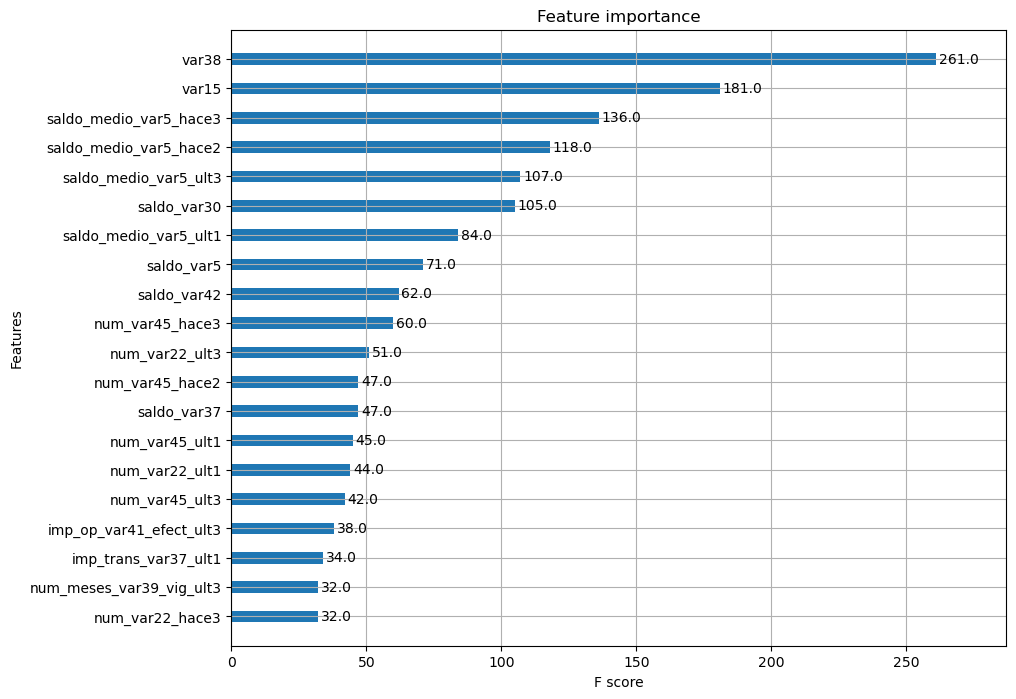

In [38]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [39]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.826191	training's binary_logloss: 0.155407	valid_1's auc: 0.805798	valid_1's binary_logloss: 0.159223
[2]	training's auc: 0.83711	training's binary_logloss: 0.149688	valid_1's auc: 0.814907	valid_1's binary_logloss: 0.154472
[3]	training's auc: 0.844912	training's binary_logloss: 0.145507	valid_1's auc: 0.820271	valid_1's binary_logloss: 0.150882
[4]	training's auc: 0.847818	training's binary_logloss: 0.142219	valid_1's auc: 0.823	valid_1's binary_logloss: 0.148274
[5]	training's auc: 0.853401	training's binary_logloss: 0.139667	valid_1's auc: 0.824798	valid_1's binary_logloss: 0.146213
[6]	training's auc: 0.857483	training's binary_logloss: 0.137324	valid_1's auc: 0.827136	valid_1's binary_logloss: 0.144393
[7]	training's auc: 0.859345	training's binary_logloss: 0.135394	valid_1's auc: 0.827811	valid_1's binary_logloss: 0.143009
[8]	training's auc: 0.860851	training's binary_logloss: 0.133788	valid_1's auc: 0.828621	valid_1's binary_logloss: 0.141852
[9]	training

[73]	training's auc: 0.925902	training's binary_logloss: 0.104757	valid_1's auc: 0.830199	valid_1's binary_logloss: 0.136716
[74]	training's auc: 0.926383	training's binary_logloss: 0.104516	valid_1's auc: 0.829885	valid_1's binary_logloss: 0.136785
[75]	training's auc: 0.926591	training's binary_logloss: 0.104367	valid_1's auc: 0.829667	valid_1's binary_logloss: 0.136851
[76]	training's auc: 0.926975	training's binary_logloss: 0.104163	valid_1's auc: 0.829537	valid_1's binary_logloss: 0.136873
[77]	training's auc: 0.927284	training's binary_logloss: 0.103976	valid_1's auc: 0.829453	valid_1's binary_logloss: 0.136901
[78]	training's auc: 0.927437	training's binary_logloss: 0.103853	valid_1's auc: 0.829318	valid_1's binary_logloss: 0.13697
[79]	training's auc: 0.928069	training's binary_logloss: 0.103562	valid_1's auc: 0.829044	valid_1's binary_logloss: 0.137036
[80]	training's auc: 0.928608	training's binary_logloss: 0.103265	valid_1's auc: 0.828632	valid_1's binary_logloss: 0.137127
[

In [40]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [41]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [42]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.831737	training's binary_logloss: 0.160729	valid_1's auc: 0.81547	valid_1's binary_logloss: 0.168437
[2]	training's auc: 0.833863	training's binary_logloss: 0.158807	valid_1's auc: 0.81748	valid_1's binary_logloss: 0.166702
[3]	training's auc: 0.834617	training's binary_logloss: 0.157085	valid_1's auc: 0.818648	valid_1's binary_logloss: 0.165126
[4]	training's auc: 0.836074	training's binary_logloss: 0.155498	valid_1's auc: 0.822413	valid_1's binary_logloss: 0.16369
[5]	training's auc: 0.839827	training's binary_logloss: 0.154068	valid_1's auc: 0.825588	valid_1's binary_logloss: 0.162386
[6]	training's auc: 0.840749	training's binary_logloss: 0.152724	valid_1's auc: 0.826503	valid_1's binary_logloss: 0.161201
[7]	training's auc: 0.84154	training's binary_logloss: 0.151487	valid_1's auc: 0.826506	valid_1's binary_logloss: 0.16009
[8]	training's auc: 0.842152	training's binary_logloss: 0.150332	valid_1's auc: 0.82656	valid_1's binary_logloss: 0.159054
[9]	training's

[67]	training's auc: 0.875389	training's binary_logloss: 0.125768	valid_1's auc: 0.837939	valid_1's binary_logloss: 0.139789
[68]	training's auc: 0.875782	training's binary_logloss: 0.125575	valid_1's auc: 0.837958	valid_1's binary_logloss: 0.139697
[69]	training's auc: 0.87625	training's binary_logloss: 0.125382	valid_1's auc: 0.837996	valid_1's binary_logloss: 0.139599
[70]	training's auc: 0.876654	training's binary_logloss: 0.1252	valid_1's auc: 0.838095	valid_1's binary_logloss: 0.139507
[71]	training's auc: 0.876955	training's binary_logloss: 0.125031	valid_1's auc: 0.838197	valid_1's binary_logloss: 0.139415
[72]	training's auc: 0.877238	training's binary_logloss: 0.124862	valid_1's auc: 0.838255	valid_1's binary_logloss: 0.139339
[73]	training's auc: 0.877621	training's binary_logloss: 0.124694	valid_1's auc: 0.83838	valid_1's binary_logloss: 0.139268
[74]	training's auc: 0.877963	training's binary_logloss: 0.124533	valid_1's auc: 0.838416	valid_1's binary_logloss: 0.139197
[75]

[33]	training's auc: 0.861933	training's binary_logloss: 0.135617	valid_1's auc: 0.82483	valid_1's binary_logloss: 0.141284
[34]	training's auc: 0.862462	training's binary_logloss: 0.135244	valid_1's auc: 0.824911	valid_1's binary_logloss: 0.141039
[35]	training's auc: 0.862705	training's binary_logloss: 0.134876	valid_1's auc: 0.824605	valid_1's binary_logloss: 0.140816
[36]	training's auc: 0.863923	training's binary_logloss: 0.134515	valid_1's auc: 0.825064	valid_1's binary_logloss: 0.140574
[37]	training's auc: 0.864411	training's binary_logloss: 0.134164	valid_1's auc: 0.825031	valid_1's binary_logloss: 0.140351
[38]	training's auc: 0.864988	training's binary_logloss: 0.133825	valid_1's auc: 0.825029	valid_1's binary_logloss: 0.14016
[39]	training's auc: 0.865426	training's binary_logloss: 0.133494	valid_1's auc: 0.825197	valid_1's binary_logloss: 0.13995
[40]	training's auc: 0.865722	training's binary_logloss: 0.133171	valid_1's auc: 0.825396	valid_1's binary_logloss: 0.139747
[41

[99]	training's auc: 0.886999	training's binary_logloss: 0.122151	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.135174
[100]	training's auc: 0.887263	training's binary_logloss: 0.122028	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.135143
[1]	training's auc: 0.828264	training's binary_logloss: 0.165297	valid_1's auc: 0.812457	valid_1's binary_logloss: 0.15933
[2]	training's auc: 0.832528	training's binary_logloss: 0.1633	valid_1's auc: 0.814281	valid_1's binary_logloss: 0.157697
[3]	training's auc: 0.833147	training's binary_logloss: 0.161506	valid_1's auc: 0.814309	valid_1's binary_logloss: 0.156212
[4]	training's auc: 0.834483	training's binary_logloss: 0.159862	valid_1's auc: 0.815482	valid_1's binary_logloss: 0.154822
[5]	training's auc: 0.834762	training's binary_logloss: 0.158345	valid_1's auc: 0.815451	valid_1's binary_logloss: 0.1536
[6]	training's auc: 0.83651	training's binary_logloss: 0.156997	valid_1's auc: 0.81521	valid_1's binary_logloss: 0.152474
[7]	training

[65]	training's auc: 0.872809	training's binary_logloss: 0.129668	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.133034
[66]	training's auc: 0.873466	training's binary_logloss: 0.129472	valid_1's auc: 0.832855	valid_1's binary_logloss: 0.13298
[67]	training's auc: 0.874072	training's binary_logloss: 0.129287	valid_1's auc: 0.832841	valid_1's binary_logloss: 0.13293
[68]	training's auc: 0.874553	training's binary_logloss: 0.129111	valid_1's auc: 0.832735	valid_1's binary_logloss: 0.132885
[69]	training's auc: 0.874864	training's binary_logloss: 0.128931	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.132806
[70]	training's auc: 0.875323	training's binary_logloss: 0.128757	valid_1's auc: 0.832897	valid_1's binary_logloss: 0.132733
[71]	training's auc: 0.875557	training's binary_logloss: 0.128594	valid_1's auc: 0.832865	valid_1's binary_logloss: 0.132675
[72]	training's auc: 0.875888	training's binary_logloss: 0.128411	valid_1's auc: 0.832838	valid_1's binary_logloss: 0.132599
[7

[31]	training's auc: 0.920644	training's binary_logloss: 0.107624	valid_1's auc: 0.830885	valid_1's binary_logloss: 0.139739
[32]	training's auc: 0.921868	training's binary_logloss: 0.107132	valid_1's auc: 0.831013	valid_1's binary_logloss: 0.139747
[33]	training's auc: 0.923116	training's binary_logloss: 0.106532	valid_1's auc: 0.831099	valid_1's binary_logloss: 0.13976
[34]	training's auc: 0.924352	training's binary_logloss: 0.105968	valid_1's auc: 0.830496	valid_1's binary_logloss: 0.139919
[35]	training's auc: 0.925131	training's binary_logloss: 0.105431	valid_1's auc: 0.830072	valid_1's binary_logloss: 0.140002
[36]	training's auc: 0.926132	training's binary_logloss: 0.104888	valid_1's auc: 0.829965	valid_1's binary_logloss: 0.140093
[37]	training's auc: 0.927134	training's binary_logloss: 0.104375	valid_1's auc: 0.829268	valid_1's binary_logloss: 0.140271
[38]	training's auc: 0.928192	training's binary_logloss: 0.103862	valid_1's auc: 0.829515	valid_1's binary_logloss: 0.140272
[

[2]	training's auc: 0.84758	training's binary_logloss: 0.14887	valid_1's auc: 0.82158	valid_1's binary_logloss: 0.146656
[3]	training's auc: 0.854923	training's binary_logloss: 0.144076	valid_1's auc: 0.826101	valid_1's binary_logloss: 0.143086
[4]	training's auc: 0.860518	training's binary_logloss: 0.14048	valid_1's auc: 0.825816	valid_1's binary_logloss: 0.140656
[5]	training's auc: 0.862521	training's binary_logloss: 0.137659	valid_1's auc: 0.828491	valid_1's binary_logloss: 0.13877
[6]	training's auc: 0.865246	training's binary_logloss: 0.135333	valid_1's auc: 0.830224	valid_1's binary_logloss: 0.137243
[7]	training's auc: 0.867949	training's binary_logloss: 0.133328	valid_1's auc: 0.830065	valid_1's binary_logloss: 0.136047
[8]	training's auc: 0.870735	training's binary_logloss: 0.131482	valid_1's auc: 0.830524	valid_1's binary_logloss: 0.135078
[9]	training's auc: 0.872956	training's binary_logloss: 0.129961	valid_1's auc: 0.829935	valid_1's binary_logloss: 0.134391
[10]	training

[12]	training's auc: 0.865486	training's binary_logloss: 0.1333	valid_1's auc: 0.835015	valid_1's binary_logloss: 0.14506
[13]	training's auc: 0.867376	training's binary_logloss: 0.13228	valid_1's auc: 0.835819	valid_1's binary_logloss: 0.144369
[14]	training's auc: 0.869461	training's binary_logloss: 0.131281	valid_1's auc: 0.836726	valid_1's binary_logloss: 0.143663
[15]	training's auc: 0.871182	training's binary_logloss: 0.130364	valid_1's auc: 0.83637	valid_1's binary_logloss: 0.143166
[16]	training's auc: 0.872542	training's binary_logloss: 0.129545	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.142597
[17]	training's auc: 0.873156	training's binary_logloss: 0.128796	valid_1's auc: 0.836604	valid_1's binary_logloss: 0.142156
[18]	training's auc: 0.874427	training's binary_logloss: 0.128046	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.141705
[19]	training's auc: 0.875575	training's binary_logloss: 0.127375	valid_1's auc: 0.837281	valid_1's binary_logloss: 0.141286
[20]	

[26]	training's auc: 0.886643	training's binary_logloss: 0.124165	valid_1's auc: 0.830802	valid_1's binary_logloss: 0.136134
[27]	training's auc: 0.887443	training's binary_logloss: 0.123638	valid_1's auc: 0.830685	valid_1's binary_logloss: 0.136005
[28]	training's auc: 0.888496	training's binary_logloss: 0.123146	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.135865
[29]	training's auc: 0.889802	training's binary_logloss: 0.122633	valid_1's auc: 0.830904	valid_1's binary_logloss: 0.135746
[30]	training's auc: 0.890933	training's binary_logloss: 0.122168	valid_1's auc: 0.831243	valid_1's binary_logloss: 0.135549
[31]	training's auc: 0.891911	training's binary_logloss: 0.12173	valid_1's auc: 0.831477	valid_1's binary_logloss: 0.135445
[32]	training's auc: 0.892718	training's binary_logloss: 0.121279	valid_1's auc: 0.831569	valid_1's binary_logloss: 0.135336
[33]	training's auc: 0.894177	training's binary_logloss: 0.120851	valid_1's auc: 0.832028	valid_1's binary_logloss: 0.135189
[

[9]	training's auc: 0.859995	training's binary_logloss: 0.140617	valid_1's auc: 0.827904	valid_1's binary_logloss: 0.140137
[10]	training's auc: 0.862395	training's binary_logloss: 0.139233	valid_1's auc: 0.829877	valid_1's binary_logloss: 0.13919
[11]	training's auc: 0.8633	training's binary_logloss: 0.137974	valid_1's auc: 0.830451	valid_1's binary_logloss: 0.13834
[12]	training's auc: 0.864484	training's binary_logloss: 0.136828	valid_1's auc: 0.830793	valid_1's binary_logloss: 0.137596
[13]	training's auc: 0.865844	training's binary_logloss: 0.13579	valid_1's auc: 0.831162	valid_1's binary_logloss: 0.136896
[14]	training's auc: 0.866985	training's binary_logloss: 0.134836	valid_1's auc: 0.831317	valid_1's binary_logloss: 0.136307
[15]	training's auc: 0.86853	training's binary_logloss: 0.133912	valid_1's auc: 0.831441	valid_1's binary_logloss: 0.135753
[16]	training's auc: 0.869666	training's binary_logloss: 0.133052	valid_1's auc: 0.832262	valid_1's binary_logloss: 0.135248
[17]	tr

[20]	training's auc: 0.900904	training's binary_logloss: 0.116923	valid_1's auc: 0.83465	valid_1's binary_logloss: 0.13918
[21]	training's auc: 0.902467	training's binary_logloss: 0.116157	valid_1's auc: 0.834619	valid_1's binary_logloss: 0.139033
[22]	training's auc: 0.903929	training's binary_logloss: 0.115428	valid_1's auc: 0.83484	valid_1's binary_logloss: 0.138873
[23]	training's auc: 0.905977	training's binary_logloss: 0.114658	valid_1's auc: 0.834566	valid_1's binary_logloss: 0.138808
[24]	training's auc: 0.907497	training's binary_logloss: 0.113985	valid_1's auc: 0.834576	valid_1's binary_logloss: 0.138693
[25]	training's auc: 0.908897	training's binary_logloss: 0.113329	valid_1's auc: 0.834576	valid_1's binary_logloss: 0.138662
[26]	training's auc: 0.909947	training's binary_logloss: 0.112688	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.138751
[27]	training's auc: 0.912	training's binary_logloss: 0.11202	valid_1's auc: 0.833897	valid_1's binary_logloss: 0.138751
[28]	tr

[41]	training's auc: 0.928396	training's binary_logloss: 0.105844	valid_1's auc: 0.828536	valid_1's binary_logloss: 0.135543
[42]	training's auc: 0.929166	training's binary_logloss: 0.105388	valid_1's auc: 0.828633	valid_1's binary_logloss: 0.135555
[43]	training's auc: 0.92983	training's binary_logloss: 0.104941	valid_1's auc: 0.828518	valid_1's binary_logloss: 0.135584
[1]	training's auc: 0.836142	training's binary_logloss: 0.157824	valid_1's auc: 0.808764	valid_1's binary_logloss: 0.153629
[2]	training's auc: 0.849798	training's binary_logloss: 0.151591	valid_1's auc: 0.820552	valid_1's binary_logloss: 0.149067
[3]	training's auc: 0.854913	training's binary_logloss: 0.14709	valid_1's auc: 0.825171	valid_1's binary_logloss: 0.145593
[4]	training's auc: 0.859568	training's binary_logloss: 0.143489	valid_1's auc: 0.827291	valid_1's binary_logloss: 0.143021
[5]	training's auc: 0.863231	training's binary_logloss: 0.140505	valid_1's auc: 0.826464	valid_1's binary_logloss: 0.141085
[6]	tra

[19]	training's auc: 0.87583	training's binary_logloss: 0.128174	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.142005
[20]	training's auc: 0.877988	training's binary_logloss: 0.127478	valid_1's auc: 0.83522	valid_1's binary_logloss: 0.14169
[21]	training's auc: 0.878986	training's binary_logloss: 0.126788	valid_1's auc: 0.835696	valid_1's binary_logloss: 0.141276
[22]	training's auc: 0.880043	training's binary_logloss: 0.126179	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.140914
[23]	training's auc: 0.881288	training's binary_logloss: 0.125525	valid_1's auc: 0.835934	valid_1's binary_logloss: 0.140667
[24]	training's auc: 0.882324	training's binary_logloss: 0.124975	valid_1's auc: 0.836104	valid_1's binary_logloss: 0.140416
[25]	training's auc: 0.883222	training's binary_logloss: 0.124455	valid_1's auc: 0.836324	valid_1's binary_logloss: 0.140186
[26]	training's auc: 0.884305	training's binary_logloss: 0.123884	valid_1's auc: 0.836427	valid_1's binary_logloss: 0.139954
[27

[17]	training's auc: 0.876346	training's binary_logloss: 0.130866	valid_1's auc: 0.828174	valid_1's binary_logloss: 0.139182
[18]	training's auc: 0.877033	training's binary_logloss: 0.130111	valid_1's auc: 0.828491	valid_1's binary_logloss: 0.138769
[19]	training's auc: 0.878361	training's binary_logloss: 0.129363	valid_1's auc: 0.828527	valid_1's binary_logloss: 0.138472
[20]	training's auc: 0.879623	training's binary_logloss: 0.128633	valid_1's auc: 0.828447	valid_1's binary_logloss: 0.13817
[21]	training's auc: 0.881003	training's binary_logloss: 0.127978	valid_1's auc: 0.828898	valid_1's binary_logloss: 0.137867
[22]	training's auc: 0.882402	training's binary_logloss: 0.127335	valid_1's auc: 0.829703	valid_1's binary_logloss: 0.137545
[23]	training's auc: 0.883596	training's binary_logloss: 0.126754	valid_1's auc: 0.829199	valid_1's binary_logloss: 0.137328
[24]	training's auc: 0.884571	training's binary_logloss: 0.126154	valid_1's auc: 0.829255	valid_1's binary_logloss: 0.137109
[

[1]	training's auc: 0.833722	training's binary_logloss: 0.162035	valid_1's auc: 0.805388	valid_1's binary_logloss: 0.156763
[2]	training's auc: 0.844521	training's binary_logloss: 0.157743	valid_1's auc: 0.819495	valid_1's binary_logloss: 0.153418
[3]	training's auc: 0.849451	training's binary_logloss: 0.154336	valid_1's auc: 0.824461	valid_1's binary_logloss: 0.150653
[4]	training's auc: 0.851469	training's binary_logloss: 0.151458	valid_1's auc: 0.824815	valid_1's binary_logloss: 0.148367
[5]	training's auc: 0.852944	training's binary_logloss: 0.148967	valid_1's auc: 0.825214	valid_1's binary_logloss: 0.146482
[6]	training's auc: 0.856227	training's binary_logloss: 0.146805	valid_1's auc: 0.826823	valid_1's binary_logloss: 0.144784
[7]	training's auc: 0.859376	training's binary_logloss: 0.144862	valid_1's auc: 0.828128	valid_1's binary_logloss: 0.143314
[8]	training's auc: 0.860756	training's binary_logloss: 0.14317	valid_1's auc: 0.828951	valid_1's binary_logloss: 0.142045
[9]	train

[67]	training's auc: 0.917635	training's binary_logloss: 0.112739	valid_1's auc: 0.833593	valid_1's binary_logloss: 0.130936
[68]	training's auc: 0.918182	training's binary_logloss: 0.112483	valid_1's auc: 0.83367	valid_1's binary_logloss: 0.130933
[69]	training's auc: 0.918761	training's binary_logloss: 0.112204	valid_1's auc: 0.833436	valid_1's binary_logloss: 0.130996
[70]	training's auc: 0.919516	training's binary_logloss: 0.111956	valid_1's auc: 0.833383	valid_1's binary_logloss: 0.131005
[71]	training's auc: 0.920081	training's binary_logloss: 0.111674	valid_1's auc: 0.833055	valid_1's binary_logloss: 0.131076
[72]	training's auc: 0.920583	training's binary_logloss: 0.111443	valid_1's auc: 0.832884	valid_1's binary_logloss: 0.131129
[73]	training's auc: 0.921339	training's binary_logloss: 0.111198	valid_1's auc: 0.833279	valid_1's binary_logloss: 0.131068
[74]	training's auc: 0.921753	training's binary_logloss: 0.110961	valid_1's auc: 0.833312	valid_1's binary_logloss: 0.131079
[

[58]	training's auc: 0.86336	training's binary_logloss: 0.133796	valid_1's auc: 0.835178	valid_1's binary_logloss: 0.145034
[59]	training's auc: 0.863501	training's binary_logloss: 0.133582	valid_1's auc: 0.835159	valid_1's binary_logloss: 0.144876
[60]	training's auc: 0.863801	training's binary_logloss: 0.13337	valid_1's auc: 0.835345	valid_1's binary_logloss: 0.144701
[61]	training's auc: 0.86389	training's binary_logloss: 0.133163	valid_1's auc: 0.835292	valid_1's binary_logloss: 0.144558
[62]	training's auc: 0.864041	training's binary_logloss: 0.132961	valid_1's auc: 0.83514	valid_1's binary_logloss: 0.144414
[63]	training's auc: 0.864475	training's binary_logloss: 0.132752	valid_1's auc: 0.835145	valid_1's binary_logloss: 0.144264
[64]	training's auc: 0.864813	training's binary_logloss: 0.132542	valid_1's auc: 0.835208	valid_1's binary_logloss: 0.144118
[65]	training's auc: 0.865317	training's binary_logloss: 0.132342	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.143991
[66]

[24]	training's auc: 0.853711	training's binary_logloss: 0.146535	valid_1's auc: 0.817382	valid_1's binary_logloss: 0.149304
[25]	training's auc: 0.853844	training's binary_logloss: 0.146051	valid_1's auc: 0.817691	valid_1's binary_logloss: 0.148923
[26]	training's auc: 0.854233	training's binary_logloss: 0.145568	valid_1's auc: 0.817873	valid_1's binary_logloss: 0.148565
[27]	training's auc: 0.854354	training's binary_logloss: 0.14511	valid_1's auc: 0.81812	valid_1's binary_logloss: 0.148221
[28]	training's auc: 0.85464	training's binary_logloss: 0.14467	valid_1's auc: 0.818582	valid_1's binary_logloss: 0.147881
[29]	training's auc: 0.855038	training's binary_logloss: 0.144227	valid_1's auc: 0.818856	valid_1's binary_logloss: 0.147548
[30]	training's auc: 0.855307	training's binary_logloss: 0.143802	valid_1's auc: 0.81923	valid_1's binary_logloss: 0.147214
[31]	training's auc: 0.855371	training's binary_logloss: 0.143396	valid_1's auc: 0.819466	valid_1's binary_logloss: 0.146919
[32]	

[90]	training's auc: 0.873942	training's binary_logloss: 0.129386	valid_1's auc: 0.828187	valid_1's binary_logloss: 0.137849
[91]	training's auc: 0.874086	training's binary_logloss: 0.129253	valid_1's auc: 0.828227	valid_1's binary_logloss: 0.137782
[92]	training's auc: 0.874301	training's binary_logloss: 0.12911	valid_1's auc: 0.8283	valid_1's binary_logloss: 0.137711
[93]	training's auc: 0.874774	training's binary_logloss: 0.128966	valid_1's auc: 0.828438	valid_1's binary_logloss: 0.137643
[94]	training's auc: 0.874946	training's binary_logloss: 0.12883	valid_1's auc: 0.828512	valid_1's binary_logloss: 0.13757
[95]	training's auc: 0.875158	training's binary_logloss: 0.128692	valid_1's auc: 0.828717	valid_1's binary_logloss: 0.137504
[96]	training's auc: 0.875371	training's binary_logloss: 0.128561	valid_1's auc: 0.828818	valid_1's binary_logloss: 0.137436
[97]	training's auc: 0.875575	training's binary_logloss: 0.128431	valid_1's auc: 0.828782	valid_1's binary_logloss: 0.137381
[98]	

[56]	training's auc: 0.860723	training's binary_logloss: 0.137894	valid_1's auc: 0.830764	valid_1's binary_logloss: 0.13788
[57]	training's auc: 0.860896	training's binary_logloss: 0.137665	valid_1's auc: 0.830932	valid_1's binary_logloss: 0.137721
[58]	training's auc: 0.860965	training's binary_logloss: 0.137446	valid_1's auc: 0.830821	valid_1's binary_logloss: 0.137575
[59]	training's auc: 0.861248	training's binary_logloss: 0.137225	valid_1's auc: 0.830711	valid_1's binary_logloss: 0.137432
[60]	training's auc: 0.861344	training's binary_logloss: 0.137012	valid_1's auc: 0.830471	valid_1's binary_logloss: 0.137305
[61]	training's auc: 0.861819	training's binary_logloss: 0.136788	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.137156
[62]	training's auc: 0.862176	training's binary_logloss: 0.136566	valid_1's auc: 0.831108	valid_1's binary_logloss: 0.137017
[63]	training's auc: 0.862445	training's binary_logloss: 0.136354	valid_1's auc: 0.831188	valid_1's binary_logloss: 0.136889
[

[22]	training's auc: 0.898091	training's binary_logloss: 0.116024	valid_1's auc: 0.833067	valid_1's binary_logloss: 0.139231
[23]	training's auc: 0.899738	training's binary_logloss: 0.115452	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.139169
[24]	training's auc: 0.901431	training's binary_logloss: 0.114716	valid_1's auc: 0.833376	valid_1's binary_logloss: 0.139099
[25]	training's auc: 0.902992	training's binary_logloss: 0.114172	valid_1's auc: 0.832875	valid_1's binary_logloss: 0.139176
[26]	training's auc: 0.905073	training's binary_logloss: 0.113663	valid_1's auc: 0.833803	valid_1's binary_logloss: 0.13906
[27]	training's auc: 0.906176	training's binary_logloss: 0.113117	valid_1's auc: 0.833595	valid_1's binary_logloss: 0.139077
[28]	training's auc: 0.90744	training's binary_logloss: 0.112662	valid_1's auc: 0.834167	valid_1's binary_logloss: 0.139001
[29]	training's auc: 0.908621	training's binary_logloss: 0.11213	valid_1's auc: 0.833323	valid_1's binary_logloss: 0.139176
[30

[30]	training's auc: 0.90881	training's binary_logloss: 0.113491	valid_1's auc: 0.83074	valid_1's binary_logloss: 0.134999
[31]	training's auc: 0.909986	training's binary_logloss: 0.112925	valid_1's auc: 0.830565	valid_1's binary_logloss: 0.135062
[32]	training's auc: 0.911093	training's binary_logloss: 0.112531	valid_1's auc: 0.830918	valid_1's binary_logloss: 0.135042
[33]	training's auc: 0.911999	training's binary_logloss: 0.112069	valid_1's auc: 0.830587	valid_1's binary_logloss: 0.135137
[34]	training's auc: 0.913059	training's binary_logloss: 0.111609	valid_1's auc: 0.83019	valid_1's binary_logloss: 0.135199
[35]	training's auc: 0.913919	training's binary_logloss: 0.111186	valid_1's auc: 0.829821	valid_1's binary_logloss: 0.135306
[36]	training's auc: 0.915409	training's binary_logloss: 0.11062	valid_1's auc: 0.829905	valid_1's binary_logloss: 0.135259
[37]	training's auc: 0.917138	training's binary_logloss: 0.110122	valid_1's auc: 0.830032	valid_1's binary_logloss: 0.135251
[38]

[38]	training's auc: 0.916769	training's binary_logloss: 0.111943	valid_1's auc: 0.832764	valid_1's binary_logloss: 0.131648
[39]	training's auc: 0.917671	training's binary_logloss: 0.111556	valid_1's auc: 0.833092	valid_1's binary_logloss: 0.131601
[40]	training's auc: 0.918347	training's binary_logloss: 0.111117	valid_1's auc: 0.831981	valid_1's binary_logloss: 0.131834
[41]	training's auc: 0.919368	training's binary_logloss: 0.110667	valid_1's auc: 0.83197	valid_1's binary_logloss: 0.131846
[42]	training's auc: 0.920272	training's binary_logloss: 0.110219	valid_1's auc: 0.831648	valid_1's binary_logloss: 0.131856
[43]	training's auc: 0.921567	training's binary_logloss: 0.109652	valid_1's auc: 0.831511	valid_1's binary_logloss: 0.131906
[44]	training's auc: 0.922114	training's binary_logloss: 0.109338	valid_1's auc: 0.831343	valid_1's binary_logloss: 0.131948
[45]	training's auc: 0.92268	training's binary_logloss: 0.109009	valid_1's auc: 0.831055	valid_1's binary_logloss: 0.132005
[4

[7]	training's auc: 0.880609	training's binary_logloss: 0.127302	valid_1's auc: 0.826381	valid_1's binary_logloss: 0.138476
[8]	training's auc: 0.884424	training's binary_logloss: 0.12547	valid_1's auc: 0.827372	valid_1's binary_logloss: 0.137752
[9]	training's auc: 0.887606	training's binary_logloss: 0.123782	valid_1's auc: 0.828117	valid_1's binary_logloss: 0.137082
[10]	training's auc: 0.890368	training's binary_logloss: 0.122299	valid_1's auc: 0.829154	valid_1's binary_logloss: 0.136524
[11]	training's auc: 0.89271	training's binary_logloss: 0.120889	valid_1's auc: 0.829128	valid_1's binary_logloss: 0.13626
[12]	training's auc: 0.894795	training's binary_logloss: 0.119687	valid_1's auc: 0.829078	valid_1's binary_logloss: 0.136064
[13]	training's auc: 0.897793	training's binary_logloss: 0.118461	valid_1's auc: 0.828518	valid_1's binary_logloss: 0.135907
[14]	training's auc: 0.900935	training's binary_logloss: 0.117193	valid_1's auc: 0.828449	valid_1's binary_logloss: 0.135744
[15]	t

[21]	training's auc: 0.915422	training's binary_logloss: 0.112736	valid_1's auc: 0.830037	valid_1's binary_logloss: 0.13228
[22]	training's auc: 0.917394	training's binary_logloss: 0.111959	valid_1's auc: 0.82928	valid_1's binary_logloss: 0.132438
[23]	training's auc: 0.91871	training's binary_logloss: 0.11122	valid_1's auc: 0.829104	valid_1's binary_logloss: 0.132533
[24]	training's auc: 0.920609	training's binary_logloss: 0.110388	valid_1's auc: 0.828799	valid_1's binary_logloss: 0.132581
[25]	training's auc: 0.922613	training's binary_logloss: 0.109623	valid_1's auc: 0.828323	valid_1's binary_logloss: 0.132694
[26]	training's auc: 0.923821	training's binary_logloss: 0.108901	valid_1's auc: 0.827372	valid_1's binary_logloss: 0.13284
[27]	training's auc: 0.925669	training's binary_logloss: 0.108169	valid_1's auc: 0.826142	valid_1's binary_logloss: 0.13309
[28]	training's auc: 0.927329	training's binary_logloss: 0.10738	valid_1's auc: 0.826808	valid_1's binary_logloss: 0.133092
[29]	tr

[1]	training's auc: 0.837209	training's binary_logloss: 0.153404	valid_1's auc: 0.804603	valid_1's binary_logloss: 0.154111
[2]	training's auc: 0.842346	training's binary_logloss: 0.146721	valid_1's auc: 0.812883	valid_1's binary_logloss: 0.149084
[3]	training's auc: 0.846574	training's binary_logloss: 0.14226	valid_1's auc: 0.815866	valid_1's binary_logloss: 0.145773
[4]	training's auc: 0.851543	training's binary_logloss: 0.138837	valid_1's auc: 0.820832	valid_1's binary_logloss: 0.143276
[5]	training's auc: 0.858319	training's binary_logloss: 0.136211	valid_1's auc: 0.823547	valid_1's binary_logloss: 0.141507
[6]	training's auc: 0.859702	training's binary_logloss: 0.134126	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.140172
[7]	training's auc: 0.864561	training's binary_logloss: 0.132291	valid_1's auc: 0.825725	valid_1's binary_logloss: 0.139007
[8]	training's auc: 0.867308	training's binary_logloss: 0.130721	valid_1's auc: 0.827066	valid_1's binary_logloss: 0.138213
[9]	train

[11]	training's auc: 0.872134	training's binary_logloss: 0.129553	valid_1's auc: 0.831954	valid_1's binary_logloss: 0.132921
[12]	training's auc: 0.873858	training's binary_logloss: 0.128551	valid_1's auc: 0.831382	valid_1's binary_logloss: 0.132646
[13]	training's auc: 0.875641	training's binary_logloss: 0.127676	valid_1's auc: 0.831779	valid_1's binary_logloss: 0.132298
[14]	training's auc: 0.877778	training's binary_logloss: 0.126879	valid_1's auc: 0.832145	valid_1's binary_logloss: 0.132101
[15]	training's auc: 0.879388	training's binary_logloss: 0.126137	valid_1's auc: 0.831916	valid_1's binary_logloss: 0.131965
[16]	training's auc: 0.881841	training's binary_logloss: 0.125356	valid_1's auc: 0.832162	valid_1's binary_logloss: 0.131856
[17]	training's auc: 0.883704	training's binary_logloss: 0.124596	valid_1's auc: 0.832243	valid_1's binary_logloss: 0.131742
[18]	training's auc: 0.886037	training's binary_logloss: 0.123918	valid_1's auc: 0.833104	valid_1's binary_logloss: 0.131561


[24]	training's auc: 0.886344	training's binary_logloss: 0.122753	valid_1's auc: 0.835983	valid_1's binary_logloss: 0.139574
[25]	training's auc: 0.887594	training's binary_logloss: 0.122158	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.139391
[26]	training's auc: 0.888917	training's binary_logloss: 0.121575	valid_1's auc: 0.836236	valid_1's binary_logloss: 0.139266
[27]	training's auc: 0.89026	training's binary_logloss: 0.121027	valid_1's auc: 0.836235	valid_1's binary_logloss: 0.139147
[28]	training's auc: 0.891752	training's binary_logloss: 0.120505	valid_1's auc: 0.836588	valid_1's binary_logloss: 0.138981
[29]	training's auc: 0.893055	training's binary_logloss: 0.119981	valid_1's auc: 0.836609	valid_1's binary_logloss: 0.138793
[30]	training's auc: 0.89427	training's binary_logloss: 0.119507	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.138779
[31]	training's auc: 0.895074	training's binary_logloss: 0.119087	valid_1's auc: 0.835966	valid_1's binary_logloss: 0.138706
[3

[31]	training's auc: 0.895567	training's binary_logloss: 0.12021	valid_1's auc: 0.831195	valid_1's binary_logloss: 0.135256
[32]	training's auc: 0.896674	training's binary_logloss: 0.119738	valid_1's auc: 0.830982	valid_1's binary_logloss: 0.135222
[33]	training's auc: 0.897496	training's binary_logloss: 0.119286	valid_1's auc: 0.831282	valid_1's binary_logloss: 0.135121
[34]	training's auc: 0.89827	training's binary_logloss: 0.118869	valid_1's auc: 0.831375	valid_1's binary_logloss: 0.135049
[35]	training's auc: 0.899068	training's binary_logloss: 0.118433	valid_1's auc: 0.83107	valid_1's binary_logloss: 0.135027
[36]	training's auc: 0.899833	training's binary_logloss: 0.118042	valid_1's auc: 0.831294	valid_1's binary_logloss: 0.134949
[37]	training's auc: 0.900665	training's binary_logloss: 0.117653	valid_1's auc: 0.831552	valid_1's binary_logloss: 0.134879
[38]	training's auc: 0.90161	training's binary_logloss: 0.117247	valid_1's auc: 0.8314	valid_1's binary_logloss: 0.134885
[39]	t

[25]	training's auc: 0.885978	training's binary_logloss: 0.125711	valid_1's auc: 0.832468	valid_1's binary_logloss: 0.132523
[26]	training's auc: 0.887774	training's binary_logloss: 0.125109	valid_1's auc: 0.832213	valid_1's binary_logloss: 0.13238
[27]	training's auc: 0.889239	training's binary_logloss: 0.124555	valid_1's auc: 0.831891	valid_1's binary_logloss: 0.132274
[28]	training's auc: 0.890454	training's binary_logloss: 0.12402	valid_1's auc: 0.832189	valid_1's binary_logloss: 0.132142
[29]	training's auc: 0.891656	training's binary_logloss: 0.123515	valid_1's auc: 0.832648	valid_1's binary_logloss: 0.132004
[30]	training's auc: 0.89259	training's binary_logloss: 0.123006	valid_1's auc: 0.832959	valid_1's binary_logloss: 0.131866
[31]	training's auc: 0.8936	training's binary_logloss: 0.12251	valid_1's auc: 0.833096	valid_1's binary_logloss: 0.131802
[32]	training's auc: 0.894581	training's binary_logloss: 0.122028	valid_1's auc: 0.832838	valid_1's binary_logloss: 0.131763
[33]	t

[18]	training's auc: 0.920559	training's binary_logloss: 0.107032	valid_1's auc: 0.83141	valid_1's binary_logloss: 0.139737
[19]	training's auc: 0.922968	training's binary_logloss: 0.106077	valid_1's auc: 0.831269	valid_1's binary_logloss: 0.139877
[20]	training's auc: 0.924851	training's binary_logloss: 0.105119	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.140058
[21]	training's auc: 0.926594	training's binary_logloss: 0.104186	valid_1's auc: 0.829709	valid_1's binary_logloss: 0.140303
[22]	training's auc: 0.928226	training's binary_logloss: 0.103406	valid_1's auc: 0.828745	valid_1's binary_logloss: 0.140545
[23]	training's auc: 0.93006	training's binary_logloss: 0.102524	valid_1's auc: 0.826842	valid_1's binary_logloss: 0.141045
[24]	training's auc: 0.931372	training's binary_logloss: 0.101761	valid_1's auc: 0.826376	valid_1's binary_logloss: 0.141216
[25]	training's auc: 0.933146	training's binary_logloss: 0.10081	valid_1's auc: 0.826448	valid_1's binary_logloss: 0.141318
[26

[41]	training's auc: 0.951108	training's binary_logloss: 0.0910976	valid_1's auc: 0.82246	valid_1's binary_logloss: 0.139345
[42]	training's auc: 0.951492	training's binary_logloss: 0.0906741	valid_1's auc: 0.822149	valid_1's binary_logloss: 0.139498
[43]	training's auc: 0.952405	training's binary_logloss: 0.090189	valid_1's auc: 0.82177	valid_1's binary_logloss: 0.139682
[44]	training's auc: 0.952781	training's binary_logloss: 0.0897716	valid_1's auc: 0.821537	valid_1's binary_logloss: 0.139846
[45]	training's auc: 0.953049	training's binary_logloss: 0.0893646	valid_1's auc: 0.82106	valid_1's binary_logloss: 0.140137
[46]	training's auc: 0.953886	training's binary_logloss: 0.0888652	valid_1's auc: 0.820873	valid_1's binary_logloss: 0.140236
[1]	training's auc: 0.83541	training's binary_logloss: 0.149735	valid_1's auc: 0.810814	valid_1's binary_logloss: 0.147529
[2]	training's auc: 0.853176	training's binary_logloss: 0.142295	valid_1's auc: 0.821187	valid_1's binary_logloss: 0.142259
[

[24]	training's auc: 0.888757	training's binary_logloss: 0.123266	valid_1's auc: 0.835401	valid_1's binary_logloss: 0.140308
[25]	training's auc: 0.889452	training's binary_logloss: 0.122682	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.140058
[26]	training's auc: 0.891166	training's binary_logloss: 0.122051	valid_1's auc: 0.8356	valid_1's binary_logloss: 0.139851
[27]	training's auc: 0.892344	training's binary_logloss: 0.121503	valid_1's auc: 0.835863	valid_1's binary_logloss: 0.139644
[28]	training's auc: 0.893419	training's binary_logloss: 0.120961	valid_1's auc: 0.835986	valid_1's binary_logloss: 0.139441
[29]	training's auc: 0.894262	training's binary_logloss: 0.120402	valid_1's auc: 0.83576	valid_1's binary_logloss: 0.139297
[30]	training's auc: 0.895384	training's binary_logloss: 0.119863	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.139155
[31]	training's auc: 0.896248	training's binary_logloss: 0.119363	valid_1's auc: 0.835569	valid_1's binary_logloss: 0.13906
[32]

[25]	training's auc: 0.892361	training's binary_logloss: 0.123771	valid_1's auc: 0.830846	valid_1's binary_logloss: 0.136539
[26]	training's auc: 0.893498	training's binary_logloss: 0.123174	valid_1's auc: 0.830394	valid_1's binary_logloss: 0.136441
[27]	training's auc: 0.89446	training's binary_logloss: 0.122618	valid_1's auc: 0.830572	valid_1's binary_logloss: 0.136266
[28]	training's auc: 0.895383	training's binary_logloss: 0.122047	valid_1's auc: 0.830051	valid_1's binary_logloss: 0.136162
[29]	training's auc: 0.896417	training's binary_logloss: 0.121534	valid_1's auc: 0.829994	valid_1's binary_logloss: 0.136044
[30]	training's auc: 0.89751	training's binary_logloss: 0.120955	valid_1's auc: 0.830038	valid_1's binary_logloss: 0.135927
[31]	training's auc: 0.898737	training's binary_logloss: 0.12046	valid_1's auc: 0.830453	valid_1's binary_logloss: 0.135791
[32]	training's auc: 0.899447	training's binary_logloss: 0.119941	valid_1's auc: 0.830299	valid_1's binary_logloss: 0.135743
[33

[16]	training's auc: 0.876964	training's binary_logloss: 0.132528	valid_1's auc: 0.831755	valid_1's binary_logloss: 0.135825
[17]	training's auc: 0.877916	training's binary_logloss: 0.131688	valid_1's auc: 0.831623	valid_1's binary_logloss: 0.135426
[18]	training's auc: 0.879932	training's binary_logloss: 0.130865	valid_1's auc: 0.832001	valid_1's binary_logloss: 0.135005
[19]	training's auc: 0.880945	training's binary_logloss: 0.130104	valid_1's auc: 0.832396	valid_1's binary_logloss: 0.134602
[20]	training's auc: 0.882065	training's binary_logloss: 0.129434	valid_1's auc: 0.831873	valid_1's binary_logloss: 0.134334
[21]	training's auc: 0.883344	training's binary_logloss: 0.128747	valid_1's auc: 0.831664	valid_1's binary_logloss: 0.134045
[22]	training's auc: 0.884859	training's binary_logloss: 0.128059	valid_1's auc: 0.831933	valid_1's binary_logloss: 0.133735
[23]	training's auc: 0.886237	training's binary_logloss: 0.127386	valid_1's auc: 0.832006	valid_1's binary_logloss: 0.133496


[22]	training's auc: 0.913427	training's binary_logloss: 0.110444	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.138702
[23]	training's auc: 0.914625	training's binary_logloss: 0.109775	valid_1's auc: 0.834426	valid_1's binary_logloss: 0.138781
[24]	training's auc: 0.915794	training's binary_logloss: 0.10913	valid_1's auc: 0.834679	valid_1's binary_logloss: 0.138735
[25]	training's auc: 0.91694	training's binary_logloss: 0.108598	valid_1's auc: 0.835195	valid_1's binary_logloss: 0.138608
[26]	training's auc: 0.918233	training's binary_logloss: 0.107899	valid_1's auc: 0.834414	valid_1's binary_logloss: 0.13877
[27]	training's auc: 0.919441	training's binary_logloss: 0.107382	valid_1's auc: 0.834423	valid_1's binary_logloss: 0.138825
[28]	training's auc: 0.920556	training's binary_logloss: 0.106795	valid_1's auc: 0.833463	valid_1's binary_logloss: 0.139082
[29]	training's auc: 0.921419	training's binary_logloss: 0.106236	valid_1's auc: 0.833369	valid_1's binary_logloss: 0.139184
[30

[46]	training's auc: 0.934625	training's binary_logloss: 0.0995273	valid_1's auc: 0.824182	valid_1's binary_logloss: 0.138505
[47]	training's auc: 0.935092	training's binary_logloss: 0.0991491	valid_1's auc: 0.823873	valid_1's binary_logloss: 0.138621
[48]	training's auc: 0.935516	training's binary_logloss: 0.0988461	valid_1's auc: 0.823926	valid_1's binary_logloss: 0.138587
[49]	training's auc: 0.936422	training's binary_logloss: 0.0983928	valid_1's auc: 0.823218	valid_1's binary_logloss: 0.138762
[1]	training's auc: 0.829311	training's binary_logloss: 0.151075	valid_1's auc: 0.811583	valid_1's binary_logloss: 0.147922
[2]	training's auc: 0.845351	training's binary_logloss: 0.144029	valid_1's auc: 0.821448	valid_1's binary_logloss: 0.142784
[3]	training's auc: 0.852627	training's binary_logloss: 0.139414	valid_1's auc: 0.824735	valid_1's binary_logloss: 0.139425
[4]	training's auc: 0.856976	training's binary_logloss: 0.136135	valid_1's auc: 0.827339	valid_1's binary_logloss: 0.137188


[24]	training's auc: 0.878231	training's binary_logloss: 0.127435	valid_1's auc: 0.834063	valid_1's binary_logloss: 0.142202
[25]	training's auc: 0.878826	training's binary_logloss: 0.126876	valid_1's auc: 0.833882	valid_1's binary_logloss: 0.14195
[26]	training's auc: 0.879837	training's binary_logloss: 0.126342	valid_1's auc: 0.834198	valid_1's binary_logloss: 0.141663
[27]	training's auc: 0.880774	training's binary_logloss: 0.125838	valid_1's auc: 0.834445	valid_1's binary_logloss: 0.141399
[28]	training's auc: 0.881699	training's binary_logloss: 0.125342	valid_1's auc: 0.834271	valid_1's binary_logloss: 0.141192
[29]	training's auc: 0.88317	training's binary_logloss: 0.124845	valid_1's auc: 0.834257	valid_1's binary_logloss: 0.14095
[30]	training's auc: 0.884193	training's binary_logloss: 0.12434	valid_1's auc: 0.834673	valid_1's binary_logloss: 0.140736
[31]	training's auc: 0.885031	training's binary_logloss: 0.123887	valid_1's auc: 0.835005	valid_1's binary_logloss: 0.140523
[32]

[90]	training's auc: 0.922743	training's binary_logloss: 0.107578	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.138258
[91]	training's auc: 0.923034	training's binary_logloss: 0.107411	valid_1's auc: 0.836108	valid_1's binary_logloss: 0.138281
[92]	training's auc: 0.923383	training's binary_logloss: 0.107221	valid_1's auc: 0.83599	valid_1's binary_logloss: 0.1383
[93]	training's auc: 0.923814	training's binary_logloss: 0.107011	valid_1's auc: 0.835876	valid_1's binary_logloss: 0.138336
[94]	training's auc: 0.924252	training's binary_logloss: 0.106791	valid_1's auc: 0.83581	valid_1's binary_logloss: 0.138368
[95]	training's auc: 0.924888	training's binary_logloss: 0.106615	valid_1's auc: 0.836021	valid_1's binary_logloss: 0.13835
[96]	training's auc: 0.925183	training's binary_logloss: 0.10645	valid_1's auc: 0.835751	valid_1's binary_logloss: 0.138415
[97]	training's auc: 0.925674	training's binary_logloss: 0.106222	valid_1's auc: 0.835364	valid_1's binary_logloss: 0.138493
[98]	t

[56]	training's auc: 0.904072	training's binary_logloss: 0.116315	valid_1's auc: 0.83205	valid_1's binary_logloss: 0.134875
[57]	training's auc: 0.904585	training's binary_logloss: 0.116078	valid_1's auc: 0.832055	valid_1's binary_logloss: 0.134845
[58]	training's auc: 0.905087	training's binary_logloss: 0.115822	valid_1's auc: 0.832073	valid_1's binary_logloss: 0.134803
[59]	training's auc: 0.90562	training's binary_logloss: 0.115563	valid_1's auc: 0.832276	valid_1's binary_logloss: 0.134762
[60]	training's auc: 0.906094	training's binary_logloss: 0.115323	valid_1's auc: 0.832089	valid_1's binary_logloss: 0.134751
[61]	training's auc: 0.90657	training's binary_logloss: 0.115077	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.134746
[62]	training's auc: 0.907427	training's binary_logloss: 0.114817	valid_1's auc: 0.832122	valid_1's binary_logloss: 0.134734
[63]	training's auc: 0.90799	training's binary_logloss: 0.11457	valid_1's auc: 0.831978	valid_1's binary_logloss: 0.134733
[64]	

[22]	training's auc: 0.872091	training's binary_logloss: 0.13219	valid_1's auc: 0.832182	valid_1's binary_logloss: 0.135399
[23]	training's auc: 0.873111	training's binary_logloss: 0.131599	valid_1's auc: 0.832639	valid_1's binary_logloss: 0.135045
[24]	training's auc: 0.875569	training's binary_logloss: 0.131051	valid_1's auc: 0.832764	valid_1's binary_logloss: 0.134788
[25]	training's auc: 0.876337	training's binary_logloss: 0.130481	valid_1's auc: 0.832786	valid_1's binary_logloss: 0.134504
[26]	training's auc: 0.877591	training's binary_logloss: 0.129885	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.134246
[27]	training's auc: 0.878565	training's binary_logloss: 0.129368	valid_1's auc: 0.832666	valid_1's binary_logloss: 0.134055
[28]	training's auc: 0.879607	training's binary_logloss: 0.128842	valid_1's auc: 0.83277	valid_1's binary_logloss: 0.133847
[29]	training's auc: 0.880738	training's binary_logloss: 0.128362	valid_1's auc: 0.832905	valid_1's binary_logloss: 0.133655
[3

[88]	training's auc: 0.921709	training's binary_logloss: 0.111346	valid_1's auc: 0.83383	valid_1's binary_logloss: 0.131158
[89]	training's auc: 0.922099	training's binary_logloss: 0.111134	valid_1's auc: 0.83381	valid_1's binary_logloss: 0.131184
[90]	training's auc: 0.922629	training's binary_logloss: 0.110931	valid_1's auc: 0.833856	valid_1's binary_logloss: 0.131186
[1]	training's auc: 0.830961	training's binary_logloss: 0.152558	valid_1's auc: 0.818532	valid_1's binary_logloss: 0.161171
[2]	training's auc: 0.839672	training's binary_logloss: 0.146689	valid_1's auc: 0.825896	valid_1's binary_logloss: 0.155912
[3]	training's auc: 0.844083	training's binary_logloss: 0.142638	valid_1's auc: 0.826044	valid_1's binary_logloss: 0.152234
[4]	training's auc: 0.849396	training's binary_logloss: 0.139442	valid_1's auc: 0.829919	valid_1's binary_logloss: 0.149412
[5]	training's auc: 0.85258	training's binary_logloss: 0.136832	valid_1's auc: 0.831734	valid_1's binary_logloss: 0.147213
[6]	trai

[11]	training's auc: 0.870464	training's binary_logloss: 0.128696	valid_1's auc: 0.827397	valid_1's binary_logloss: 0.137477
[12]	training's auc: 0.872224	training's binary_logloss: 0.12764	valid_1's auc: 0.826957	valid_1's binary_logloss: 0.137147
[13]	training's auc: 0.87324	training's binary_logloss: 0.126781	valid_1's auc: 0.827128	valid_1's binary_logloss: 0.136829
[14]	training's auc: 0.875309	training's binary_logloss: 0.125943	valid_1's auc: 0.827729	valid_1's binary_logloss: 0.136508
[15]	training's auc: 0.877571	training's binary_logloss: 0.12512	valid_1's auc: 0.827214	valid_1's binary_logloss: 0.136315
[16]	training's auc: 0.880232	training's binary_logloss: 0.124369	valid_1's auc: 0.828248	valid_1's binary_logloss: 0.136052
[17]	training's auc: 0.881451	training's binary_logloss: 0.12375	valid_1's auc: 0.829792	valid_1's binary_logloss: 0.135768
[18]	training's auc: 0.883642	training's binary_logloss: 0.123088	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.13561
[19]	t

[17]	training's auc: 0.879269	training's binary_logloss: 0.126214	valid_1's auc: 0.832048	valid_1's binary_logloss: 0.132039
[18]	training's auc: 0.881449	training's binary_logloss: 0.125505	valid_1's auc: 0.833433	valid_1's binary_logloss: 0.131782
[19]	training's auc: 0.883119	training's binary_logloss: 0.12487	valid_1's auc: 0.832959	valid_1's binary_logloss: 0.131717
[20]	training's auc: 0.884872	training's binary_logloss: 0.124242	valid_1's auc: 0.833309	valid_1's binary_logloss: 0.131565
[21]	training's auc: 0.886625	training's binary_logloss: 0.123694	valid_1's auc: 0.833358	valid_1's binary_logloss: 0.13151
[22]	training's auc: 0.887933	training's binary_logloss: 0.12309	valid_1's auc: 0.833684	valid_1's binary_logloss: 0.131387
[23]	training's auc: 0.888982	training's binary_logloss: 0.122514	valid_1's auc: 0.833755	valid_1's binary_logloss: 0.131273
[24]	training's auc: 0.890735	training's binary_logloss: 0.121942	valid_1's auc: 0.833779	valid_1's binary_logloss: 0.131256
[25

[22]	training's auc: 0.885972	training's binary_logloss: 0.125321	valid_1's auc: 0.833169	valid_1's binary_logloss: 0.141565
[23]	training's auc: 0.887245	training's binary_logloss: 0.124676	valid_1's auc: 0.833887	valid_1's binary_logloss: 0.141204
[24]	training's auc: 0.888061	training's binary_logloss: 0.124073	valid_1's auc: 0.834173	valid_1's binary_logloss: 0.140927
[25]	training's auc: 0.889002	training's binary_logloss: 0.123465	valid_1's auc: 0.834669	valid_1's binary_logloss: 0.140644
[26]	training's auc: 0.890456	training's binary_logloss: 0.122873	valid_1's auc: 0.835627	valid_1's binary_logloss: 0.14034
[27]	training's auc: 0.891657	training's binary_logloss: 0.122254	valid_1's auc: 0.835835	valid_1's binary_logloss: 0.140101
[28]	training's auc: 0.892811	training's binary_logloss: 0.121666	valid_1's auc: 0.836013	valid_1's binary_logloss: 0.139907
[29]	training's auc: 0.894121	training's binary_logloss: 0.121116	valid_1's auc: 0.835865	valid_1's binary_logloss: 0.139773
[

[30]	training's auc: 0.896232	training's binary_logloss: 0.1218	valid_1's auc: 0.829406	valid_1's binary_logloss: 0.13631
[31]	training's auc: 0.897025	training's binary_logloss: 0.12126	valid_1's auc: 0.829581	valid_1's binary_logloss: 0.136149
[32]	training's auc: 0.898003	training's binary_logloss: 0.120708	valid_1's auc: 0.829446	valid_1's binary_logloss: 0.136061
[33]	training's auc: 0.899005	training's binary_logloss: 0.120199	valid_1's auc: 0.829692	valid_1's binary_logloss: 0.135944
[34]	training's auc: 0.900037	training's binary_logloss: 0.119747	valid_1's auc: 0.829501	valid_1's binary_logloss: 0.135848
[35]	training's auc: 0.901156	training's binary_logloss: 0.119235	valid_1's auc: 0.829245	valid_1's binary_logloss: 0.135798
[36]	training's auc: 0.902351	training's binary_logloss: 0.118733	valid_1's auc: 0.829221	valid_1's binary_logloss: 0.135707
[37]	training's auc: 0.903101	training's binary_logloss: 0.11831	valid_1's auc: 0.829315	valid_1's binary_logloss: 0.135603
[38]	

[18]	training's auc: 0.87816	training's binary_logloss: 0.13175	valid_1's auc: 0.831285	valid_1's binary_logloss: 0.135767
[19]	training's auc: 0.879974	training's binary_logloss: 0.130954	valid_1's auc: 0.831095	valid_1's binary_logloss: 0.135397
[20]	training's auc: 0.881049	training's binary_logloss: 0.13018	valid_1's auc: 0.831776	valid_1's binary_logloss: 0.135
[21]	training's auc: 0.882517	training's binary_logloss: 0.12947	valid_1's auc: 0.831779	valid_1's binary_logloss: 0.134654
[22]	training's auc: 0.883575	training's binary_logloss: 0.128791	valid_1's auc: 0.832034	valid_1's binary_logloss: 0.134342
[23]	training's auc: 0.88451	training's binary_logloss: 0.128151	valid_1's auc: 0.832147	valid_1's binary_logloss: 0.134074
[24]	training's auc: 0.885941	training's binary_logloss: 0.127488	valid_1's auc: 0.832449	valid_1's binary_logloss: 0.133826
[25]	training's auc: 0.887305	training's binary_logloss: 0.126832	valid_1's auc: 0.832129	valid_1's binary_logloss: 0.133604
[26]	tra

[13]	training's auc: 0.850377	training's binary_logloss: 0.144906	valid_1's auc: 0.828928	valid_1's binary_logloss: 0.15443
[14]	training's auc: 0.850683	training's binary_logloss: 0.144049	valid_1's auc: 0.829257	valid_1's binary_logloss: 0.153652
[15]	training's auc: 0.853496	training's binary_logloss: 0.143258	valid_1's auc: 0.830156	valid_1's binary_logloss: 0.152978
[16]	training's auc: 0.853722	training's binary_logloss: 0.142513	valid_1's auc: 0.830538	valid_1's binary_logloss: 0.152377
[17]	training's auc: 0.854393	training's binary_logloss: 0.1418	valid_1's auc: 0.830511	valid_1's binary_logloss: 0.151768
[18]	training's auc: 0.854812	training's binary_logloss: 0.141129	valid_1's auc: 0.831146	valid_1's binary_logloss: 0.15116
[19]	training's auc: 0.854887	training's binary_logloss: 0.140473	valid_1's auc: 0.83076	valid_1's binary_logloss: 0.150577
[20]	training's auc: 0.855839	training's binary_logloss: 0.139813	valid_1's auc: 0.831211	valid_1's binary_logloss: 0.150014
[21]	

[79]	training's auc: 0.884645	training's binary_logloss: 0.122372	valid_1's auc: 0.839013	valid_1's binary_logloss: 0.138695
[80]	training's auc: 0.884923	training's binary_logloss: 0.122228	valid_1's auc: 0.839098	valid_1's binary_logloss: 0.138634
[81]	training's auc: 0.885223	training's binary_logloss: 0.122071	valid_1's auc: 0.839106	valid_1's binary_logloss: 0.138574
[82]	training's auc: 0.885569	training's binary_logloss: 0.121903	valid_1's auc: 0.839251	valid_1's binary_logloss: 0.138516
[83]	training's auc: 0.885885	training's binary_logloss: 0.121744	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.138473
[84]	training's auc: 0.886413	training's binary_logloss: 0.121585	valid_1's auc: 0.839409	valid_1's binary_logloss: 0.138417
[85]	training's auc: 0.886811	training's binary_logloss: 0.121444	valid_1's auc: 0.839429	valid_1's binary_logloss: 0.138371
[86]	training's auc: 0.887155	training's binary_logloss: 0.121303	valid_1's auc: 0.839334	valid_1's binary_logloss: 0.13834
[

[45]	training's auc: 0.872371	training's binary_logloss: 0.130642	valid_1's auc: 0.827799	valid_1's binary_logloss: 0.138515
[46]	training's auc: 0.872795	training's binary_logloss: 0.130362	valid_1's auc: 0.828122	valid_1's binary_logloss: 0.138357
[47]	training's auc: 0.873089	training's binary_logloss: 0.130073	valid_1's auc: 0.828318	valid_1's binary_logloss: 0.138201
[48]	training's auc: 0.873475	training's binary_logloss: 0.1298	valid_1's auc: 0.828449	valid_1's binary_logloss: 0.138071
[49]	training's auc: 0.874108	training's binary_logloss: 0.129532	valid_1's auc: 0.828595	valid_1's binary_logloss: 0.137949
[50]	training's auc: 0.874673	training's binary_logloss: 0.129276	valid_1's auc: 0.828933	valid_1's binary_logloss: 0.137802
[51]	training's auc: 0.875275	training's binary_logloss: 0.129028	valid_1's auc: 0.828894	valid_1's binary_logloss: 0.137677
[52]	training's auc: 0.87566	training's binary_logloss: 0.128757	valid_1's auc: 0.829012	valid_1's binary_logloss: 0.137582
[53

[11]	training's auc: 0.847131	training's binary_logloss: 0.150903	valid_1's auc: 0.82444	valid_1's binary_logloss: 0.147622
[12]	training's auc: 0.848749	training's binary_logloss: 0.149916	valid_1's auc: 0.827014	valid_1's binary_logloss: 0.146834
[13]	training's auc: 0.84999	training's binary_logloss: 0.148976	valid_1's auc: 0.826231	valid_1's binary_logloss: 0.146114
[14]	training's auc: 0.85112	training's binary_logloss: 0.148095	valid_1's auc: 0.826055	valid_1's binary_logloss: 0.145453
[15]	training's auc: 0.851634	training's binary_logloss: 0.147257	valid_1's auc: 0.82656	valid_1's binary_logloss: 0.144794
[16]	training's auc: 0.852233	training's binary_logloss: 0.146466	valid_1's auc: 0.826341	valid_1's binary_logloss: 0.144162
[17]	training's auc: 0.852907	training's binary_logloss: 0.145707	valid_1's auc: 0.826406	valid_1's binary_logloss: 0.143596
[18]	training's auc: 0.853256	training's binary_logloss: 0.144991	valid_1's auc: 0.826699	valid_1's binary_logloss: 0.143062
[19]

[77]	training's auc: 0.88295	training's binary_logloss: 0.126174	valid_1's auc: 0.832902	valid_1's binary_logloss: 0.132251
[78]	training's auc: 0.883262	training's binary_logloss: 0.126004	valid_1's auc: 0.832747	valid_1's binary_logloss: 0.13221
[79]	training's auc: 0.883662	training's binary_logloss: 0.125828	valid_1's auc: 0.832823	valid_1's binary_logloss: 0.132156
[80]	training's auc: 0.884019	training's binary_logloss: 0.125667	valid_1's auc: 0.832903	valid_1's binary_logloss: 0.132111
[81]	training's auc: 0.88435	training's binary_logloss: 0.125505	valid_1's auc: 0.832779	valid_1's binary_logloss: 0.132073
[82]	training's auc: 0.884585	training's binary_logloss: 0.12535	valid_1's auc: 0.832824	valid_1's binary_logloss: 0.132039
[83]	training's auc: 0.884943	training's binary_logloss: 0.125198	valid_1's auc: 0.832749	valid_1's binary_logloss: 0.13201
[84]	training's auc: 0.885344	training's binary_logloss: 0.125056	valid_1's auc: 0.832996	valid_1's binary_logloss: 0.131962
[85]	

[43]	training's auc: 0.926238	training's binary_logloss: 0.105142	valid_1's auc: 0.832824	valid_1's binary_logloss: 0.139355
[44]	training's auc: 0.926875	training's binary_logloss: 0.104731	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.139454
[45]	training's auc: 0.927663	training's binary_logloss: 0.104307	valid_1's auc: 0.832376	valid_1's binary_logloss: 0.139461
[46]	training's auc: 0.928527	training's binary_logloss: 0.10388	valid_1's auc: 0.832048	valid_1's binary_logloss: 0.139549
[47]	training's auc: 0.929435	training's binary_logloss: 0.103431	valid_1's auc: 0.831945	valid_1's binary_logloss: 0.139597
[48]	training's auc: 0.93017	training's binary_logloss: 0.103045	valid_1's auc: 0.831459	valid_1's binary_logloss: 0.139737
[49]	training's auc: 0.931064	training's binary_logloss: 0.102683	valid_1's auc: 0.831343	valid_1's binary_logloss: 0.13978
[50]	training's auc: 0.931754	training's binary_logloss: 0.102332	valid_1's auc: 0.831143	valid_1's binary_logloss: 0.139851
[51

[55]	training's auc: 0.935075	training's binary_logloss: 0.10211	valid_1's auc: 0.827066	valid_1's binary_logloss: 0.136177
[56]	training's auc: 0.935802	training's binary_logloss: 0.101756	valid_1's auc: 0.82713	valid_1's binary_logloss: 0.136208
[57]	training's auc: 0.936451	training's binary_logloss: 0.101343	valid_1's auc: 0.827427	valid_1's binary_logloss: 0.1362
[58]	training's auc: 0.937252	training's binary_logloss: 0.101023	valid_1's auc: 0.827289	valid_1's binary_logloss: 0.136241
[59]	training's auc: 0.937752	training's binary_logloss: 0.100671	valid_1's auc: 0.827306	valid_1's binary_logloss: 0.136281
[60]	training's auc: 0.938107	training's binary_logloss: 0.100368	valid_1's auc: 0.827066	valid_1's binary_logloss: 0.136342
[61]	training's auc: 0.939077	training's binary_logloss: 0.0998916	valid_1's auc: 0.827599	valid_1's binary_logloss: 0.136262
[62]	training's auc: 0.939426	training's binary_logloss: 0.0995948	valid_1's auc: 0.827756	valid_1's binary_logloss: 0.136267
[6

[15]	training's auc: 0.89967	training's binary_logloss: 0.116096	valid_1's auc: 0.833257	valid_1's binary_logloss: 0.139279
[16]	training's auc: 0.90204	training's binary_logloss: 0.114975	valid_1's auc: 0.832808	valid_1's binary_logloss: 0.139426
[17]	training's auc: 0.90473	training's binary_logloss: 0.114065	valid_1's auc: 0.832861	valid_1's binary_logloss: 0.139459
[18]	training's auc: 0.906637	training's binary_logloss: 0.113248	valid_1's auc: 0.833453	valid_1's binary_logloss: 0.139403
[19]	training's auc: 0.909065	training's binary_logloss: 0.112326	valid_1's auc: 0.833083	valid_1's binary_logloss: 0.139491
[20]	training's auc: 0.910186	training's binary_logloss: 0.11161	valid_1's auc: 0.832993	valid_1's binary_logloss: 0.139576
[21]	training's auc: 0.912275	training's binary_logloss: 0.110785	valid_1's auc: 0.833031	valid_1's binary_logloss: 0.139654
[22]	training's auc: 0.913966	training's binary_logloss: 0.109962	valid_1's auc: 0.833027	valid_1's binary_logloss: 0.139674
[23]

[41]	training's auc: 0.938156	training's binary_logloss: 0.100381	valid_1's auc: 0.827368	valid_1's binary_logloss: 0.136637
[42]	training's auc: 0.9389	training's binary_logloss: 0.099829	valid_1's auc: 0.827268	valid_1's binary_logloss: 0.13678
[43]	training's auc: 0.939591	training's binary_logloss: 0.0993908	valid_1's auc: 0.826888	valid_1's binary_logloss: 0.136961
[44]	training's auc: 0.940285	training's binary_logloss: 0.0988701	valid_1's auc: 0.826745	valid_1's binary_logloss: 0.136992
[1]	training's auc: 0.830251	training's binary_logloss: 0.152463	valid_1's auc: 0.811131	valid_1's binary_logloss: 0.149208
[2]	training's auc: 0.846604	training's binary_logloss: 0.145284	valid_1's auc: 0.821029	valid_1's binary_logloss: 0.14396
[3]	training's auc: 0.853745	training's binary_logloss: 0.140547	valid_1's auc: 0.826299	valid_1's binary_logloss: 0.140626
[4]	training's auc: 0.860924	training's binary_logloss: 0.137011	valid_1's auc: 0.829175	valid_1's binary_logloss: 0.13806
[5]	tra

[25]	training's auc: 0.86012	training's binary_logloss: 0.136788	valid_1's auc: 0.83275	valid_1's binary_logloss: 0.147687
[26]	training's auc: 0.860669	training's binary_logloss: 0.136278	valid_1's auc: 0.83319	valid_1's binary_logloss: 0.147269
[27]	training's auc: 0.861396	training's binary_logloss: 0.135806	valid_1's auc: 0.833129	valid_1's binary_logloss: 0.14688
[28]	training's auc: 0.861542	training's binary_logloss: 0.135343	valid_1's auc: 0.83332	valid_1's binary_logloss: 0.146502
[29]	training's auc: 0.861845	training's binary_logloss: 0.134908	valid_1's auc: 0.833413	valid_1's binary_logloss: 0.146151
[30]	training's auc: 0.862949	training's binary_logloss: 0.134483	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.14579
[31]	training's auc: 0.86347	training's binary_logloss: 0.134071	valid_1's auc: 0.83492	valid_1's binary_logloss: 0.145472
[32]	training's auc: 0.863778	training's binary_logloss: 0.133678	valid_1's auc: 0.834997	valid_1's binary_logloss: 0.145179
[33]	train

[91]	training's auc: 0.890491	training's binary_logloss: 0.120178	valid_1's auc: 0.838069	valid_1's binary_logloss: 0.13837
[92]	training's auc: 0.890787	training's binary_logloss: 0.120035	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.138351
[93]	training's auc: 0.891108	training's binary_logloss: 0.119886	valid_1's auc: 0.838085	valid_1's binary_logloss: 0.138318
[94]	training's auc: 0.8914	training's binary_logloss: 0.119751	valid_1's auc: 0.838079	valid_1's binary_logloss: 0.138303
[95]	training's auc: 0.891738	training's binary_logloss: 0.119606	valid_1's auc: 0.838082	valid_1's binary_logloss: 0.138271
[96]	training's auc: 0.891988	training's binary_logloss: 0.119457	valid_1's auc: 0.838118	valid_1's binary_logloss: 0.138234
[97]	training's auc: 0.892305	training's binary_logloss: 0.119325	valid_1's auc: 0.83822	valid_1's binary_logloss: 0.138205
[98]	training's auc: 0.892533	training's binary_logloss: 0.119205	valid_1's auc: 0.838269	valid_1's binary_logloss: 0.138182
[99]

[57]	training's auc: 0.877957	training's binary_logloss: 0.127423	valid_1's auc: 0.828965	valid_1's binary_logloss: 0.137114
[58]	training's auc: 0.878835	training's binary_logloss: 0.127198	valid_1's auc: 0.829047	valid_1's binary_logloss: 0.137012
[59]	training's auc: 0.879039	training's binary_logloss: 0.126977	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.136913
[60]	training's auc: 0.879526	training's binary_logloss: 0.126759	valid_1's auc: 0.829428	valid_1's binary_logloss: 0.136839
[61]	training's auc: 0.879875	training's binary_logloss: 0.126563	valid_1's auc: 0.829275	valid_1's binary_logloss: 0.136774
[62]	training's auc: 0.880148	training's binary_logloss: 0.126348	valid_1's auc: 0.829379	valid_1's binary_logloss: 0.136693
[63]	training's auc: 0.880439	training's binary_logloss: 0.12615	valid_1's auc: 0.829268	valid_1's binary_logloss: 0.136635
[64]	training's auc: 0.880717	training's binary_logloss: 0.125963	valid_1's auc: 0.82943	valid_1's binary_logloss: 0.136545
[6

[23]	training's auc: 0.856683	training's binary_logloss: 0.141651	valid_1's auc: 0.825874	valid_1's binary_logloss: 0.140759
[24]	training's auc: 0.858437	training's binary_logloss: 0.141107	valid_1's auc: 0.827695	valid_1's binary_logloss: 0.140376
[25]	training's auc: 0.859373	training's binary_logloss: 0.140574	valid_1's auc: 0.828776	valid_1's binary_logloss: 0.139995
[26]	training's auc: 0.859672	training's binary_logloss: 0.140057	valid_1's auc: 0.828593	valid_1's binary_logloss: 0.139625
[27]	training's auc: 0.860055	training's binary_logloss: 0.139563	valid_1's auc: 0.829005	valid_1's binary_logloss: 0.139284
[28]	training's auc: 0.860351	training's binary_logloss: 0.139087	valid_1's auc: 0.828975	valid_1's binary_logloss: 0.138952
[29]	training's auc: 0.860608	training's binary_logloss: 0.138638	valid_1's auc: 0.828949	valid_1's binary_logloss: 0.138636
[30]	training's auc: 0.861667	training's binary_logloss: 0.138176	valid_1's auc: 0.829879	valid_1's binary_logloss: 0.138311


[89]	training's auc: 0.887893	training's binary_logloss: 0.124052	valid_1's auc: 0.833583	valid_1's binary_logloss: 0.131781
[90]	training's auc: 0.888223	training's binary_logloss: 0.123908	valid_1's auc: 0.833542	valid_1's binary_logloss: 0.131746
[91]	training's auc: 0.888558	training's binary_logloss: 0.123749	valid_1's auc: 0.833652	valid_1's binary_logloss: 0.131705
[92]	training's auc: 0.889074	training's binary_logloss: 0.123604	valid_1's auc: 0.833758	valid_1's binary_logloss: 0.131667
[93]	training's auc: 0.889477	training's binary_logloss: 0.123457	valid_1's auc: 0.83382	valid_1's binary_logloss: 0.131627
[94]	training's auc: 0.889832	training's binary_logloss: 0.123324	valid_1's auc: 0.833803	valid_1's binary_logloss: 0.131604
[95]	training's auc: 0.890262	training's binary_logloss: 0.123173	valid_1's auc: 0.833811	valid_1's binary_logloss: 0.131566
[96]	training's auc: 0.890594	training's binary_logloss: 0.123043	valid_1's auc: 0.833657	valid_1's binary_logloss: 0.131557
[

[55]	training's auc: 0.912764	training's binary_logloss: 0.110738	valid_1's auc: 0.836162	valid_1's binary_logloss: 0.138066
[56]	training's auc: 0.913379	training's binary_logloss: 0.110497	valid_1's auc: 0.836268	valid_1's binary_logloss: 0.138066
[57]	training's auc: 0.914187	training's binary_logloss: 0.110199	valid_1's auc: 0.836301	valid_1's binary_logloss: 0.138058
[58]	training's auc: 0.914788	training's binary_logloss: 0.109938	valid_1's auc: 0.836094	valid_1's binary_logloss: 0.138079
[59]	training's auc: 0.915366	training's binary_logloss: 0.109647	valid_1's auc: 0.836098	valid_1's binary_logloss: 0.138062
[60]	training's auc: 0.915819	training's binary_logloss: 0.109391	valid_1's auc: 0.83593	valid_1's binary_logloss: 0.138113
[61]	training's auc: 0.916544	training's binary_logloss: 0.109126	valid_1's auc: 0.835864	valid_1's binary_logloss: 0.138132
[62]	training's auc: 0.91707	training's binary_logloss: 0.10887	valid_1's auc: 0.835659	valid_1's binary_logloss: 0.13818
[63]

[46]	training's auc: 0.907339	training's binary_logloss: 0.114938	valid_1's auc: 0.830788	valid_1's binary_logloss: 0.134995
[47]	training's auc: 0.908136	training's binary_logloss: 0.114632	valid_1's auc: 0.830923	valid_1's binary_logloss: 0.134978
[48]	training's auc: 0.909044	training's binary_logloss: 0.11433	valid_1's auc: 0.831295	valid_1's binary_logloss: 0.134935
[49]	training's auc: 0.909907	training's binary_logloss: 0.114014	valid_1's auc: 0.831218	valid_1's binary_logloss: 0.134929
[50]	training's auc: 0.910532	training's binary_logloss: 0.113712	valid_1's auc: 0.831247	valid_1's binary_logloss: 0.134926
[51]	training's auc: 0.911243	training's binary_logloss: 0.113429	valid_1's auc: 0.831667	valid_1's binary_logloss: 0.134848
[52]	training's auc: 0.911988	training's binary_logloss: 0.113186	valid_1's auc: 0.831929	valid_1's binary_logloss: 0.134813
[53]	training's auc: 0.912592	training's binary_logloss: 0.112922	valid_1's auc: 0.831936	valid_1's binary_logloss: 0.13483
[5

[30]	training's auc: 0.88979	training's binary_logloss: 0.12344	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.131836
[31]	training's auc: 0.891082	training's binary_logloss: 0.122959	valid_1's auc: 0.83291	valid_1's binary_logloss: 0.131743
[32]	training's auc: 0.89188	training's binary_logloss: 0.122534	valid_1's auc: 0.832542	valid_1's binary_logloss: 0.131721
[33]	training's auc: 0.892697	training's binary_logloss: 0.122113	valid_1's auc: 0.832722	valid_1's binary_logloss: 0.131619
[34]	training's auc: 0.893762	training's binary_logloss: 0.121675	valid_1's auc: 0.832491	valid_1's binary_logloss: 0.131557
[35]	training's auc: 0.894771	training's binary_logloss: 0.121276	valid_1's auc: 0.832325	valid_1's binary_logloss: 0.131516
[36]	training's auc: 0.895623	training's binary_logloss: 0.120907	valid_1's auc: 0.832273	valid_1's binary_logloss: 0.131488
[37]	training's auc: 0.896811	training's binary_logloss: 0.120516	valid_1's auc: 0.832545	valid_1's binary_logloss: 0.131408
[38]	

[50]	training's auc: 0.921329	training's binary_logloss: 0.107528	valid_1's auc: 0.83483	valid_1's binary_logloss: 0.138417
[51]	training's auc: 0.922123	training's binary_logloss: 0.107142	valid_1's auc: 0.834958	valid_1's binary_logloss: 0.138407
[52]	training's auc: 0.922881	training's binary_logloss: 0.106773	valid_1's auc: 0.834544	valid_1's binary_logloss: 0.138491
[1]	training's auc: 0.840795	training's binary_logloss: 0.157726	valid_1's auc: 0.802598	valid_1's binary_logloss: 0.158078
[2]	training's auc: 0.845312	training's binary_logloss: 0.152289	valid_1's auc: 0.807797	valid_1's binary_logloss: 0.153824
[3]	training's auc: 0.851156	training's binary_logloss: 0.148112	valid_1's auc: 0.816339	valid_1's binary_logloss: 0.150566
[4]	training's auc: 0.858793	training's binary_logloss: 0.144722	valid_1's auc: 0.818722	valid_1's binary_logloss: 0.148139
[5]	training's auc: 0.861357	training's binary_logloss: 0.14195	valid_1's auc: 0.820422	valid_1's binary_logloss: 0.146103
[6]	tra

[64]	training's auc: 0.931326	training's binary_logloss: 0.104008	valid_1's auc: 0.830113	valid_1's binary_logloss: 0.135578
[65]	training's auc: 0.931753	training's binary_logloss: 0.103736	valid_1's auc: 0.830031	valid_1's binary_logloss: 0.135635
[66]	training's auc: 0.932138	training's binary_logloss: 0.103475	valid_1's auc: 0.829809	valid_1's binary_logloss: 0.135716
[67]	training's auc: 0.932542	training's binary_logloss: 0.103196	valid_1's auc: 0.829763	valid_1's binary_logloss: 0.135737
[68]	training's auc: 0.933316	training's binary_logloss: 0.10283	valid_1's auc: 0.829434	valid_1's binary_logloss: 0.135791
[69]	training's auc: 0.933705	training's binary_logloss: 0.10258	valid_1's auc: 0.82948	valid_1's binary_logloss: 0.135815
[70]	training's auc: 0.934081	training's binary_logloss: 0.102312	valid_1's auc: 0.82932	valid_1's binary_logloss: 0.13585
[71]	training's auc: 0.934618	training's binary_logloss: 0.102046	valid_1's auc: 0.829193	valid_1's binary_logloss: 0.13588
[72]	t

[58]	training's auc: 0.927938	training's binary_logloss: 0.108086	valid_1's auc: 0.833969	valid_1's binary_logloss: 0.131124
[59]	training's auc: 0.928475	training's binary_logloss: 0.107785	valid_1's auc: 0.833665	valid_1's binary_logloss: 0.131216
[60]	training's auc: 0.929066	training's binary_logloss: 0.107452	valid_1's auc: 0.833686	valid_1's binary_logloss: 0.13124
[61]	training's auc: 0.929711	training's binary_logloss: 0.107105	valid_1's auc: 0.833344	valid_1's binary_logloss: 0.131306
[62]	training's auc: 0.930176	training's binary_logloss: 0.106824	valid_1's auc: 0.833095	valid_1's binary_logloss: 0.131367
[63]	training's auc: 0.930754	training's binary_logloss: 0.106476	valid_1's auc: 0.832867	valid_1's binary_logloss: 0.13144
[64]	training's auc: 0.931178	training's binary_logloss: 0.106179	valid_1's auc: 0.832942	valid_1's binary_logloss: 0.131444
[65]	training's auc: 0.931847	training's binary_logloss: 0.105889	valid_1's auc: 0.832698	valid_1's binary_logloss: 0.13148
[66

[48]	training's auc: 0.92104	training's binary_logloss: 0.10799	valid_1's auc: 0.835082	valid_1's binary_logloss: 0.138512
[49]	training's auc: 0.92191	training's binary_logloss: 0.107585	valid_1's auc: 0.834958	valid_1's binary_logloss: 0.138543
[1]	training's auc: 0.840714	training's binary_logloss: 0.157605	valid_1's auc: 0.802318	valid_1's binary_logloss: 0.157988
[2]	training's auc: 0.846324	training's binary_logloss: 0.152099	valid_1's auc: 0.805546	valid_1's binary_logloss: 0.153592
[3]	training's auc: 0.852304	training's binary_logloss: 0.147867	valid_1's auc: 0.814549	valid_1's binary_logloss: 0.150471
[4]	training's auc: 0.858785	training's binary_logloss: 0.144555	valid_1's auc: 0.818132	valid_1's binary_logloss: 0.148112
[5]	training's auc: 0.863849	training's binary_logloss: 0.141744	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.14608
[6]	training's auc: 0.86606	training's binary_logloss: 0.139402	valid_1's auc: 0.821801	valid_1's binary_logloss: 0.144444
[7]	trainin

[65]	training's auc: 0.932607	training's binary_logloss: 0.103663	valid_1's auc: 0.829601	valid_1's binary_logloss: 0.135591
[66]	training's auc: 0.932971	training's binary_logloss: 0.103377	valid_1's auc: 0.829722	valid_1's binary_logloss: 0.135598
[67]	training's auc: 0.933332	training's binary_logloss: 0.10312	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.135669
[68]	training's auc: 0.933692	training's binary_logloss: 0.102834	valid_1's auc: 0.829623	valid_1's binary_logloss: 0.135707
[69]	training's auc: 0.934382	training's binary_logloss: 0.102476	valid_1's auc: 0.829458	valid_1's binary_logloss: 0.135774
[1]	training's auc: 0.833829	training's binary_logloss: 0.159575	valid_1's auc: 0.802812	valid_1's binary_logloss: 0.154812
[2]	training's auc: 0.846025	training's binary_logloss: 0.154094	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.150503
[3]	training's auc: 0.850453	training's binary_logloss: 0.149924	valid_1's auc: 0.823183	valid_1's binary_logloss: 0.147298
[4]	

[62]	training's auc: 0.929329	training's binary_logloss: 0.106473	valid_1's auc: 0.831166	valid_1's binary_logloss: 0.131919
[63]	training's auc: 0.929833	training's binary_logloss: 0.106206	valid_1's auc: 0.831071	valid_1's binary_logloss: 0.13196
[64]	training's auc: 0.930556	training's binary_logloss: 0.10595	valid_1's auc: 0.83094	valid_1's binary_logloss: 0.132019
[65]	training's auc: 0.930929	training's binary_logloss: 0.105679	valid_1's auc: 0.830775	valid_1's binary_logloss: 0.13207
[66]	training's auc: 0.931622	training's binary_logloss: 0.105385	valid_1's auc: 0.830829	valid_1's binary_logloss: 0.132103
[1]	training's auc: 0.833929	training's binary_logloss: 0.15919	valid_1's auc: 0.820668	valid_1's binary_logloss: 0.167112
[2]	training's auc: 0.838013	training's binary_logloss: 0.156113	valid_1's auc: 0.823134	valid_1's binary_logloss: 0.164369
[3]	training's auc: 0.841586	training's binary_logloss: 0.153437	valid_1's auc: 0.826862	valid_1's binary_logloss: 0.161971
[4]	trai

[62]	training's auc: 0.89486	training's binary_logloss: 0.118439	valid_1's auc: 0.838419	valid_1's binary_logloss: 0.137835
[63]	training's auc: 0.895326	training's binary_logloss: 0.118228	valid_1's auc: 0.838317	valid_1's binary_logloss: 0.137822
[64]	training's auc: 0.895844	training's binary_logloss: 0.11802	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.137799
[65]	training's auc: 0.896291	training's binary_logloss: 0.117835	valid_1's auc: 0.838302	valid_1's binary_logloss: 0.137759
[66]	training's auc: 0.89671	training's binary_logloss: 0.117625	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.137711
[67]	training's auc: 0.897217	training's binary_logloss: 0.117427	valid_1's auc: 0.838602	valid_1's binary_logloss: 0.137664
[68]	training's auc: 0.897816	training's binary_logloss: 0.117232	valid_1's auc: 0.838689	valid_1's binary_logloss: 0.137647
[69]	training's auc: 0.898251	training's binary_logloss: 0.117015	valid_1's auc: 0.838718	valid_1's binary_logloss: 0.137646
[70

[28]	training's auc: 0.874212	training's binary_logloss: 0.129989	valid_1's auc: 0.827832	valid_1's binary_logloss: 0.13834
[29]	training's auc: 0.875144	training's binary_logloss: 0.129531	valid_1's auc: 0.827856	valid_1's binary_logloss: 0.138136
[30]	training's auc: 0.876208	training's binary_logloss: 0.129098	valid_1's auc: 0.828413	valid_1's binary_logloss: 0.137884
[31]	training's auc: 0.877011	training's binary_logloss: 0.128694	valid_1's auc: 0.82903	valid_1's binary_logloss: 0.137649
[32]	training's auc: 0.877652	training's binary_logloss: 0.128296	valid_1's auc: 0.829273	valid_1's binary_logloss: 0.137456
[33]	training's auc: 0.878459	training's binary_logloss: 0.127885	valid_1's auc: 0.829402	valid_1's binary_logloss: 0.137295
[34]	training's auc: 0.879237	training's binary_logloss: 0.127483	valid_1's auc: 0.829703	valid_1's binary_logloss: 0.13713
[35]	training's auc: 0.879656	training's binary_logloss: 0.127105	valid_1's auc: 0.82991	valid_1's binary_logloss: 0.136968
[36]

[94]	training's auc: 0.911469	training's binary_logloss: 0.113557	valid_1's auc: 0.832612	valid_1's binary_logloss: 0.134658
[95]	training's auc: 0.911926	training's binary_logloss: 0.113377	valid_1's auc: 0.832766	valid_1's binary_logloss: 0.134639
[96]	training's auc: 0.912267	training's binary_logloss: 0.113201	valid_1's auc: 0.83289	valid_1's binary_logloss: 0.134622
[97]	training's auc: 0.912698	training's binary_logloss: 0.113036	valid_1's auc: 0.832824	valid_1's binary_logloss: 0.134629
[98]	training's auc: 0.913135	training's binary_logloss: 0.11285	valid_1's auc: 0.832862	valid_1's binary_logloss: 0.134632
[99]	training's auc: 0.913432	training's binary_logloss: 0.112722	valid_1's auc: 0.832685	valid_1's binary_logloss: 0.134659
[100]	training's auc: 0.913837	training's binary_logloss: 0.112546	valid_1's auc: 0.83267	valid_1's binary_logloss: 0.134661
[1]	training's auc: 0.829086	training's binary_logloss: 0.16372	valid_1's auc: 0.810641	valid_1's binary_logloss: 0.158052
[2]	

[60]	training's auc: 0.893711	training's binary_logloss: 0.12219	valid_1's auc: 0.834095	valid_1's binary_logloss: 0.131429
[61]	training's auc: 0.894194	training's binary_logloss: 0.121962	valid_1's auc: 0.834139	valid_1's binary_logloss: 0.131377
[62]	training's auc: 0.894604	training's binary_logloss: 0.121761	valid_1's auc: 0.834041	valid_1's binary_logloss: 0.131334
[63]	training's auc: 0.895275	training's binary_logloss: 0.121561	valid_1's auc: 0.834008	valid_1's binary_logloss: 0.131292
[64]	training's auc: 0.895658	training's binary_logloss: 0.121348	valid_1's auc: 0.834033	valid_1's binary_logloss: 0.131271
[65]	training's auc: 0.896015	training's binary_logloss: 0.121149	valid_1's auc: 0.834002	valid_1's binary_logloss: 0.131233
[66]	training's auc: 0.896427	training's binary_logloss: 0.120958	valid_1's auc: 0.834056	valid_1's binary_logloss: 0.131204
[67]	training's auc: 0.896964	training's binary_logloss: 0.120775	valid_1's auc: 0.834014	valid_1's binary_logloss: 0.131195
[

[26]	training's auc: 0.867398	training's binary_logloss: 0.131647	valid_1's auc: 0.836174	valid_1's binary_logloss: 0.143643
[27]	training's auc: 0.868556	training's binary_logloss: 0.131169	valid_1's auc: 0.836247	valid_1's binary_logloss: 0.143297
[28]	training's auc: 0.869423	training's binary_logloss: 0.130685	valid_1's auc: 0.836158	valid_1's binary_logloss: 0.142986
[29]	training's auc: 0.870243	training's binary_logloss: 0.130215	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.142689
[30]	training's auc: 0.87098	training's binary_logloss: 0.129786	valid_1's auc: 0.836016	valid_1's binary_logloss: 0.142434
[31]	training's auc: 0.871487	training's binary_logloss: 0.129382	valid_1's auc: 0.835913	valid_1's binary_logloss: 0.142161
[32]	training's auc: 0.87196	training's binary_logloss: 0.128991	valid_1's auc: 0.835928	valid_1's binary_logloss: 0.14193
[33]	training's auc: 0.872453	training's binary_logloss: 0.128617	valid_1's auc: 0.835981	valid_1's binary_logloss: 0.141694
[34

[92]	training's auc: 0.904509	training's binary_logloss: 0.114842	valid_1's auc: 0.838798	valid_1's binary_logloss: 0.137578
[93]	training's auc: 0.904848	training's binary_logloss: 0.114662	valid_1's auc: 0.838676	valid_1's binary_logloss: 0.137599
[94]	training's auc: 0.905224	training's binary_logloss: 0.114524	valid_1's auc: 0.838757	valid_1's binary_logloss: 0.137581
[95]	training's auc: 0.905582	training's binary_logloss: 0.114357	valid_1's auc: 0.838752	valid_1's binary_logloss: 0.137574
[96]	training's auc: 0.905945	training's binary_logloss: 0.114205	valid_1's auc: 0.838734	valid_1's binary_logloss: 0.137566
[97]	training's auc: 0.906285	training's binary_logloss: 0.114065	valid_1's auc: 0.838614	valid_1's binary_logloss: 0.137574
[98]	training's auc: 0.906691	training's binary_logloss: 0.113915	valid_1's auc: 0.838607	valid_1's binary_logloss: 0.137574
[99]	training's auc: 0.907066	training's binary_logloss: 0.113749	valid_1's auc: 0.838451	valid_1's binary_logloss: 0.137602


[58]	training's auc: 0.889655	training's binary_logloss: 0.12229	valid_1's auc: 0.831516	valid_1's binary_logloss: 0.135424
[59]	training's auc: 0.890099	training's binary_logloss: 0.122059	valid_1's auc: 0.831395	valid_1's binary_logloss: 0.135376
[60]	training's auc: 0.890647	training's binary_logloss: 0.121826	valid_1's auc: 0.831572	valid_1's binary_logloss: 0.135315
[61]	training's auc: 0.891167	training's binary_logloss: 0.121604	valid_1's auc: 0.831708	valid_1's binary_logloss: 0.135242
[62]	training's auc: 0.891576	training's binary_logloss: 0.121392	valid_1's auc: 0.831622	valid_1's binary_logloss: 0.135231
[63]	training's auc: 0.892091	training's binary_logloss: 0.121159	valid_1's auc: 0.831787	valid_1's binary_logloss: 0.135175
[64]	training's auc: 0.892617	training's binary_logloss: 0.120919	valid_1's auc: 0.831907	valid_1's binary_logloss: 0.135134
[65]	training's auc: 0.893105	training's binary_logloss: 0.12069	valid_1's auc: 0.831937	valid_1's binary_logloss: 0.135106
[6

[24]	training's auc: 0.865321	training's binary_logloss: 0.136175	valid_1's auc: 0.831875	valid_1's binary_logloss: 0.136904
[25]	training's auc: 0.865932	training's binary_logloss: 0.135653	valid_1's auc: 0.83206	valid_1's binary_logloss: 0.136555
[26]	training's auc: 0.866463	training's binary_logloss: 0.13514	valid_1's auc: 0.83226	valid_1's binary_logloss: 0.13628
[27]	training's auc: 0.867047	training's binary_logloss: 0.134659	valid_1's auc: 0.832413	valid_1's binary_logloss: 0.135968
[28]	training's auc: 0.867465	training's binary_logloss: 0.134205	valid_1's auc: 0.832568	valid_1's binary_logloss: 0.135708
[29]	training's auc: 0.867913	training's binary_logloss: 0.133769	valid_1's auc: 0.832568	valid_1's binary_logloss: 0.135468
[30]	training's auc: 0.868877	training's binary_logloss: 0.133333	valid_1's auc: 0.832615	valid_1's binary_logloss: 0.135215
[31]	training's auc: 0.869359	training's binary_logloss: 0.132922	valid_1's auc: 0.832693	valid_1's binary_logloss: 0.134983
[32]

[90]	training's auc: 0.902456	training's binary_logloss: 0.118635	valid_1's auc: 0.834561	valid_1's binary_logloss: 0.130727
[91]	training's auc: 0.902944	training's binary_logloss: 0.118468	valid_1's auc: 0.834556	valid_1's binary_logloss: 0.130719
[92]	training's auc: 0.903288	training's binary_logloss: 0.118327	valid_1's auc: 0.834655	valid_1's binary_logloss: 0.130705
[93]	training's auc: 0.903741	training's binary_logloss: 0.118154	valid_1's auc: 0.834513	valid_1's binary_logloss: 0.1307
[94]	training's auc: 0.904243	training's binary_logloss: 0.117984	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.130685
[95]	training's auc: 0.90465	training's binary_logloss: 0.117844	valid_1's auc: 0.834637	valid_1's binary_logloss: 0.130679
[96]	training's auc: 0.905001	training's binary_logloss: 0.117706	valid_1's auc: 0.834457	valid_1's binary_logloss: 0.130701
[97]	training's auc: 0.905471	training's binary_logloss: 0.117539	valid_1's auc: 0.834648	valid_1's binary_logloss: 0.130667
[98

[56]	training's auc: 0.891548	training's binary_logloss: 0.119988	valid_1's auc: 0.838223	valid_1's binary_logloss: 0.138175
[57]	training's auc: 0.892144	training's binary_logloss: 0.119741	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.138153
[58]	training's auc: 0.892548	training's binary_logloss: 0.119529	valid_1's auc: 0.838438	valid_1's binary_logloss: 0.138078
[59]	training's auc: 0.893146	training's binary_logloss: 0.119294	valid_1's auc: 0.838506	valid_1's binary_logloss: 0.138022
[60]	training's auc: 0.893695	training's binary_logloss: 0.119063	valid_1's auc: 0.838496	valid_1's binary_logloss: 0.137972
[61]	training's auc: 0.894127	training's binary_logloss: 0.118838	valid_1's auc: 0.838436	valid_1's binary_logloss: 0.137945
[62]	training's auc: 0.894656	training's binary_logloss: 0.11862	valid_1's auc: 0.838328	valid_1's binary_logloss: 0.137929
[63]	training's auc: 0.895044	training's binary_logloss: 0.118418	valid_1's auc: 0.838316	valid_1's binary_logloss: 0.137901
[

[22]	training's auc: 0.869031	training's binary_logloss: 0.133544	valid_1's auc: 0.827329	valid_1's binary_logloss: 0.140219
[23]	training's auc: 0.869789	training's binary_logloss: 0.132943	valid_1's auc: 0.827748	valid_1's binary_logloss: 0.139866
[24]	training's auc: 0.870439	training's binary_logloss: 0.132394	valid_1's auc: 0.827678	valid_1's binary_logloss: 0.139567
[25]	training's auc: 0.871105	training's binary_logloss: 0.131862	valid_1's auc: 0.827737	valid_1's binary_logloss: 0.139255
[26]	training's auc: 0.871732	training's binary_logloss: 0.131315	valid_1's auc: 0.827832	valid_1's binary_logloss: 0.138967
[27]	training's auc: 0.872549	training's binary_logloss: 0.130823	valid_1's auc: 0.827805	valid_1's binary_logloss: 0.138694
[28]	training's auc: 0.873264	training's binary_logloss: 0.130334	valid_1's auc: 0.828094	valid_1's binary_logloss: 0.138436
[29]	training's auc: 0.874071	training's binary_logloss: 0.129881	valid_1's auc: 0.828076	valid_1's binary_logloss: 0.138229


[88]	training's auc: 0.907861	training's binary_logloss: 0.114835	valid_1's auc: 0.833714	valid_1's binary_logloss: 0.134353
[89]	training's auc: 0.908436	training's binary_logloss: 0.114674	valid_1's auc: 0.833833	valid_1's binary_logloss: 0.134336
[90]	training's auc: 0.90884	training's binary_logloss: 0.114517	valid_1's auc: 0.833709	valid_1's binary_logloss: 0.134367
[91]	training's auc: 0.909249	training's binary_logloss: 0.114378	valid_1's auc: 0.833701	valid_1's binary_logloss: 0.134365
[92]	training's auc: 0.909707	training's binary_logloss: 0.114208	valid_1's auc: 0.833608	valid_1's binary_logloss: 0.13437
[93]	training's auc: 0.91009	training's binary_logloss: 0.114078	valid_1's auc: 0.83364	valid_1's binary_logloss: 0.134361
[94]	training's auc: 0.910666	training's binary_logloss: 0.113877	valid_1's auc: 0.833626	valid_1's binary_logloss: 0.134358
[95]	training's auc: 0.91104	training's binary_logloss: 0.113704	valid_1's auc: 0.833595	valid_1's binary_logloss: 0.134358
[96]	

[54]	training's auc: 0.888829	training's binary_logloss: 0.123988	valid_1's auc: 0.832357	valid_1's binary_logloss: 0.131858
[55]	training's auc: 0.889172	training's binary_logloss: 0.123774	valid_1's auc: 0.832371	valid_1's binary_logloss: 0.131804
[56]	training's auc: 0.889647	training's binary_logloss: 0.123551	valid_1's auc: 0.832231	valid_1's binary_logloss: 0.131802
[57]	training's auc: 0.890162	training's binary_logloss: 0.123304	valid_1's auc: 0.832089	valid_1's binary_logloss: 0.131758
[58]	training's auc: 0.890718	training's binary_logloss: 0.123063	valid_1's auc: 0.832292	valid_1's binary_logloss: 0.13169
[59]	training's auc: 0.891373	training's binary_logloss: 0.122832	valid_1's auc: 0.832379	valid_1's binary_logloss: 0.131641
[60]	training's auc: 0.891883	training's binary_logloss: 0.122598	valid_1's auc: 0.832543	valid_1's binary_logloss: 0.131591
[61]	training's auc: 0.892568	training's binary_logloss: 0.122385	valid_1's auc: 0.83273	valid_1's binary_logloss: 0.131534
[6

[55]	training's auc: 0.889423	training's binary_logloss: 0.12056	valid_1's auc: 0.839136	valid_1's binary_logloss: 0.138104
[56]	training's auc: 0.889852	training's binary_logloss: 0.120306	valid_1's auc: 0.839126	valid_1's binary_logloss: 0.138053
[57]	training's auc: 0.8905	training's binary_logloss: 0.120042	valid_1's auc: 0.839028	valid_1's binary_logloss: 0.138042
[58]	training's auc: 0.891091	training's binary_logloss: 0.119793	valid_1's auc: 0.838912	valid_1's binary_logloss: 0.138008
[59]	training's auc: 0.891795	training's binary_logloss: 0.119558	valid_1's auc: 0.838722	valid_1's binary_logloss: 0.138002
[60]	training's auc: 0.892343	training's binary_logloss: 0.119347	valid_1's auc: 0.838553	valid_1's binary_logloss: 0.137983
[61]	training's auc: 0.892877	training's binary_logloss: 0.119118	valid_1's auc: 0.838542	valid_1's binary_logloss: 0.13796
[62]	training's auc: 0.893374	training's binary_logloss: 0.118912	valid_1's auc: 0.838573	valid_1's binary_logloss: 0.13791
[63]	

[43]	training's auc: 0.884314	training's binary_logloss: 0.124751	valid_1's auc: 0.8306	valid_1's binary_logloss: 0.136045
[44]	training's auc: 0.88507	training's binary_logloss: 0.124458	valid_1's auc: 0.830638	valid_1's binary_logloss: 0.135972
[45]	training's auc: 0.885704	training's binary_logloss: 0.124161	valid_1's auc: 0.830472	valid_1's binary_logloss: 0.135901
[46]	training's auc: 0.886675	training's binary_logloss: 0.123857	valid_1's auc: 0.830764	valid_1's binary_logloss: 0.135802
[47]	training's auc: 0.887068	training's binary_logloss: 0.123578	valid_1's auc: 0.830834	valid_1's binary_logloss: 0.135726
[48]	training's auc: 0.887575	training's binary_logloss: 0.123321	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.135641
[49]	training's auc: 0.888075	training's binary_logloss: 0.123055	valid_1's auc: 0.831204	valid_1's binary_logloss: 0.135542
[50]	training's auc: 0.888632	training's binary_logloss: 0.122798	valid_1's auc: 0.831054	valid_1's binary_logloss: 0.135493
[51]

[9]	training's auc: 0.852088	training's binary_logloss: 0.147202	valid_1's auc: 0.826109	valid_1's binary_logloss: 0.14484
[10]	training's auc: 0.85358	training's binary_logloss: 0.14589	valid_1's auc: 0.826673	valid_1's binary_logloss: 0.143788
[11]	training's auc: 0.854165	training's binary_logloss: 0.144703	valid_1's auc: 0.82708	valid_1's binary_logloss: 0.142881
[12]	training's auc: 0.855755	training's binary_logloss: 0.143574	valid_1's auc: 0.827299	valid_1's binary_logloss: 0.14208
[13]	training's auc: 0.856428	training's binary_logloss: 0.142556	valid_1's auc: 0.827364	valid_1's binary_logloss: 0.141349
[14]	training's auc: 0.8572	training's binary_logloss: 0.141593	valid_1's auc: 0.827349	valid_1's binary_logloss: 0.140694
[15]	training's auc: 0.859301	training's binary_logloss: 0.140709	valid_1's auc: 0.82876	valid_1's binary_logloss: 0.140058
[16]	training's auc: 0.859958	training's binary_logloss: 0.139879	valid_1's auc: 0.829072	valid_1's binary_logloss: 0.139446
[17]	trai

[75]	training's auc: 0.89913	training's binary_logloss: 0.119768	valid_1's auc: 0.834168	valid_1's binary_logloss: 0.130942
[76]	training's auc: 0.899619	training's binary_logloss: 0.119578	valid_1's auc: 0.834289	valid_1's binary_logloss: 0.130916
[77]	training's auc: 0.900211	training's binary_logloss: 0.119399	valid_1's auc: 0.834405	valid_1's binary_logloss: 0.130895
[78]	training's auc: 0.900646	training's binary_logloss: 0.119216	valid_1's auc: 0.834624	valid_1's binary_logloss: 0.130835
[79]	training's auc: 0.901213	training's binary_logloss: 0.119026	valid_1's auc: 0.834728	valid_1's binary_logloss: 0.130806
[80]	training's auc: 0.901568	training's binary_logloss: 0.118844	valid_1's auc: 0.834813	valid_1's binary_logloss: 0.130771
[81]	training's auc: 0.901912	training's binary_logloss: 0.118658	valid_1's auc: 0.834969	valid_1's binary_logloss: 0.130725
[82]	training's auc: 0.902272	training's binary_logloss: 0.118503	valid_1's auc: 0.834965	valid_1's binary_logloss: 0.130723
[

[41]	training's auc: 0.90555	training's binary_logloss: 0.114097	valid_1's auc: 0.8359	valid_1's binary_logloss: 0.138262
[42]	training's auc: 0.906623	training's binary_logloss: 0.113713	valid_1's auc: 0.835508	valid_1's binary_logloss: 0.138309
[43]	training's auc: 0.907357	training's binary_logloss: 0.113326	valid_1's auc: 0.834849	valid_1's binary_logloss: 0.138447
[44]	training's auc: 0.908146	training's binary_logloss: 0.112938	valid_1's auc: 0.834745	valid_1's binary_logloss: 0.138459
[45]	training's auc: 0.909108	training's binary_logloss: 0.112523	valid_1's auc: 0.834516	valid_1's binary_logloss: 0.138516
[46]	training's auc: 0.910082	training's binary_logloss: 0.112165	valid_1's auc: 0.834511	valid_1's binary_logloss: 0.138551
[47]	training's auc: 0.910584	training's binary_logloss: 0.111911	valid_1's auc: 0.834368	valid_1's binary_logloss: 0.138589
[48]	training's auc: 0.911122	training's binary_logloss: 0.11158	valid_1's auc: 0.834195	valid_1's binary_logloss: 0.138614
[49]

[43]	training's auc: 0.909967	training's binary_logloss: 0.113781	valid_1's auc: 0.832349	valid_1's binary_logloss: 0.134561
[44]	training's auc: 0.911235	training's binary_logloss: 0.113482	valid_1's auc: 0.832634	valid_1's binary_logloss: 0.134501
[45]	training's auc: 0.912033	training's binary_logloss: 0.113117	valid_1's auc: 0.833003	valid_1's binary_logloss: 0.134444
[46]	training's auc: 0.912808	training's binary_logloss: 0.11278	valid_1's auc: 0.83258	valid_1's binary_logloss: 0.134515
[47]	training's auc: 0.91341	training's binary_logloss: 0.112439	valid_1's auc: 0.832336	valid_1's binary_logloss: 0.134562
[48]	training's auc: 0.91432	training's binary_logloss: 0.11209	valid_1's auc: 0.831868	valid_1's binary_logloss: 0.134627
[49]	training's auc: 0.915291	training's binary_logloss: 0.111715	valid_1's auc: 0.832056	valid_1's binary_logloss: 0.134617
[50]	training's auc: 0.916088	training's binary_logloss: 0.111401	valid_1's auc: 0.832169	valid_1's binary_logloss: 0.134596
[51]	

[34]	training's auc: 0.898872	training's binary_logloss: 0.119985	valid_1's auc: 0.833748	valid_1's binary_logloss: 0.131064
[35]	training's auc: 0.899763	training's binary_logloss: 0.119622	valid_1's auc: 0.833967	valid_1's binary_logloss: 0.130992
[36]	training's auc: 0.900842	training's binary_logloss: 0.119219	valid_1's auc: 0.833764	valid_1's binary_logloss: 0.131036
[37]	training's auc: 0.901774	training's binary_logloss: 0.118791	valid_1's auc: 0.83396	valid_1's binary_logloss: 0.130989
[38]	training's auc: 0.902502	training's binary_logloss: 0.118437	valid_1's auc: 0.833974	valid_1's binary_logloss: 0.130963
[39]	training's auc: 0.903875	training's binary_logloss: 0.11808	valid_1's auc: 0.834164	valid_1's binary_logloss: 0.130916
[40]	training's auc: 0.904634	training's binary_logloss: 0.117736	valid_1's auc: 0.833823	valid_1's binary_logloss: 0.130948
[41]	training's auc: 0.90565	training's binary_logloss: 0.117354	valid_1's auc: 0.834188	valid_1's binary_logloss: 0.130873
[42

[43]	training's auc: 0.852175	training's binary_logloss: 0.139952	valid_1's auc: 0.831552	valid_1's binary_logloss: 0.149476
[44]	training's auc: 0.853124	training's binary_logloss: 0.139675	valid_1's auc: 0.832191	valid_1's binary_logloss: 0.149222
[45]	training's auc: 0.853485	training's binary_logloss: 0.139399	valid_1's auc: 0.832385	valid_1's binary_logloss: 0.148981
[46]	training's auc: 0.853714	training's binary_logloss: 0.139135	valid_1's auc: 0.832657	valid_1's binary_logloss: 0.148751
[47]	training's auc: 0.854165	training's binary_logloss: 0.138877	valid_1's auc: 0.832901	valid_1's binary_logloss: 0.148514
[48]	training's auc: 0.855075	training's binary_logloss: 0.138623	valid_1's auc: 0.833588	valid_1's binary_logloss: 0.148286
[49]	training's auc: 0.855276	training's binary_logloss: 0.138378	valid_1's auc: 0.833572	valid_1's binary_logloss: 0.148066
[50]	training's auc: 0.85531	training's binary_logloss: 0.138135	valid_1's auc: 0.833871	valid_1's binary_logloss: 0.147841
[

[9]	training's auc: 0.839673	training's binary_logloss: 0.157372	valid_1's auc: 0.808446	valid_1's binary_logloss: 0.157568
[10]	training's auc: 0.840087	training's binary_logloss: 0.156635	valid_1's auc: 0.809769	valid_1's binary_logloss: 0.156961
[11]	training's auc: 0.840422	training's binary_logloss: 0.155944	valid_1's auc: 0.810212	valid_1's binary_logloss: 0.15638
[12]	training's auc: 0.840503	training's binary_logloss: 0.155275	valid_1's auc: 0.810103	valid_1's binary_logloss: 0.155817
[13]	training's auc: 0.843374	training's binary_logloss: 0.154604	valid_1's auc: 0.8136	valid_1's binary_logloss: 0.155279
[14]	training's auc: 0.84369	training's binary_logloss: 0.153961	valid_1's auc: 0.813928	valid_1's binary_logloss: 0.154752
[15]	training's auc: 0.843877	training's binary_logloss: 0.153334	valid_1's auc: 0.81397	valid_1's binary_logloss: 0.154262
[16]	training's auc: 0.845275	training's binary_logloss: 0.152731	valid_1's auc: 0.815776	valid_1's binary_logloss: 0.153777
[17]	t

[75]	training's auc: 0.862788	training's binary_logloss: 0.134558	valid_1's auc: 0.82582	valid_1's binary_logloss: 0.140136
[76]	training's auc: 0.863259	training's binary_logloss: 0.134395	valid_1's auc: 0.82588	valid_1's binary_logloss: 0.140025
[77]	training's auc: 0.86334	training's binary_logloss: 0.134227	valid_1's auc: 0.825874	valid_1's binary_logloss: 0.139922
[78]	training's auc: 0.863468	training's binary_logloss: 0.134065	valid_1's auc: 0.826633	valid_1's binary_logloss: 0.139817
[79]	training's auc: 0.863808	training's binary_logloss: 0.133907	valid_1's auc: 0.826475	valid_1's binary_logloss: 0.139727
[80]	training's auc: 0.863904	training's binary_logloss: 0.133751	valid_1's auc: 0.826583	valid_1's binary_logloss: 0.139623
[81]	training's auc: 0.864078	training's binary_logloss: 0.133597	valid_1's auc: 0.826655	valid_1's binary_logloss: 0.139531
[82]	training's auc: 0.864297	training's binary_logloss: 0.133446	valid_1's auc: 0.82668	valid_1's binary_logloss: 0.139438
[83]

[41]	training's auc: 0.851493	training's binary_logloss: 0.144252	valid_1's auc: 0.825836	valid_1's binary_logloss: 0.14206
[42]	training's auc: 0.851656	training's binary_logloss: 0.143953	valid_1's auc: 0.825825	valid_1's binary_logloss: 0.141841
[43]	training's auc: 0.851803	training's binary_logloss: 0.14366	valid_1's auc: 0.825747	valid_1's binary_logloss: 0.141621
[44]	training's auc: 0.852012	training's binary_logloss: 0.143369	valid_1's auc: 0.825992	valid_1's binary_logloss: 0.141395
[45]	training's auc: 0.852389	training's binary_logloss: 0.143087	valid_1's auc: 0.825755	valid_1's binary_logloss: 0.141195
[46]	training's auc: 0.852504	training's binary_logloss: 0.142816	valid_1's auc: 0.825925	valid_1's binary_logloss: 0.141003
[47]	training's auc: 0.852738	training's binary_logloss: 0.14255	valid_1's auc: 0.825786	valid_1's binary_logloss: 0.140815
[48]	training's auc: 0.852837	training's binary_logloss: 0.14229	valid_1's auc: 0.825816	valid_1's binary_logloss: 0.140622
[49]

[7]	training's auc: 0.848778	training's binary_logloss: 0.146721	valid_1's auc: 0.827074	valid_1's binary_logloss: 0.156038
[8]	training's auc: 0.851221	training's binary_logloss: 0.145275	valid_1's auc: 0.827613	valid_1's binary_logloss: 0.154776
[9]	training's auc: 0.85309	training's binary_logloss: 0.143938	valid_1's auc: 0.828172	valid_1's binary_logloss: 0.153664
[10]	training's auc: 0.855578	training's binary_logloss: 0.142713	valid_1's auc: 0.830068	valid_1's binary_logloss: 0.15261
[11]	training's auc: 0.856186	training's binary_logloss: 0.141595	valid_1's auc: 0.830031	valid_1's binary_logloss: 0.151641
[12]	training's auc: 0.856903	training's binary_logloss: 0.14054	valid_1's auc: 0.829976	valid_1's binary_logloss: 0.150748
[13]	training's auc: 0.858485	training's binary_logloss: 0.139535	valid_1's auc: 0.831117	valid_1's binary_logloss: 0.149928
[14]	training's auc: 0.859337	training's binary_logloss: 0.138594	valid_1's auc: 0.831775	valid_1's binary_logloss: 0.149116
[15]	t

[73]	training's auc: 0.898405	training's binary_logloss: 0.117132	valid_1's auc: 0.838102	valid_1's binary_logloss: 0.137718
[74]	training's auc: 0.89908	training's binary_logloss: 0.116946	valid_1's auc: 0.838327	valid_1's binary_logloss: 0.137676
[75]	training's auc: 0.899572	training's binary_logloss: 0.116763	valid_1's auc: 0.838377	valid_1's binary_logloss: 0.137633
[76]	training's auc: 0.900017	training's binary_logloss: 0.116576	valid_1's auc: 0.838457	valid_1's binary_logloss: 0.137601
[77]	training's auc: 0.900454	training's binary_logloss: 0.116399	valid_1's auc: 0.838542	valid_1's binary_logloss: 0.137582
[78]	training's auc: 0.900875	training's binary_logloss: 0.116208	valid_1's auc: 0.838658	valid_1's binary_logloss: 0.137545
[79]	training's auc: 0.90137	training's binary_logloss: 0.116019	valid_1's auc: 0.838723	valid_1's binary_logloss: 0.137497
[80]	training's auc: 0.901863	training's binary_logloss: 0.115843	valid_1's auc: 0.838928	valid_1's binary_logloss: 0.137468
[8

[39]	training's auc: 0.881845	training's binary_logloss: 0.126629	valid_1's auc: 0.830375	valid_1's binary_logloss: 0.136738
[40]	training's auc: 0.882172	training's binary_logloss: 0.126301	valid_1's auc: 0.83026	valid_1's binary_logloss: 0.136618
[41]	training's auc: 0.882646	training's binary_logloss: 0.125974	valid_1's auc: 0.830353	valid_1's binary_logloss: 0.136495
[42]	training's auc: 0.883326	training's binary_logloss: 0.12563	valid_1's auc: 0.830265	valid_1's binary_logloss: 0.136401
[43]	training's auc: 0.883883	training's binary_logloss: 0.125312	valid_1's auc: 0.830688	valid_1's binary_logloss: 0.136241
[44]	training's auc: 0.884497	training's binary_logloss: 0.12498	valid_1's auc: 0.830846	valid_1's binary_logloss: 0.136136
[45]	training's auc: 0.885138	training's binary_logloss: 0.124671	valid_1's auc: 0.831125	valid_1's binary_logloss: 0.136014
[46]	training's auc: 0.886031	training's binary_logloss: 0.12436	valid_1's auc: 0.830958	valid_1's binary_logloss: 0.135933
[47]

[5]	training's auc: 0.84713	training's binary_logloss: 0.154219	valid_1's auc: 0.822557	valid_1's binary_logloss: 0.150426
[6]	training's auc: 0.848102	training's binary_logloss: 0.152418	valid_1's auc: 0.822977	valid_1's binary_logloss: 0.14898
[7]	training's auc: 0.848725	training's binary_logloss: 0.150786	valid_1's auc: 0.823196	valid_1's binary_logloss: 0.147732
[8]	training's auc: 0.850303	training's binary_logloss: 0.149287	valid_1's auc: 0.82347	valid_1's binary_logloss: 0.146554
[9]	training's auc: 0.852025	training's binary_logloss: 0.147895	valid_1's auc: 0.824766	valid_1's binary_logloss: 0.145469
[10]	training's auc: 0.853124	training's binary_logloss: 0.146612	valid_1's auc: 0.825731	valid_1's binary_logloss: 0.144466
[11]	training's auc: 0.853928	training's binary_logloss: 0.145415	valid_1's auc: 0.826054	valid_1's binary_logloss: 0.143548
[12]	training's auc: 0.855747	training's binary_logloss: 0.14431	valid_1's auc: 0.826798	valid_1's binary_logloss: 0.142686
[13]	trai

[71]	training's auc: 0.896518	training's binary_logloss: 0.12082	valid_1's auc: 0.834683	valid_1's binary_logloss: 0.131096
[72]	training's auc: 0.897233	training's binary_logloss: 0.120594	valid_1's auc: 0.834888	valid_1's binary_logloss: 0.131049
[73]	training's auc: 0.897724	training's binary_logloss: 0.120412	valid_1's auc: 0.834845	valid_1's binary_logloss: 0.131042
[74]	training's auc: 0.898356	training's binary_logloss: 0.120221	valid_1's auc: 0.834923	valid_1's binary_logloss: 0.131012
[75]	training's auc: 0.898898	training's binary_logloss: 0.119992	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.130987
[76]	training's auc: 0.89938	training's binary_logloss: 0.119803	valid_1's auc: 0.83494	valid_1's binary_logloss: 0.130972
[77]	training's auc: 0.899979	training's binary_logloss: 0.119616	valid_1's auc: 0.834926	valid_1's binary_logloss: 0.130949
[78]	training's auc: 0.900316	training's binary_logloss: 0.119448	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.130933
[79

[37]	training's auc: 0.866963	training's binary_logloss: 0.13064	valid_1's auc: 0.836527	valid_1's binary_logloss: 0.1423
[38]	training's auc: 0.867349	training's binary_logloss: 0.130315	valid_1's auc: 0.836538	valid_1's binary_logloss: 0.142096
[39]	training's auc: 0.867791	training's binary_logloss: 0.130005	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.141893
[40]	training's auc: 0.868149	training's binary_logloss: 0.129721	valid_1's auc: 0.836691	valid_1's binary_logloss: 0.141723
[41]	training's auc: 0.868642	training's binary_logloss: 0.129425	valid_1's auc: 0.836927	valid_1's binary_logloss: 0.141526
[42]	training's auc: 0.869115	training's binary_logloss: 0.129144	valid_1's auc: 0.837017	valid_1's binary_logloss: 0.141338
[43]	training's auc: 0.869605	training's binary_logloss: 0.128862	valid_1's auc: 0.83722	valid_1's binary_logloss: 0.141141
[44]	training's auc: 0.870063	training's binary_logloss: 0.128592	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.140961
[45]	

[3]	training's auc: 0.840794	training's binary_logloss: 0.158523	valid_1's auc: 0.807684	valid_1's binary_logloss: 0.158585
[4]	training's auc: 0.841598	training's binary_logloss: 0.156677	valid_1's auc: 0.808215	valid_1's binary_logloss: 0.157038
[5]	training's auc: 0.843145	training's binary_logloss: 0.154956	valid_1's auc: 0.81029	valid_1's binary_logloss: 0.15564
[6]	training's auc: 0.845682	training's binary_logloss: 0.153355	valid_1's auc: 0.813366	valid_1's binary_logloss: 0.154394
[7]	training's auc: 0.846191	training's binary_logloss: 0.151911	valid_1's auc: 0.813715	valid_1's binary_logloss: 0.153283
[8]	training's auc: 0.84752	training's binary_logloss: 0.150563	valid_1's auc: 0.814883	valid_1's binary_logloss: 0.152242
[9]	training's auc: 0.848437	training's binary_logloss: 0.149321	valid_1's auc: 0.815652	valid_1's binary_logloss: 0.151281
[10]	training's auc: 0.850561	training's binary_logloss: 0.148143	valid_1's auc: 0.817008	valid_1's binary_logloss: 0.150372
[11]	train

[69]	training's auc: 0.882606	training's binary_logloss: 0.124339	valid_1's auc: 0.831763	valid_1's binary_logloss: 0.135433
[70]	training's auc: 0.882881	training's binary_logloss: 0.12417	valid_1's auc: 0.831802	valid_1's binary_logloss: 0.13539
[71]	training's auc: 0.883398	training's binary_logloss: 0.123987	valid_1's auc: 0.831967	valid_1's binary_logloss: 0.135333
[72]	training's auc: 0.883888	training's binary_logloss: 0.123824	valid_1's auc: 0.832009	valid_1's binary_logloss: 0.13531
[73]	training's auc: 0.88428	training's binary_logloss: 0.123645	valid_1's auc: 0.832053	valid_1's binary_logloss: 0.135269
[74]	training's auc: 0.884648	training's binary_logloss: 0.123476	valid_1's auc: 0.832119	valid_1's binary_logloss: 0.135217
[75]	training's auc: 0.885114	training's binary_logloss: 0.123308	valid_1's auc: 0.832116	valid_1's binary_logloss: 0.135181
[76]	training's auc: 0.885488	training's binary_logloss: 0.123134	valid_1's auc: 0.832268	valid_1's binary_logloss: 0.135142
[77]

[35]	training's auc: 0.863099	training's binary_logloss: 0.134831	valid_1's auc: 0.83194	valid_1's binary_logloss: 0.13556
[36]	training's auc: 0.863835	training's binary_logloss: 0.13449	valid_1's auc: 0.832237	valid_1's binary_logloss: 0.135357
[37]	training's auc: 0.864424	training's binary_logloss: 0.134163	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.135155
[38]	training's auc: 0.864791	training's binary_logloss: 0.13385	valid_1's auc: 0.832159	valid_1's binary_logloss: 0.134974
[39]	training's auc: 0.865303	training's binary_logloss: 0.133536	valid_1's auc: 0.832295	valid_1's binary_logloss: 0.134796
[40]	training's auc: 0.865675	training's binary_logloss: 0.133228	valid_1's auc: 0.832144	valid_1's binary_logloss: 0.134635
[41]	training's auc: 0.866489	training's binary_logloss: 0.13293	valid_1's auc: 0.832026	valid_1's binary_logloss: 0.134499
[42]	training's auc: 0.867451	training's binary_logloss: 0.132635	valid_1's auc: 0.831842	valid_1's binary_logloss: 0.134363
[43]	

[1]	training's auc: 0.828304	training's binary_logloss: 0.161683	valid_1's auc: 0.815659	valid_1's binary_logloss: 0.169283
[2]	training's auc: 0.829247	training's binary_logloss: 0.160529	valid_1's auc: 0.816505	valid_1's binary_logloss: 0.168241
[3]	training's auc: 0.833825	training's binary_logloss: 0.159451	valid_1's auc: 0.818887	valid_1's binary_logloss: 0.167259
[4]	training's auc: 0.834342	training's binary_logloss: 0.158435	valid_1's auc: 0.81979	valid_1's binary_logloss: 0.166334
[5]	training's auc: 0.835107	training's binary_logloss: 0.157475	valid_1's auc: 0.81978	valid_1's binary_logloss: 0.165446
[6]	training's auc: 0.835786	training's binary_logloss: 0.156564	valid_1's auc: 0.820806	valid_1's binary_logloss: 0.164605
[7]	training's auc: 0.838781	training's binary_logloss: 0.155696	valid_1's auc: 0.824936	valid_1's binary_logloss: 0.163818
[8]	training's auc: 0.839642	training's binary_logloss: 0.154865	valid_1's auc: 0.825595	valid_1's binary_logloss: 0.163071
[9]	traini

[67]	training's auc: 0.862784	training's binary_logloss: 0.132892	valid_1's auc: 0.836143	valid_1's binary_logloss: 0.143852
[68]	training's auc: 0.86338	training's binary_logloss: 0.132701	valid_1's auc: 0.836291	valid_1's binary_logloss: 0.143712
[69]	training's auc: 0.863635	training's binary_logloss: 0.132517	valid_1's auc: 0.836213	valid_1's binary_logloss: 0.143593
[70]	training's auc: 0.863905	training's binary_logloss: 0.132342	valid_1's auc: 0.836405	valid_1's binary_logloss: 0.143459
[71]	training's auc: 0.864244	training's binary_logloss: 0.132161	valid_1's auc: 0.836317	valid_1's binary_logloss: 0.143345
[72]	training's auc: 0.864588	training's binary_logloss: 0.131988	valid_1's auc: 0.836579	valid_1's binary_logloss: 0.143214
[73]	training's auc: 0.864759	training's binary_logloss: 0.131816	valid_1's auc: 0.83656	valid_1's binary_logloss: 0.14309
[74]	training's auc: 0.864999	training's binary_logloss: 0.131648	valid_1's auc: 0.836542	valid_1's binary_logloss: 0.142981
[75

[33]	training's auc: 0.853682	training's binary_logloss: 0.143302	valid_1's auc: 0.820409	valid_1's binary_logloss: 0.146543
[34]	training's auc: 0.85384	training's binary_logloss: 0.142929	valid_1's auc: 0.820495	valid_1's binary_logloss: 0.146258
[35]	training's auc: 0.855548	training's binary_logloss: 0.142571	valid_1's auc: 0.822947	valid_1's binary_logloss: 0.145967
[36]	training's auc: 0.855605	training's binary_logloss: 0.142223	valid_1's auc: 0.823056	valid_1's binary_logloss: 0.145699
[37]	training's auc: 0.855781	training's binary_logloss: 0.141888	valid_1's auc: 0.823284	valid_1's binary_logloss: 0.145438
[38]	training's auc: 0.856152	training's binary_logloss: 0.141548	valid_1's auc: 0.823416	valid_1's binary_logloss: 0.145184
[39]	training's auc: 0.856369	training's binary_logloss: 0.141217	valid_1's auc: 0.823768	valid_1's binary_logloss: 0.14494
[40]	training's auc: 0.856478	training's binary_logloss: 0.140898	valid_1's auc: 0.823751	valid_1's binary_logloss: 0.144708
[4

[99]	training's auc: 0.872582	training's binary_logloss: 0.129395	valid_1's auc: 0.829589	valid_1's binary_logloss: 0.137372
[100]	training's auc: 0.87281	training's binary_logloss: 0.129269	valid_1's auc: 0.829639	valid_1's binary_logloss: 0.137317
[1]	training's auc: 0.827684	training's binary_logloss: 0.166261	valid_1's auc: 0.807963	valid_1's binary_logloss: 0.160174
[2]	training's auc: 0.829023	training's binary_logloss: 0.16507	valid_1's auc: 0.810429	valid_1's binary_logloss: 0.159173
[3]	training's auc: 0.832494	training's binary_logloss: 0.163955	valid_1's auc: 0.813046	valid_1's binary_logloss: 0.158261
[4]	training's auc: 0.832833	training's binary_logloss: 0.162908	valid_1's auc: 0.813159	valid_1's binary_logloss: 0.157397
[5]	training's auc: 0.832772	training's binary_logloss: 0.161924	valid_1's auc: 0.813226	valid_1's binary_logloss: 0.156598
[6]	training's auc: 0.833358	training's binary_logloss: 0.160973	valid_1's auc: 0.813782	valid_1's binary_logloss: 0.155809
[7]	tra

[65]	training's auc: 0.860372	training's binary_logloss: 0.136795	valid_1's auc: 0.830549	valid_1's binary_logloss: 0.136924
[66]	training's auc: 0.860634	training's binary_logloss: 0.136601	valid_1's auc: 0.830627	valid_1's binary_logloss: 0.136799
[67]	training's auc: 0.860929	training's binary_logloss: 0.136419	valid_1's auc: 0.830723	valid_1's binary_logloss: 0.136679
[68]	training's auc: 0.86117	training's binary_logloss: 0.136242	valid_1's auc: 0.830865	valid_1's binary_logloss: 0.136548
[69]	training's auc: 0.861532	training's binary_logloss: 0.136061	valid_1's auc: 0.830871	valid_1's binary_logloss: 0.136434
[70]	training's auc: 0.861742	training's binary_logloss: 0.135886	valid_1's auc: 0.830929	valid_1's binary_logloss: 0.136317
[71]	training's auc: 0.861999	training's binary_logloss: 0.135713	valid_1's auc: 0.830959	valid_1's binary_logloss: 0.136209
[72]	training's auc: 0.862263	training's binary_logloss: 0.135544	valid_1's auc: 0.830951	valid_1's binary_logloss: 0.136096
[

[31]	training's auc: 0.886844	training's binary_logloss: 0.120806	valid_1's auc: 0.83713	valid_1's binary_logloss: 0.138359
[32]	training's auc: 0.888533	training's binary_logloss: 0.120348	valid_1's auc: 0.836783	valid_1's binary_logloss: 0.138334
[33]	training's auc: 0.889539	training's binary_logloss: 0.119974	valid_1's auc: 0.837099	valid_1's binary_logloss: 0.138272
[34]	training's auc: 0.890426	training's binary_logloss: 0.119606	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.138223
[35]	training's auc: 0.891483	training's binary_logloss: 0.119246	valid_1's auc: 0.836777	valid_1's binary_logloss: 0.138202
[36]	training's auc: 0.892374	training's binary_logloss: 0.118911	valid_1's auc: 0.836362	valid_1's binary_logloss: 0.138217
[37]	training's auc: 0.893206	training's binary_logloss: 0.118566	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.13818
[38]	training's auc: 0.894174	training's binary_logloss: 0.118242	valid_1's auc: 0.836727	valid_1's binary_logloss: 0.138112
[3

[15]	training's auc: 0.86933	training's binary_logloss: 0.130753	valid_1's auc: 0.826456	valid_1's binary_logloss: 0.138475
[16]	training's auc: 0.870754	training's binary_logloss: 0.129979	valid_1's auc: 0.827408	valid_1's binary_logloss: 0.138054
[17]	training's auc: 0.872076	training's binary_logloss: 0.129242	valid_1's auc: 0.827478	valid_1's binary_logloss: 0.137728
[18]	training's auc: 0.873147	training's binary_logloss: 0.128555	valid_1's auc: 0.826956	valid_1's binary_logloss: 0.137449
[19]	training's auc: 0.873953	training's binary_logloss: 0.127928	valid_1's auc: 0.827379	valid_1's binary_logloss: 0.137217
[20]	training's auc: 0.875292	training's binary_logloss: 0.127311	valid_1's auc: 0.827534	valid_1's binary_logloss: 0.137011
[21]	training's auc: 0.876154	training's binary_logloss: 0.126714	valid_1's auc: 0.827664	valid_1's binary_logloss: 0.136809
[22]	training's auc: 0.877897	training's binary_logloss: 0.126073	valid_1's auc: 0.827662	valid_1's binary_logloss: 0.136641
[

[11]	training's auc: 0.859339	training's binary_logloss: 0.136828	valid_1's auc: 0.830402	valid_1's binary_logloss: 0.136947
[12]	training's auc: 0.860869	training's binary_logloss: 0.135783	valid_1's auc: 0.830817	valid_1's binary_logloss: 0.136254
[13]	training's auc: 0.861824	training's binary_logloss: 0.134792	valid_1's auc: 0.831105	valid_1's binary_logloss: 0.135625
[14]	training's auc: 0.862736	training's binary_logloss: 0.133938	valid_1's auc: 0.831136	valid_1's binary_logloss: 0.135095
[15]	training's auc: 0.864041	training's binary_logloss: 0.133146	valid_1's auc: 0.83082	valid_1's binary_logloss: 0.134637
[16]	training's auc: 0.865142	training's binary_logloss: 0.132372	valid_1's auc: 0.830689	valid_1's binary_logloss: 0.134245
[17]	training's auc: 0.868958	training's binary_logloss: 0.131634	valid_1's auc: 0.832102	valid_1's binary_logloss: 0.133909
[18]	training's auc: 0.870396	training's binary_logloss: 0.130937	valid_1's auc: 0.832164	valid_1's binary_logloss: 0.133576
[

[1]	training's auc: 0.82845	training's binary_logloss: 0.1535	valid_1's auc: 0.815709	valid_1's binary_logloss: 0.162045
[2]	training's auc: 0.840274	training's binary_logloss: 0.148016	valid_1's auc: 0.82379	valid_1's binary_logloss: 0.156944
[3]	training's auc: 0.842687	training's binary_logloss: 0.143984	valid_1's auc: 0.824853	valid_1's binary_logloss: 0.153337
[4]	training's auc: 0.849263	training's binary_logloss: 0.140815	valid_1's auc: 0.828025	valid_1's binary_logloss: 0.150508
[5]	training's auc: 0.851702	training's binary_logloss: 0.138229	valid_1's auc: 0.829621	valid_1's binary_logloss: 0.148271
[6]	training's auc: 0.855131	training's binary_logloss: 0.136106	valid_1's auc: 0.831423	valid_1's binary_logloss: 0.146536
[7]	training's auc: 0.857092	training's binary_logloss: 0.134345	valid_1's auc: 0.833113	valid_1's binary_logloss: 0.144967
[8]	training's auc: 0.859744	training's binary_logloss: 0.132799	valid_1's auc: 0.833949	valid_1's binary_logloss: 0.143841
[9]	training

[8]	training's auc: 0.862033	training's binary_logloss: 0.133975	valid_1's auc: 0.825417	valid_1's binary_logloss: 0.140022
[9]	training's auc: 0.864902	training's binary_logloss: 0.13257	valid_1's auc: 0.825667	valid_1's binary_logloss: 0.139135
[10]	training's auc: 0.867481	training's binary_logloss: 0.13135	valid_1's auc: 0.827987	valid_1's binary_logloss: 0.138429
[11]	training's auc: 0.870029	training's binary_logloss: 0.130194	valid_1's auc: 0.829623	valid_1's binary_logloss: 0.137772
[12]	training's auc: 0.872093	training's binary_logloss: 0.12914	valid_1's auc: 0.830074	valid_1's binary_logloss: 0.137274
[13]	training's auc: 0.87374	training's binary_logloss: 0.128241	valid_1's auc: 0.830391	valid_1's binary_logloss: 0.136854
[14]	training's auc: 0.874884	training's binary_logloss: 0.127378	valid_1's auc: 0.83017	valid_1's binary_logloss: 0.136537
[15]	training's auc: 0.876434	training's binary_logloss: 0.126577	valid_1's auc: 0.829958	valid_1's binary_logloss: 0.136291
[16]	tr

[15]	training's auc: 0.874159	training's binary_logloss: 0.128769	valid_1's auc: 0.831935	valid_1's binary_logloss: 0.132803
[16]	training's auc: 0.876738	training's binary_logloss: 0.12793	valid_1's auc: 0.83219	valid_1's binary_logloss: 0.132508
[17]	training's auc: 0.878609	training's binary_logloss: 0.1272	valid_1's auc: 0.832528	valid_1's binary_logloss: 0.132285
[18]	training's auc: 0.879667	training's binary_logloss: 0.126566	valid_1's auc: 0.83301	valid_1's binary_logloss: 0.131992
[19]	training's auc: 0.881304	training's binary_logloss: 0.125966	valid_1's auc: 0.833352	valid_1's binary_logloss: 0.131831
[20]	training's auc: 0.882571	training's binary_logloss: 0.125344	valid_1's auc: 0.834301	valid_1's binary_logloss: 0.131591
[21]	training's auc: 0.883714	training's binary_logloss: 0.124793	valid_1's auc: 0.834466	valid_1's binary_logloss: 0.131472
[22]	training's auc: 0.885344	training's binary_logloss: 0.124285	valid_1's auc: 0.835008	valid_1's binary_logloss: 0.131289
[23]	

[29]	training's auc: 0.861094	training's binary_logloss: 0.135391	valid_1's auc: 0.834311	valid_1's binary_logloss: 0.146318
[30]	training's auc: 0.86125	training's binary_logloss: 0.134955	valid_1's auc: 0.834479	valid_1's binary_logloss: 0.145977
[31]	training's auc: 0.862672	training's binary_logloss: 0.134533	valid_1's auc: 0.835422	valid_1's binary_logloss: 0.145632
[32]	training's auc: 0.863229	training's binary_logloss: 0.13413	valid_1's auc: 0.835632	valid_1's binary_logloss: 0.145317
[33]	training's auc: 0.863851	training's binary_logloss: 0.133736	valid_1's auc: 0.835722	valid_1's binary_logloss: 0.145032
[34]	training's auc: 0.864151	training's binary_logloss: 0.133362	valid_1's auc: 0.83581	valid_1's binary_logloss: 0.144766
[35]	training's auc: 0.864967	training's binary_logloss: 0.132995	valid_1's auc: 0.83612	valid_1's binary_logloss: 0.14448
[36]	training's auc: 0.865392	training's binary_logloss: 0.132629	valid_1's auc: 0.836064	valid_1's binary_logloss: 0.144222
[37]	

[95]	training's auc: 0.890538	training's binary_logloss: 0.12021	valid_1's auc: 0.838728	valid_1's binary_logloss: 0.138072
[96]	training's auc: 0.890804	training's binary_logloss: 0.120082	valid_1's auc: 0.838686	valid_1's binary_logloss: 0.138052
[97]	training's auc: 0.891158	training's binary_logloss: 0.119943	valid_1's auc: 0.83858	valid_1's binary_logloss: 0.138034
[98]	training's auc: 0.891473	training's binary_logloss: 0.119804	valid_1's auc: 0.838537	valid_1's binary_logloss: 0.138027
[99]	training's auc: 0.891767	training's binary_logloss: 0.119679	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.138
[100]	training's auc: 0.892084	training's binary_logloss: 0.119561	valid_1's auc: 0.838529	valid_1's binary_logloss: 0.137969
[1]	training's auc: 0.839294	training's binary_logloss: 0.163483	valid_1's auc: 0.80277	valid_1's binary_logloss: 0.162767
[2]	training's auc: 0.841643	training's binary_logloss: 0.161377	valid_1's auc: 0.804259	valid_1's binary_logloss: 0.161065
[3]	tra

[61]	training's auc: 0.879141	training's binary_logloss: 0.127163	valid_1's auc: 0.830481	valid_1's binary_logloss: 0.13683
[62]	training's auc: 0.879679	training's binary_logloss: 0.126942	valid_1's auc: 0.830613	valid_1's binary_logloss: 0.136744
[63]	training's auc: 0.879975	training's binary_logloss: 0.126748	valid_1's auc: 0.830596	valid_1's binary_logloss: 0.136655
[64]	training's auc: 0.880385	training's binary_logloss: 0.126538	valid_1's auc: 0.830762	valid_1's binary_logloss: 0.136567
[65]	training's auc: 0.88078	training's binary_logloss: 0.126314	valid_1's auc: 0.830868	valid_1's binary_logloss: 0.136492
[66]	training's auc: 0.881182	training's binary_logloss: 0.1261	valid_1's auc: 0.830909	valid_1's binary_logloss: 0.136429
[67]	training's auc: 0.881493	training's binary_logloss: 0.125901	valid_1's auc: 0.830986	valid_1's binary_logloss: 0.136363
[68]	training's auc: 0.881868	training's binary_logloss: 0.125705	valid_1's auc: 0.831111	valid_1's binary_logloss: 0.136293
[69]

[27]	training's auc: 0.859942	training's binary_logloss: 0.139927	valid_1's auc: 0.829202	valid_1's binary_logloss: 0.13955
[28]	training's auc: 0.860432	training's binary_logloss: 0.139465	valid_1's auc: 0.829963	valid_1's binary_logloss: 0.139202
[29]	training's auc: 0.860732	training's binary_logloss: 0.139002	valid_1's auc: 0.829904	valid_1's binary_logloss: 0.138875
[30]	training's auc: 0.860996	training's binary_logloss: 0.138561	valid_1's auc: 0.829926	valid_1's binary_logloss: 0.138566
[31]	training's auc: 0.861314	training's binary_logloss: 0.138144	valid_1's auc: 0.830099	valid_1's binary_logloss: 0.138254
[32]	training's auc: 0.861975	training's binary_logloss: 0.137736	valid_1's auc: 0.830696	valid_1's binary_logloss: 0.137959
[33]	training's auc: 0.862432	training's binary_logloss: 0.137343	valid_1's auc: 0.830819	valid_1's binary_logloss: 0.137686
[34]	training's auc: 0.862799	training's binary_logloss: 0.136967	valid_1's auc: 0.830803	valid_1's binary_logloss: 0.137414
[

[93]	training's auc: 0.88918	training's binary_logloss: 0.123845	valid_1's auc: 0.834683	valid_1's binary_logloss: 0.131596
[94]	training's auc: 0.889452	training's binary_logloss: 0.123714	valid_1's auc: 0.834608	valid_1's binary_logloss: 0.131581
[95]	training's auc: 0.889712	training's binary_logloss: 0.123581	valid_1's auc: 0.834583	valid_1's binary_logloss: 0.131553
[96]	training's auc: 0.890183	training's binary_logloss: 0.12343	valid_1's auc: 0.834628	valid_1's binary_logloss: 0.131525
[97]	training's auc: 0.890575	training's binary_logloss: 0.123289	valid_1's auc: 0.83468	valid_1's binary_logloss: 0.131493
[98]	training's auc: 0.890866	training's binary_logloss: 0.12316	valid_1's auc: 0.834693	valid_1's binary_logloss: 0.131437
[99]	training's auc: 0.891257	training's binary_logloss: 0.123027	valid_1's auc: 0.834726	valid_1's binary_logloss: 0.13141
[100]	training's auc: 0.891575	training's binary_logloss: 0.122893	valid_1's auc: 0.834748	valid_1's binary_logloss: 0.131368
[1]	

[59]	training's auc: 0.894352	training's binary_logloss: 0.118113	valid_1's auc: 0.839281	valid_1's binary_logloss: 0.137505
[60]	training's auc: 0.895168	training's binary_logloss: 0.117851	valid_1's auc: 0.838835	valid_1's binary_logloss: 0.137569
[61]	training's auc: 0.895657	training's binary_logloss: 0.117655	valid_1's auc: 0.839008	valid_1's binary_logloss: 0.137518
[62]	training's auc: 0.896272	training's binary_logloss: 0.117424	valid_1's auc: 0.838935	valid_1's binary_logloss: 0.137503
[63]	training's auc: 0.897085	training's binary_logloss: 0.117237	valid_1's auc: 0.839101	valid_1's binary_logloss: 0.137455
[64]	training's auc: 0.897678	training's binary_logloss: 0.117015	valid_1's auc: 0.839176	valid_1's binary_logloss: 0.137426
[65]	training's auc: 0.898201	training's binary_logloss: 0.116824	valid_1's auc: 0.839337	valid_1's binary_logloss: 0.137388
[66]	training's auc: 0.898917	training's binary_logloss: 0.116606	valid_1's auc: 0.839313	valid_1's binary_logloss: 0.137386


[26]	training's auc: 0.872736	training's binary_logloss: 0.129494	valid_1's auc: 0.829398	valid_1's binary_logloss: 0.137543
[27]	training's auc: 0.873572	training's binary_logloss: 0.129028	valid_1's auc: 0.82946	valid_1's binary_logloss: 0.137318
[28]	training's auc: 0.874162	training's binary_logloss: 0.128582	valid_1's auc: 0.829563	valid_1's binary_logloss: 0.137127
[29]	training's auc: 0.875197	training's binary_logloss: 0.128137	valid_1's auc: 0.829526	valid_1's binary_logloss: 0.136948
[30]	training's auc: 0.876308	training's binary_logloss: 0.12773	valid_1's auc: 0.829788	valid_1's binary_logloss: 0.13677
[31]	training's auc: 0.877096	training's binary_logloss: 0.127328	valid_1's auc: 0.829531	valid_1's binary_logloss: 0.136642
[32]	training's auc: 0.877716	training's binary_logloss: 0.126928	valid_1's auc: 0.829771	valid_1's binary_logloss: 0.136481
[33]	training's auc: 0.878189	training's binary_logloss: 0.126558	valid_1's auc: 0.829794	valid_1's binary_logloss: 0.136369
[34

[92]	training's auc: 0.911393	training's binary_logloss: 0.113224	valid_1's auc: 0.831129	valid_1's binary_logloss: 0.134816
[93]	training's auc: 0.911795	training's binary_logloss: 0.113051	valid_1's auc: 0.830812	valid_1's binary_logloss: 0.134866
[94]	training's auc: 0.912124	training's binary_logloss: 0.112906	valid_1's auc: 0.830825	valid_1's binary_logloss: 0.134862
[95]	training's auc: 0.912488	training's binary_logloss: 0.112761	valid_1's auc: 0.830679	valid_1's binary_logloss: 0.134879
[96]	training's auc: 0.912846	training's binary_logloss: 0.112605	valid_1's auc: 0.83043	valid_1's binary_logloss: 0.134928
[97]	training's auc: 0.913149	training's binary_logloss: 0.112468	valid_1's auc: 0.830406	valid_1's binary_logloss: 0.134949
[98]	training's auc: 0.913376	training's binary_logloss: 0.112312	valid_1's auc: 0.830358	valid_1's binary_logloss: 0.134959
[1]	training's auc: 0.828426	training's binary_logloss: 0.16308	valid_1's auc: 0.808349	valid_1's binary_logloss: 0.15752
[2]	

[60]	training's auc: 0.894236	training's binary_logloss: 0.121415	valid_1's auc: 0.833954	valid_1's binary_logloss: 0.131045
[61]	training's auc: 0.894831	training's binary_logloss: 0.121199	valid_1's auc: 0.834268	valid_1's binary_logloss: 0.130988
[62]	training's auc: 0.895472	training's binary_logloss: 0.120949	valid_1's auc: 0.834045	valid_1's binary_logloss: 0.13099
[63]	training's auc: 0.895951	training's binary_logloss: 0.120739	valid_1's auc: 0.834229	valid_1's binary_logloss: 0.130951
[64]	training's auc: 0.896482	training's binary_logloss: 0.12054	valid_1's auc: 0.834256	valid_1's binary_logloss: 0.130942
[65]	training's auc: 0.896868	training's binary_logloss: 0.120342	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.130912
[66]	training's auc: 0.897397	training's binary_logloss: 0.120134	valid_1's auc: 0.834174	valid_1's binary_logloss: 0.130916
[67]	training's auc: 0.897988	training's binary_logloss: 0.119951	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.130913
[6

[28]	training's auc: 0.846591	training's binary_logloss: 0.146553	valid_1's auc: 0.82972	valid_1's binary_logloss: 0.155474
[29]	training's auc: 0.846969	training's binary_logloss: 0.146174	valid_1's auc: 0.829669	valid_1's binary_logloss: 0.155141
[30]	training's auc: 0.847106	training's binary_logloss: 0.145803	valid_1's auc: 0.829793	valid_1's binary_logloss: 0.154816
[31]	training's auc: 0.8473	training's binary_logloss: 0.145439	valid_1's auc: 0.829877	valid_1's binary_logloss: 0.15448
[32]	training's auc: 0.847434	training's binary_logloss: 0.145085	valid_1's auc: 0.830039	valid_1's binary_logloss: 0.154167
[33]	training's auc: 0.848321	training's binary_logloss: 0.14475	valid_1's auc: 0.830199	valid_1's binary_logloss: 0.153876
[34]	training's auc: 0.850228	training's binary_logloss: 0.144418	valid_1's auc: 0.830785	valid_1's binary_logloss: 0.153581
[35]	training's auc: 0.850668	training's binary_logloss: 0.144095	valid_1's auc: 0.830507	valid_1's binary_logloss: 0.153303
[36]	

[94]	training's auc: 0.863031	training's binary_logloss: 0.132171	valid_1's auc: 0.835932	valid_1's binary_logloss: 0.14334
[95]	training's auc: 0.863204	training's binary_logloss: 0.13204	valid_1's auc: 0.83586	valid_1's binary_logloss: 0.143254
[96]	training's auc: 0.863359	training's binary_logloss: 0.131913	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.143162
[97]	training's auc: 0.863502	training's binary_logloss: 0.131787	valid_1's auc: 0.835916	valid_1's binary_logloss: 0.143081
[98]	training's auc: 0.863722	training's binary_logloss: 0.131665	valid_1's auc: 0.835931	valid_1's binary_logloss: 0.142992
[99]	training's auc: 0.863817	training's binary_logloss: 0.131543	valid_1's auc: 0.835892	valid_1's binary_logloss: 0.14291
[100]	training's auc: 0.863974	training's binary_logloss: 0.131423	valid_1's auc: 0.835919	valid_1's binary_logloss: 0.142827
[1]	training's auc: 0.836855	training's binary_logloss: 0.1648	valid_1's auc: 0.804526	valid_1's binary_logloss: 0.163825
[2]	tr

[60]	training's auc: 0.855954	training's binary_logloss: 0.139148	valid_1's auc: 0.822467	valid_1's binary_logloss: 0.143457
[61]	training's auc: 0.856089	training's binary_logloss: 0.138935	valid_1's auc: 0.822708	valid_1's binary_logloss: 0.143297
[62]	training's auc: 0.856839	training's binary_logloss: 0.138721	valid_1's auc: 0.824005	valid_1's binary_logloss: 0.143144
[63]	training's auc: 0.856919	training's binary_logloss: 0.138511	valid_1's auc: 0.824193	valid_1's binary_logloss: 0.142994
[64]	training's auc: 0.857764	training's binary_logloss: 0.138303	valid_1's auc: 0.824475	valid_1's binary_logloss: 0.142846
[65]	training's auc: 0.857931	training's binary_logloss: 0.138098	valid_1's auc: 0.824625	valid_1's binary_logloss: 0.142704
[66]	training's auc: 0.858708	training's binary_logloss: 0.1379	valid_1's auc: 0.824673	valid_1's binary_logloss: 0.142562
[67]	training's auc: 0.859045	training's binary_logloss: 0.137701	valid_1's auc: 0.824847	valid_1's binary_logloss: 0.142426
[6

[26]	training's auc: 0.845896	training's binary_logloss: 0.151407	valid_1's auc: 0.825383	valid_1's binary_logloss: 0.147804
[27]	training's auc: 0.846202	training's binary_logloss: 0.150996	valid_1's auc: 0.825312	valid_1's binary_logloss: 0.147484
[28]	training's auc: 0.847034	training's binary_logloss: 0.150592	valid_1's auc: 0.825726	valid_1's binary_logloss: 0.147152
[29]	training's auc: 0.847327	training's binary_logloss: 0.150202	valid_1's auc: 0.825667	valid_1's binary_logloss: 0.146833
[30]	training's auc: 0.847735	training's binary_logloss: 0.149823	valid_1's auc: 0.825815	valid_1's binary_logloss: 0.146525
[31]	training's auc: 0.847994	training's binary_logloss: 0.149452	valid_1's auc: 0.825763	valid_1's binary_logloss: 0.14623
[32]	training's auc: 0.848201	training's binary_logloss: 0.14909	valid_1's auc: 0.825707	valid_1's binary_logloss: 0.145944
[33]	training's auc: 0.848329	training's binary_logloss: 0.148739	valid_1's auc: 0.825649	valid_1's binary_logloss: 0.145656
[3

[92]	training's auc: 0.860991	training's binary_logloss: 0.13602	valid_1's auc: 0.831793	valid_1's binary_logloss: 0.136221
[93]	training's auc: 0.861152	training's binary_logloss: 0.135887	valid_1's auc: 0.831783	valid_1's binary_logloss: 0.136138
[94]	training's auc: 0.861266	training's binary_logloss: 0.135759	valid_1's auc: 0.831802	valid_1's binary_logloss: 0.136044
[95]	training's auc: 0.861377	training's binary_logloss: 0.135631	valid_1's auc: 0.831879	valid_1's binary_logloss: 0.135953
[96]	training's auc: 0.86151	training's binary_logloss: 0.135504	valid_1's auc: 0.83192	valid_1's binary_logloss: 0.135874
[97]	training's auc: 0.861706	training's binary_logloss: 0.135381	valid_1's auc: 0.831958	valid_1's binary_logloss: 0.135794
[98]	training's auc: 0.8619	training's binary_logloss: 0.135259	valid_1's auc: 0.832019	valid_1's binary_logloss: 0.135715
[99]	training's auc: 0.862033	training's binary_logloss: 0.135138	valid_1's auc: 0.832091	valid_1's binary_logloss: 0.135637
[100]

[4]	training's auc: 0.854367	training's binary_logloss: 0.143453	valid_1's auc: 0.817728	valid_1's binary_logloss: 0.147017
[5]	training's auc: 0.857947	training's binary_logloss: 0.140713	valid_1's auc: 0.822106	valid_1's binary_logloss: 0.144985
[6]	training's auc: 0.861061	training's binary_logloss: 0.138358	valid_1's auc: 0.822845	valid_1's binary_logloss: 0.143421
[7]	training's auc: 0.863815	training's binary_logloss: 0.136433	valid_1's auc: 0.823341	valid_1's binary_logloss: 0.14211
[8]	training's auc: 0.866972	training's binary_logloss: 0.134669	valid_1's auc: 0.825186	valid_1's binary_logloss: 0.14099
[9]	training's auc: 0.869506	training's binary_logloss: 0.133131	valid_1's auc: 0.825587	valid_1's binary_logloss: 0.140089
[10]	training's auc: 0.871236	training's binary_logloss: 0.131828	valid_1's auc: 0.825969	valid_1's binary_logloss: 0.139368
[11]	training's auc: 0.872429	training's binary_logloss: 0.130632	valid_1's auc: 0.826986	valid_1's binary_logloss: 0.138651
[12]	tra

[5]	training's auc: 0.855304	training's binary_logloss: 0.142786	valid_1's auc: 0.825799	valid_1's binary_logloss: 0.141728
[6]	training's auc: 0.858277	training's binary_logloss: 0.140494	valid_1's auc: 0.8268	valid_1's binary_logloss: 0.140059
[7]	training's auc: 0.861818	training's binary_logloss: 0.138538	valid_1's auc: 0.827918	valid_1's binary_logloss: 0.138875
[8]	training's auc: 0.864372	training's binary_logloss: 0.13679	valid_1's auc: 0.830806	valid_1's binary_logloss: 0.137612
[9]	training's auc: 0.865339	training's binary_logloss: 0.135318	valid_1's auc: 0.830844	valid_1's binary_logloss: 0.136676
[10]	training's auc: 0.867678	training's binary_logloss: 0.133936	valid_1's auc: 0.831603	valid_1's binary_logloss: 0.13583
[11]	training's auc: 0.869518	training's binary_logloss: 0.132738	valid_1's auc: 0.832463	valid_1's binary_logloss: 0.13512
[12]	training's auc: 0.870885	training's binary_logloss: 0.131647	valid_1's auc: 0.832836	valid_1's binary_logloss: 0.134543
[13]	train

[15]	training's auc: 0.884981	training's binary_logloss: 0.121932	valid_1's auc: 0.83661	valid_1's binary_logloss: 0.13928
[16]	training's auc: 0.887949	training's binary_logloss: 0.120968	valid_1's auc: 0.836293	valid_1's binary_logloss: 0.139139
[17]	training's auc: 0.890198	training's binary_logloss: 0.120126	valid_1's auc: 0.836176	valid_1's binary_logloss: 0.138961
[18]	training's auc: 0.892282	training's binary_logloss: 0.119281	valid_1's auc: 0.835938	valid_1's binary_logloss: 0.138848
[19]	training's auc: 0.894004	training's binary_logloss: 0.118581	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.138721
[20]	training's auc: 0.895783	training's binary_logloss: 0.117849	valid_1's auc: 0.835866	valid_1's binary_logloss: 0.138703
[21]	training's auc: 0.897789	training's binary_logloss: 0.117094	valid_1's auc: 0.835324	valid_1's binary_logloss: 0.138693
[22]	training's auc: 0.899586	training's binary_logloss: 0.116401	valid_1's auc: 0.83509	valid_1's binary_logloss: 0.138676
[23

[38]	training's auc: 0.921908	training's binary_logloss: 0.108845	valid_1's auc: 0.829253	valid_1's binary_logloss: 0.135424
[39]	training's auc: 0.92281	training's binary_logloss: 0.108401	valid_1's auc: 0.829334	valid_1's binary_logloss: 0.135457
[40]	training's auc: 0.923669	training's binary_logloss: 0.107946	valid_1's auc: 0.829313	valid_1's binary_logloss: 0.135538
[41]	training's auc: 0.924537	training's binary_logloss: 0.107487	valid_1's auc: 0.82949	valid_1's binary_logloss: 0.13555
[42]	training's auc: 0.925056	training's binary_logloss: 0.107134	valid_1's auc: 0.82933	valid_1's binary_logloss: 0.135603
[43]	training's auc: 0.925778	training's binary_logloss: 0.106727	valid_1's auc: 0.829334	valid_1's binary_logloss: 0.135649
[44]	training's auc: 0.926498	training's binary_logloss: 0.106297	valid_1's auc: 0.829098	valid_1's binary_logloss: 0.135731
[45]	training's auc: 0.927086	training's binary_logloss: 0.10595	valid_1's auc: 0.828648	valid_1's binary_logloss: 0.135827
[46]	

[2]	training's auc: 0.834901	training's binary_logloss: 0.158183	valid_1's auc: 0.821765	valid_1's binary_logloss: 0.166187
[3]	training's auc: 0.836472	training's binary_logloss: 0.156226	valid_1's auc: 0.821999	valid_1's binary_logloss: 0.164415
[4]	training's auc: 0.839595	training's binary_logloss: 0.15443	valid_1's auc: 0.823605	valid_1's binary_logloss: 0.16284
[5]	training's auc: 0.84212	training's binary_logloss: 0.152822	valid_1's auc: 0.826479	valid_1's binary_logloss: 0.161362
[6]	training's auc: 0.843222	training's binary_logloss: 0.151343	valid_1's auc: 0.826415	valid_1's binary_logloss: 0.16005
[7]	training's auc: 0.844713	training's binary_logloss: 0.149976	valid_1's auc: 0.827962	valid_1's binary_logloss: 0.158888
[8]	training's auc: 0.845553	training's binary_logloss: 0.148723	valid_1's auc: 0.828341	valid_1's binary_logloss: 0.157765
[9]	training's auc: 0.84717	training's binary_logloss: 0.147534	valid_1's auc: 0.827851	valid_1's binary_logloss: 0.156765
[10]	training

[68]	training's auc: 0.883829	training's binary_logloss: 0.122638	valid_1's auc: 0.837804	valid_1's binary_logloss: 0.139072
[69]	training's auc: 0.884144	training's binary_logloss: 0.122451	valid_1's auc: 0.837865	valid_1's binary_logloss: 0.138992
[70]	training's auc: 0.884556	training's binary_logloss: 0.122278	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.138934
[71]	training's auc: 0.884936	training's binary_logloss: 0.122089	valid_1's auc: 0.83776	valid_1's binary_logloss: 0.138901
[72]	training's auc: 0.885256	training's binary_logloss: 0.121906	valid_1's auc: 0.837712	valid_1's binary_logloss: 0.138856
[73]	training's auc: 0.885745	training's binary_logloss: 0.121716	valid_1's auc: 0.837729	valid_1's binary_logloss: 0.13882
[74]	training's auc: 0.886162	training's binary_logloss: 0.121541	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.138767
[75]	training's auc: 0.886775	training's binary_logloss: 0.121356	valid_1's auc: 0.83771	valid_1's binary_logloss: 0.138704
[76

[34]	training's auc: 0.868537	training's binary_logloss: 0.1327	valid_1's auc: 0.826466	valid_1's binary_logloss: 0.139903
[35]	training's auc: 0.86916	training's binary_logloss: 0.132325	valid_1's auc: 0.826523	valid_1's binary_logloss: 0.139692
[36]	training's auc: 0.869788	training's binary_logloss: 0.131956	valid_1's auc: 0.826674	valid_1's binary_logloss: 0.139475
[37]	training's auc: 0.870243	training's binary_logloss: 0.131606	valid_1's auc: 0.826977	valid_1's binary_logloss: 0.139283
[38]	training's auc: 0.871059	training's binary_logloss: 0.13125	valid_1's auc: 0.827134	valid_1's binary_logloss: 0.139081
[39]	training's auc: 0.871761	training's binary_logloss: 0.130901	valid_1's auc: 0.827372	valid_1's binary_logloss: 0.138904
[40]	training's auc: 0.87212	training's binary_logloss: 0.13057	valid_1's auc: 0.827517	valid_1's binary_logloss: 0.138737
[41]	training's auc: 0.872917	training's binary_logloss: 0.130234	valid_1's auc: 0.827586	valid_1's binary_logloss: 0.138563
[42]	t

[100]	training's auc: 0.896587	training's binary_logloss: 0.118602	valid_1's auc: 0.831247	valid_1's binary_logloss: 0.13481
[1]	training's auc: 0.829199	training's binary_logloss: 0.164941	valid_1's auc: 0.812628	valid_1's binary_logloss: 0.159072
[2]	training's auc: 0.833751	training's binary_logloss: 0.162658	valid_1's auc: 0.81473	valid_1's binary_logloss: 0.157215
[3]	training's auc: 0.834273	training's binary_logloss: 0.160665	valid_1's auc: 0.814705	valid_1's binary_logloss: 0.155594
[4]	training's auc: 0.835974	training's binary_logloss: 0.158805	valid_1's auc: 0.815742	valid_1's binary_logloss: 0.15409
[5]	training's auc: 0.836514	training's binary_logloss: 0.15715	valid_1's auc: 0.815882	valid_1's binary_logloss: 0.152727
[6]	training's auc: 0.836902	training's binary_logloss: 0.155614	valid_1's auc: 0.815804	valid_1's binary_logloss: 0.151461
[7]	training's auc: 0.83847	training's binary_logloss: 0.15425	valid_1's auc: 0.81588	valid_1's binary_logloss: 0.150387
[8]	training'

[66]	training's auc: 0.88211	training's binary_logloss: 0.126546	valid_1's auc: 0.83335	valid_1's binary_logloss: 0.132204
[67]	training's auc: 0.882406	training's binary_logloss: 0.126371	valid_1's auc: 0.833274	valid_1's binary_logloss: 0.132149
[68]	training's auc: 0.88299	training's binary_logloss: 0.126159	valid_1's auc: 0.833539	valid_1's binary_logloss: 0.132096
[69]	training's auc: 0.883333	training's binary_logloss: 0.125968	valid_1's auc: 0.83324	valid_1's binary_logloss: 0.132071
[70]	training's auc: 0.883541	training's binary_logloss: 0.125778	valid_1's auc: 0.833236	valid_1's binary_logloss: 0.132038
[71]	training's auc: 0.884089	training's binary_logloss: 0.125603	valid_1's auc: 0.833334	valid_1's binary_logloss: 0.131989
[72]	training's auc: 0.884568	training's binary_logloss: 0.125412	valid_1's auc: 0.833385	valid_1's binary_logloss: 0.131941
[73]	training's auc: 0.884884	training's binary_logloss: 0.125236	valid_1's auc: 0.833487	valid_1's binary_logloss: 0.131893
[74]

[32]	training's auc: 0.878492	training's binary_logloss: 0.123584	valid_1's auc: 0.837673	valid_1's binary_logloss: 0.138667
[33]	training's auc: 0.879917	training's binary_logloss: 0.123232	valid_1's auc: 0.83758	valid_1's binary_logloss: 0.138569
[34]	training's auc: 0.880501	training's binary_logloss: 0.122941	valid_1's auc: 0.837561	valid_1's binary_logloss: 0.138469
[35]	training's auc: 0.881486	training's binary_logloss: 0.122603	valid_1's auc: 0.837576	valid_1's binary_logloss: 0.138352
[36]	training's auc: 0.882038	training's binary_logloss: 0.12232	valid_1's auc: 0.83752	valid_1's binary_logloss: 0.138286
[37]	training's auc: 0.883	training's binary_logloss: 0.122011	valid_1's auc: 0.837579	valid_1's binary_logloss: 0.138242
[38]	training's auc: 0.883613	training's binary_logloss: 0.121722	valid_1's auc: 0.837715	valid_1's binary_logloss: 0.138184
[39]	training's auc: 0.88443	training's binary_logloss: 0.121459	valid_1's auc: 0.838237	valid_1's binary_logloss: 0.138078
[40]	tr

[10]	training's auc: 0.854396	training's binary_logloss: 0.13859	valid_1's auc: 0.823067	valid_1's binary_logloss: 0.142872
[11]	training's auc: 0.855688	training's binary_logloss: 0.137394	valid_1's auc: 0.823618	valid_1's binary_logloss: 0.142017
[12]	training's auc: 0.856568	training's binary_logloss: 0.13632	valid_1's auc: 0.823947	valid_1's binary_logloss: 0.141242
[13]	training's auc: 0.859072	training's binary_logloss: 0.135279	valid_1's auc: 0.824589	valid_1's binary_logloss: 0.140611
[14]	training's auc: 0.860076	training's binary_logloss: 0.134348	valid_1's auc: 0.82409	valid_1's binary_logloss: 0.14003
[15]	training's auc: 0.861996	training's binary_logloss: 0.133521	valid_1's auc: 0.826054	valid_1's binary_logloss: 0.139474
[16]	training's auc: 0.863725	training's binary_logloss: 0.132723	valid_1's auc: 0.826456	valid_1's binary_logloss: 0.138963
[17]	training's auc: 0.864518	training's binary_logloss: 0.13198	valid_1's auc: 0.826122	valid_1's binary_logloss: 0.138591
[18]	

[76]	training's auc: 0.909049	training's binary_logloss: 0.113886	valid_1's auc: 0.831911	valid_1's binary_logloss: 0.134536
[77]	training's auc: 0.909325	training's binary_logloss: 0.113748	valid_1's auc: 0.831716	valid_1's binary_logloss: 0.134576
[78]	training's auc: 0.909666	training's binary_logloss: 0.113587	valid_1's auc: 0.831631	valid_1's binary_logloss: 0.134601
[79]	training's auc: 0.910032	training's binary_logloss: 0.113403	valid_1's auc: 0.831585	valid_1's binary_logloss: 0.134625
[80]	training's auc: 0.910442	training's binary_logloss: 0.113222	valid_1's auc: 0.831581	valid_1's binary_logloss: 0.134619
[81]	training's auc: 0.910856	training's binary_logloss: 0.113025	valid_1's auc: 0.831343	valid_1's binary_logloss: 0.134661
[82]	training's auc: 0.911154	training's binary_logloss: 0.112865	valid_1's auc: 0.831216	valid_1's binary_logloss: 0.134696
[83]	training's auc: 0.911569	training's binary_logloss: 0.112676	valid_1's auc: 0.831124	valid_1's binary_logloss: 0.134721


[52]	training's auc: 0.892772	training's binary_logloss: 0.121508	valid_1's auc: 0.835288	valid_1's binary_logloss: 0.130589
[53]	training's auc: 0.893377	training's binary_logloss: 0.121286	valid_1's auc: 0.835356	valid_1's binary_logloss: 0.130561
[54]	training's auc: 0.893862	training's binary_logloss: 0.1211	valid_1's auc: 0.835138	valid_1's binary_logloss: 0.130582
[55]	training's auc: 0.894498	training's binary_logloss: 0.120884	valid_1's auc: 0.835219	valid_1's binary_logloss: 0.130562
[56]	training's auc: 0.895001	training's binary_logloss: 0.120679	valid_1's auc: 0.835251	valid_1's binary_logloss: 0.130548
[57]	training's auc: 0.895706	training's binary_logloss: 0.120474	valid_1's auc: 0.835183	valid_1's binary_logloss: 0.130537
[58]	training's auc: 0.896382	training's binary_logloss: 0.120227	valid_1's auc: 0.835446	valid_1's binary_logloss: 0.130505
[59]	training's auc: 0.897086	training's binary_logloss: 0.120029	valid_1's auc: 0.835319	valid_1's binary_logloss: 0.13052
[60

[20]	training's auc: 0.884262	training's binary_logloss: 0.124623	valid_1's auc: 0.835365	valid_1's binary_logloss: 0.140801
[21]	training's auc: 0.885543	training's binary_logloss: 0.123917	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.140519
[22]	training's auc: 0.887073	training's binary_logloss: 0.123241	valid_1's auc: 0.835273	valid_1's binary_logloss: 0.14031
[23]	training's auc: 0.888299	training's binary_logloss: 0.122577	valid_1's auc: 0.834867	valid_1's binary_logloss: 0.140115
[24]	training's auc: 0.889767	training's binary_logloss: 0.121947	valid_1's auc: 0.835013	valid_1's binary_logloss: 0.139879
[25]	training's auc: 0.890763	training's binary_logloss: 0.121344	valid_1's auc: 0.835618	valid_1's binary_logloss: 0.139636
[26]	training's auc: 0.892155	training's binary_logloss: 0.120759	valid_1's auc: 0.834955	valid_1's binary_logloss: 0.139532
[27]	training's auc: 0.893247	training's binary_logloss: 0.120199	valid_1's auc: 0.83536	valid_1's binary_logloss: 0.139357
[2

[22]	training's auc: 0.889956	training's binary_logloss: 0.124262	valid_1's auc: 0.828953	valid_1's binary_logloss: 0.136862
[23]	training's auc: 0.890998	training's binary_logloss: 0.123573	valid_1's auc: 0.828577	valid_1's binary_logloss: 0.136725
[24]	training's auc: 0.891922	training's binary_logloss: 0.122969	valid_1's auc: 0.828097	valid_1's binary_logloss: 0.136606
[25]	training's auc: 0.89307	training's binary_logloss: 0.12227	valid_1's auc: 0.828195	valid_1's binary_logloss: 0.136435
[26]	training's auc: 0.894312	training's binary_logloss: 0.121669	valid_1's auc: 0.827745	valid_1's binary_logloss: 0.136343
[27]	training's auc: 0.895636	training's binary_logloss: 0.121098	valid_1's auc: 0.827621	valid_1's binary_logloss: 0.136232
[28]	training's auc: 0.896722	training's binary_logloss: 0.120508	valid_1's auc: 0.828122	valid_1's binary_logloss: 0.136064
[29]	training's auc: 0.897896	training's binary_logloss: 0.11995	valid_1's auc: 0.828282	valid_1's binary_logloss: 0.135961
[30

[10]	training's auc: 0.867176	training's binary_logloss: 0.137728	valid_1's auc: 0.831741	valid_1's binary_logloss: 0.13869
[11]	training's auc: 0.868737	training's binary_logloss: 0.136429	valid_1's auc: 0.832009	valid_1's binary_logloss: 0.137832
[12]	training's auc: 0.870133	training's binary_logloss: 0.135224	valid_1's auc: 0.832189	valid_1's binary_logloss: 0.137134
[13]	training's auc: 0.871528	training's binary_logloss: 0.134134	valid_1's auc: 0.833028	valid_1's binary_logloss: 0.13648
[14]	training's auc: 0.873404	training's binary_logloss: 0.133091	valid_1's auc: 0.832903	valid_1's binary_logloss: 0.135888
[15]	training's auc: 0.874593	training's binary_logloss: 0.132125	valid_1's auc: 0.83252	valid_1's binary_logloss: 0.135411
[16]	training's auc: 0.87597	training's binary_logloss: 0.131188	valid_1's auc: 0.833233	valid_1's binary_logloss: 0.134901
[17]	training's auc: 0.877573	training's binary_logloss: 0.130337	valid_1's auc: 0.833336	valid_1's binary_logloss: 0.134464
[18]

[25]	training's auc: 0.894233	training's binary_logloss: 0.119451	valid_1's auc: 0.836977	valid_1's binary_logloss: 0.13899
[26]	training's auc: 0.895265	training's binary_logloss: 0.118873	valid_1's auc: 0.837073	valid_1's binary_logloss: 0.1388
[27]	training's auc: 0.896875	training's binary_logloss: 0.118291	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.138708
[28]	training's auc: 0.897974	training's binary_logloss: 0.117723	valid_1's auc: 0.836479	valid_1's binary_logloss: 0.13866
[29]	training's auc: 0.899018	training's binary_logloss: 0.117223	valid_1's auc: 0.836505	valid_1's binary_logloss: 0.138533
[30]	training's auc: 0.900287	training's binary_logloss: 0.116678	valid_1's auc: 0.836861	valid_1's binary_logloss: 0.138397
[31]	training's auc: 0.901706	training's binary_logloss: 0.11617	valid_1's auc: 0.836485	valid_1's binary_logloss: 0.138359
[32]	training's auc: 0.902642	training's binary_logloss: 0.115733	valid_1's auc: 0.836341	valid_1's binary_logloss: 0.138337
[33]	

[13]	training's auc: 0.876643	training's binary_logloss: 0.129758	valid_1's auc: 0.828735	valid_1's binary_logloss: 0.139123
[14]	training's auc: 0.877925	training's binary_logloss: 0.128721	valid_1's auc: 0.828598	valid_1's binary_logloss: 0.138637
[15]	training's auc: 0.879828	training's binary_logloss: 0.12778	valid_1's auc: 0.82839	valid_1's binary_logloss: 0.138235
[16]	training's auc: 0.882539	training's binary_logloss: 0.126883	valid_1's auc: 0.82949	valid_1's binary_logloss: 0.137811
[17]	training's auc: 0.884389	training's binary_logloss: 0.126025	valid_1's auc: 0.829838	valid_1's binary_logloss: 0.137515
[18]	training's auc: 0.8858	training's binary_logloss: 0.125235	valid_1's auc: 0.829896	valid_1's binary_logloss: 0.137247
[19]	training's auc: 0.887891	training's binary_logloss: 0.124423	valid_1's auc: 0.829721	valid_1's binary_logloss: 0.136961
[20]	training's auc: 0.889008	training's binary_logloss: 0.123664	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.136713
[21]	

[22]	training's auc: 0.887518	training's binary_logloss: 0.124945	valid_1's auc: 0.832383	valid_1's binary_logloss: 0.132534
[23]	training's auc: 0.889354	training's binary_logloss: 0.124257	valid_1's auc: 0.832692	valid_1's binary_logloss: 0.132347
[24]	training's auc: 0.890878	training's binary_logloss: 0.123585	valid_1's auc: 0.832456	valid_1's binary_logloss: 0.132248
[25]	training's auc: 0.892274	training's binary_logloss: 0.122962	valid_1's auc: 0.831939	valid_1's binary_logloss: 0.13219
[26]	training's auc: 0.893613	training's binary_logloss: 0.122365	valid_1's auc: 0.832548	valid_1's binary_logloss: 0.132042
[27]	training's auc: 0.894757	training's binary_logloss: 0.121796	valid_1's auc: 0.832636	valid_1's binary_logloss: 0.131877
[28]	training's auc: 0.895786	training's binary_logloss: 0.121266	valid_1's auc: 0.832519	valid_1's binary_logloss: 0.131851
[29]	training's auc: 0.896879	training's binary_logloss: 0.120736	valid_1's auc: 0.832704	valid_1's binary_logloss: 0.13172
[3

[10]	training's auc: 0.875522	training's binary_logloss: 0.126573	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141232
[11]	training's auc: 0.877954	training's binary_logloss: 0.125349	valid_1's auc: 0.832366	valid_1's binary_logloss: 0.140751
[12]	training's auc: 0.87966	training's binary_logloss: 0.124303	valid_1's auc: 0.832024	valid_1's binary_logloss: 0.140393
[13]	training's auc: 0.881797	training's binary_logloss: 0.12337	valid_1's auc: 0.832937	valid_1's binary_logloss: 0.139972
[14]	training's auc: 0.883484	training's binary_logloss: 0.122483	valid_1's auc: 0.833671	valid_1's binary_logloss: 0.139611
[15]	training's auc: 0.885221	training's binary_logloss: 0.121649	valid_1's auc: 0.834192	valid_1's binary_logloss: 0.139393
[16]	training's auc: 0.886707	training's binary_logloss: 0.120927	valid_1's auc: 0.834309	valid_1's binary_logloss: 0.13917
[17]	training's auc: 0.888241	training's binary_logloss: 0.120155	valid_1's auc: 0.833703	valid_1's binary_logloss: 0.13919
[18]

[30]	training's auc: 0.910173	training's binary_logloss: 0.113279	valid_1's auc: 0.828706	valid_1's binary_logloss: 0.135507
[31]	training's auc: 0.911493	training's binary_logloss: 0.112699	valid_1's auc: 0.828971	valid_1's binary_logloss: 0.135469
[32]	training's auc: 0.912781	training's binary_logloss: 0.112094	valid_1's auc: 0.829073	valid_1's binary_logloss: 0.13551
[33]	training's auc: 0.914103	training's binary_logloss: 0.111642	valid_1's auc: 0.828924	valid_1's binary_logloss: 0.135559
[34]	training's auc: 0.915146	training's binary_logloss: 0.111192	valid_1's auc: 0.828973	valid_1's binary_logloss: 0.135571
[35]	training's auc: 0.916077	training's binary_logloss: 0.11077	valid_1's auc: 0.828953	valid_1's binary_logloss: 0.135607
[36]	training's auc: 0.916936	training's binary_logloss: 0.110379	valid_1's auc: 0.828512	valid_1's binary_logloss: 0.135684
[37]	training's auc: 0.917902	training's binary_logloss: 0.109908	valid_1's auc: 0.828196	valid_1's binary_logloss: 0.135808
[3

[1]	training's auc: 0.841856	training's binary_logloss: 0.157318	valid_1's auc: 0.819822	valid_1's binary_logloss: 0.165608
[2]	training's auc: 0.848326	training's binary_logloss: 0.153037	valid_1's auc: 0.824532	valid_1's binary_logloss: 0.16211
[3]	training's auc: 0.85333	training's binary_logloss: 0.14968	valid_1's auc: 0.826854	valid_1's binary_logloss: 0.159223
[4]	training's auc: 0.855444	training's binary_logloss: 0.146799	valid_1's auc: 0.8279	valid_1's binary_logloss: 0.156861
[5]	training's auc: 0.858751	training's binary_logloss: 0.144367	valid_1's auc: 0.830208	valid_1's binary_logloss: 0.15483
[6]	training's auc: 0.860407	training's binary_logloss: 0.142174	valid_1's auc: 0.829997	valid_1's binary_logloss: 0.153107
[7]	training's auc: 0.864016	training's binary_logloss: 0.140228	valid_1's auc: 0.83112	valid_1's binary_logloss: 0.151536
[8]	training's auc: 0.865604	training's binary_logloss: 0.138448	valid_1's auc: 0.83163	valid_1's binary_logloss: 0.150171
[9]	training's a

[67]	training's auc: 0.927954	training's binary_logloss: 0.105282	valid_1's auc: 0.834031	valid_1's binary_logloss: 0.138571
[68]	training's auc: 0.928612	training's binary_logloss: 0.104967	valid_1's auc: 0.833917	valid_1's binary_logloss: 0.138607
[1]	training's auc: 0.84366	training's binary_logloss: 0.159863	valid_1's auc: 0.802316	valid_1's binary_logloss: 0.159984
[2]	training's auc: 0.848962	training's binary_logloss: 0.155401	valid_1's auc: 0.806362	valid_1's binary_logloss: 0.156522
[3]	training's auc: 0.852694	training's binary_logloss: 0.151814	valid_1's auc: 0.810522	valid_1's binary_logloss: 0.153828
[4]	training's auc: 0.857319	training's binary_logloss: 0.148734	valid_1's auc: 0.815036	valid_1's binary_logloss: 0.151614
[5]	training's auc: 0.862264	training's binary_logloss: 0.146192	valid_1's auc: 0.81739	valid_1's binary_logloss: 0.149763
[6]	training's auc: 0.865271	training's binary_logloss: 0.143889	valid_1's auc: 0.81923	valid_1's binary_logloss: 0.148168
[7]	train

[65]	training's auc: 0.928149	training's binary_logloss: 0.10674	valid_1's auc: 0.830512	valid_1's binary_logloss: 0.135171
[66]	training's auc: 0.928715	training's binary_logloss: 0.106455	valid_1's auc: 0.830554	valid_1's binary_logloss: 0.135169
[67]	training's auc: 0.929615	training's binary_logloss: 0.106184	valid_1's auc: 0.830673	valid_1's binary_logloss: 0.135171
[68]	training's auc: 0.930158	training's binary_logloss: 0.105919	valid_1's auc: 0.830582	valid_1's binary_logloss: 0.135195
[69]	training's auc: 0.930908	training's binary_logloss: 0.105668	valid_1's auc: 0.830523	valid_1's binary_logloss: 0.135196
[70]	training's auc: 0.931361	training's binary_logloss: 0.105397	valid_1's auc: 0.830393	valid_1's binary_logloss: 0.135232
[71]	training's auc: 0.931845	training's binary_logloss: 0.105099	valid_1's auc: 0.830255	valid_1's binary_logloss: 0.135273
[72]	training's auc: 0.932274	training's binary_logloss: 0.104806	valid_1's auc: 0.830273	valid_1's binary_logloss: 0.135299
[

[45]	training's auc: 0.911785	training's binary_logloss: 0.115869	valid_1's auc: 0.832434	valid_1's binary_logloss: 0.131504
[46]	training's auc: 0.912508	training's binary_logloss: 0.115501	valid_1's auc: 0.832632	valid_1's binary_logloss: 0.131461
[47]	training's auc: 0.913249	training's binary_logloss: 0.115136	valid_1's auc: 0.832457	valid_1's binary_logloss: 0.131506
[48]	training's auc: 0.913968	training's binary_logloss: 0.114792	valid_1's auc: 0.832733	valid_1's binary_logloss: 0.131452
[49]	training's auc: 0.914882	training's binary_logloss: 0.11442	valid_1's auc: 0.832623	valid_1's binary_logloss: 0.131434
[50]	training's auc: 0.915796	training's binary_logloss: 0.11407	valid_1's auc: 0.832168	valid_1's binary_logloss: 0.131468
[51]	training's auc: 0.916615	training's binary_logloss: 0.113698	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.131425
[52]	training's auc: 0.917396	training's binary_logloss: 0.113336	valid_1's auc: 0.83233	valid_1's binary_logloss: 0.13142
[53]

[4]	training's auc: 0.866876	training's binary_logloss: 0.136055	valid_1's auc: 0.821468	valid_1's binary_logloss: 0.142844
[5]	training's auc: 0.871063	training's binary_logloss: 0.133009	valid_1's auc: 0.822508	valid_1's binary_logloss: 0.141137
[6]	training's auc: 0.876659	training's binary_logloss: 0.130484	valid_1's auc: 0.823538	valid_1's binary_logloss: 0.139872
[7]	training's auc: 0.879503	training's binary_logloss: 0.1283	valid_1's auc: 0.825335	valid_1's binary_logloss: 0.138915
[8]	training's auc: 0.883545	training's binary_logloss: 0.126425	valid_1's auc: 0.82616	valid_1's binary_logloss: 0.138113
[9]	training's auc: 0.886539	training's binary_logloss: 0.124786	valid_1's auc: 0.826312	valid_1's binary_logloss: 0.137598
[10]	training's auc: 0.890795	training's binary_logloss: 0.123109	valid_1's auc: 0.827036	valid_1's binary_logloss: 0.137059
[11]	training's auc: 0.893927	training's binary_logloss: 0.121676	valid_1's auc: 0.826508	valid_1's binary_logloss: 0.136812
[12]	trai

[28]	training's auc: 0.926003	training's binary_logloss: 0.108566	valid_1's auc: 0.830492	valid_1's binary_logloss: 0.132094
[29]	training's auc: 0.927245	training's binary_logloss: 0.107943	valid_1's auc: 0.83011	valid_1's binary_logloss: 0.132203
[30]	training's auc: 0.928864	training's binary_logloss: 0.107144	valid_1's auc: 0.830145	valid_1's binary_logloss: 0.132227
[31]	training's auc: 0.929901	training's binary_logloss: 0.10653	valid_1's auc: 0.830115	valid_1's binary_logloss: 0.132273
[32]	training's auc: 0.930902	training's binary_logloss: 0.105872	valid_1's auc: 0.829055	valid_1's binary_logloss: 0.132481
[33]	training's auc: 0.931903	training's binary_logloss: 0.10526	valid_1's auc: 0.828484	valid_1's binary_logloss: 0.132634
[34]	training's auc: 0.933417	training's binary_logloss: 0.104613	valid_1's auc: 0.828327	valid_1's binary_logloss: 0.132724
[35]	training's auc: 0.934087	training's binary_logloss: 0.10411	valid_1's auc: 0.828062	valid_1's binary_logloss: 0.132885
[36]

[58]	training's auc: 0.918795	training's binary_logloss: 0.107256	valid_1's auc: 0.833144	valid_1's binary_logloss: 0.139042
[59]	training's auc: 0.919161	training's binary_logloss: 0.107016	valid_1's auc: 0.83272	valid_1's binary_logloss: 0.139185
[60]	training's auc: 0.919728	training's binary_logloss: 0.106707	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.139226
[1]	training's auc: 0.836561	training's binary_logloss: 0.155519	valid_1's auc: 0.804682	valid_1's binary_logloss: 0.155845
[2]	training's auc: 0.840474	training's binary_logloss: 0.149315	valid_1's auc: 0.812361	valid_1's binary_logloss: 0.150872
[3]	training's auc: 0.846338	training's binary_logloss: 0.144914	valid_1's auc: 0.815322	valid_1's binary_logloss: 0.147558
[4]	training's auc: 0.851436	training's binary_logloss: 0.141613	valid_1's auc: 0.820254	valid_1's binary_logloss: 0.145073
[5]	training's auc: 0.853241	training's binary_logloss: 0.138915	valid_1's auc: 0.821691	valid_1's binary_logloss: 0.143156
[6]	tr

[4]	training's auc: 0.849032	training's binary_logloss: 0.143799	valid_1's auc: 0.82503	valid_1's binary_logloss: 0.141567
[5]	training's auc: 0.851528	training's binary_logloss: 0.141151	valid_1's auc: 0.827386	valid_1's binary_logloss: 0.139639
[6]	training's auc: 0.852889	training's binary_logloss: 0.139025	valid_1's auc: 0.827288	valid_1's binary_logloss: 0.138092
[7]	training's auc: 0.854483	training's binary_logloss: 0.137238	valid_1's auc: 0.828315	valid_1's binary_logloss: 0.13684
[8]	training's auc: 0.857437	training's binary_logloss: 0.135667	valid_1's auc: 0.829587	valid_1's binary_logloss: 0.13588
[9]	training's auc: 0.858995	training's binary_logloss: 0.134332	valid_1's auc: 0.830767	valid_1's binary_logloss: 0.134938
[10]	training's auc: 0.860908	training's binary_logloss: 0.133239	valid_1's auc: 0.830635	valid_1's binary_logloss: 0.134269
[11]	training's auc: 0.863344	training's binary_logloss: 0.1322	valid_1's auc: 0.831404	valid_1's binary_logloss: 0.133679
[12]	traini

[6]	training's auc: 0.860738	training's binary_logloss: 0.13623	valid_1's auc: 0.830387	valid_1's binary_logloss: 0.147474
[7]	training's auc: 0.863119	training's binary_logloss: 0.134276	valid_1's auc: 0.831589	valid_1's binary_logloss: 0.14595
[8]	training's auc: 0.865926	training's binary_logloss: 0.132538	valid_1's auc: 0.831726	valid_1's binary_logloss: 0.144844
[9]	training's auc: 0.868893	training's binary_logloss: 0.131038	valid_1's auc: 0.832292	valid_1's binary_logloss: 0.143863
[10]	training's auc: 0.872093	training's binary_logloss: 0.129669	valid_1's auc: 0.834131	valid_1's binary_logloss: 0.142924
[11]	training's auc: 0.873864	training's binary_logloss: 0.128421	valid_1's auc: 0.834464	valid_1's binary_logloss: 0.142193
[12]	training's auc: 0.875946	training's binary_logloss: 0.127329	valid_1's auc: 0.835268	valid_1's binary_logloss: 0.141489
[13]	training's auc: 0.877247	training's binary_logloss: 0.126344	valid_1's auc: 0.835582	valid_1's binary_logloss: 0.140976
[14]	t

[22]	training's auc: 0.894162	training's binary_logloss: 0.120364	valid_1's auc: 0.829082	valid_1's binary_logloss: 0.135615
[23]	training's auc: 0.896118	training's binary_logloss: 0.119674	valid_1's auc: 0.829746	valid_1's binary_logloss: 0.13542
[24]	training's auc: 0.897725	training's binary_logloss: 0.119035	valid_1's auc: 0.830162	valid_1's binary_logloss: 0.135311
[25]	training's auc: 0.899213	training's binary_logloss: 0.118434	valid_1's auc: 0.830366	valid_1's binary_logloss: 0.135222
[26]	training's auc: 0.900671	training's binary_logloss: 0.117835	valid_1's auc: 0.830982	valid_1's binary_logloss: 0.135071
[27]	training's auc: 0.9018	training's binary_logloss: 0.117288	valid_1's auc: 0.831023	valid_1's binary_logloss: 0.135018
[28]	training's auc: 0.902827	training's binary_logloss: 0.11682	valid_1's auc: 0.830792	valid_1's binary_logloss: 0.134967
[29]	training's auc: 0.904104	training's binary_logloss: 0.116273	valid_1's auc: 0.830645	valid_1's binary_logloss: 0.134971
[30]

[31]	training's auc: 0.905079	training's binary_logloss: 0.117397	valid_1's auc: 0.834394	valid_1's binary_logloss: 0.130991
[32]	training's auc: 0.90653	training's binary_logloss: 0.116869	valid_1's auc: 0.834463	valid_1's binary_logloss: 0.130922
[33]	training's auc: 0.907872	training's binary_logloss: 0.116332	valid_1's auc: 0.834234	valid_1's binary_logloss: 0.130949
[34]	training's auc: 0.909007	training's binary_logloss: 0.115869	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.130982
[35]	training's auc: 0.910202	training's binary_logloss: 0.115453	valid_1's auc: 0.833731	valid_1's binary_logloss: 0.131026
[36]	training's auc: 0.911623	training's binary_logloss: 0.114962	valid_1's auc: 0.8336	valid_1's binary_logloss: 0.131018
[37]	training's auc: 0.91282	training's binary_logloss: 0.114527	valid_1's auc: 0.833366	valid_1's binary_logloss: 0.131056
[38]	training's auc: 0.913809	training's binary_logloss: 0.114129	valid_1's auc: 0.83389	valid_1's binary_logloss: 0.130982
[39]	t

[35]	training's auc: 0.934683	training's binary_logloss: 0.0991659	valid_1's auc: 0.827142	valid_1's binary_logloss: 0.141672
[36]	training's auc: 0.935389	training's binary_logloss: 0.0986261	valid_1's auc: 0.825779	valid_1's binary_logloss: 0.14208
[37]	training's auc: 0.936929	training's binary_logloss: 0.0979877	valid_1's auc: 0.825424	valid_1's binary_logloss: 0.142214
[38]	training's auc: 0.937987	training's binary_logloss: 0.0973853	valid_1's auc: 0.824944	valid_1's binary_logloss: 0.14237
[39]	training's auc: 0.939133	training's binary_logloss: 0.0967646	valid_1's auc: 0.82422	valid_1's binary_logloss: 0.142592
[40]	training's auc: 0.939878	training's binary_logloss: 0.0962264	valid_1's auc: 0.824231	valid_1's binary_logloss: 0.142692
[1]	training's auc: 0.84244	training's binary_logloss: 0.148708	valid_1's auc: 0.801308	valid_1's binary_logloss: 0.151512
[2]	training's auc: 0.852664	training's binary_logloss: 0.141572	valid_1's auc: 0.81434	valid_1's binary_logloss: 0.146446
[

[13]	training's auc: 0.899021	training's binary_logloss: 0.119472	valid_1's auc: 0.828482	valid_1's binary_logloss: 0.132527
[14]	training's auc: 0.901935	training's binary_logloss: 0.118382	valid_1's auc: 0.827193	valid_1's binary_logloss: 0.132602
[15]	training's auc: 0.904205	training's binary_logloss: 0.117313	valid_1's auc: 0.826591	valid_1's binary_logloss: 0.132717
[16]	training's auc: 0.906694	training's binary_logloss: 0.116258	valid_1's auc: 0.826504	valid_1's binary_logloss: 0.132631
[17]	training's auc: 0.909549	training's binary_logloss: 0.115213	valid_1's auc: 0.826782	valid_1's binary_logloss: 0.132657
[18]	training's auc: 0.911973	training's binary_logloss: 0.114215	valid_1's auc: 0.826274	valid_1's binary_logloss: 0.132759
[19]	training's auc: 0.913754	training's binary_logloss: 0.113353	valid_1's auc: 0.826638	valid_1's binary_logloss: 0.132755
[20]	training's auc: 0.916278	training's binary_logloss: 0.112413	valid_1's auc: 0.825655	valid_1's binary_logloss: 0.132851


[40]	training's auc: 0.900473	training's binary_logloss: 0.117424	valid_1's auc: 0.8354	valid_1's binary_logloss: 0.139038
[41]	training's auc: 0.90154	training's binary_logloss: 0.117013	valid_1's auc: 0.835259	valid_1's binary_logloss: 0.138981
[42]	training's auc: 0.902566	training's binary_logloss: 0.116585	valid_1's auc: 0.835089	valid_1's binary_logloss: 0.13895
[43]	training's auc: 0.903463	training's binary_logloss: 0.116194	valid_1's auc: 0.835081	valid_1's binary_logloss: 0.138872
[44]	training's auc: 0.904347	training's binary_logloss: 0.115784	valid_1's auc: 0.835175	valid_1's binary_logloss: 0.138812
[45]	training's auc: 0.905053	training's binary_logloss: 0.115429	valid_1's auc: 0.835203	valid_1's binary_logloss: 0.13876
[46]	training's auc: 0.905838	training's binary_logloss: 0.115016	valid_1's auc: 0.835059	valid_1's binary_logloss: 0.138737
[47]	training's auc: 0.906581	training's binary_logloss: 0.11467	valid_1's auc: 0.834929	valid_1's binary_logloss: 0.138708
[48]	t

[36]	training's auc: 0.897774	training's binary_logloss: 0.120059	valid_1's auc: 0.830134	valid_1's binary_logloss: 0.135961
[37]	training's auc: 0.898732	training's binary_logloss: 0.119628	valid_1's auc: 0.830037	valid_1's binary_logloss: 0.135895
[38]	training's auc: 0.899683	training's binary_logloss: 0.119211	valid_1's auc: 0.829751	valid_1's binary_logloss: 0.135837
[39]	training's auc: 0.900434	training's binary_logloss: 0.118767	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.135771
[40]	training's auc: 0.901177	training's binary_logloss: 0.118383	valid_1's auc: 0.830005	valid_1's binary_logloss: 0.135691
[41]	training's auc: 0.902068	training's binary_logloss: 0.117969	valid_1's auc: 0.83016	valid_1's binary_logloss: 0.135623
[42]	training's auc: 0.903055	training's binary_logloss: 0.117546	valid_1's auc: 0.830194	valid_1's binary_logloss: 0.135555
[43]	training's auc: 0.903885	training's binary_logloss: 0.117155	valid_1's auc: 0.830231	valid_1's binary_logloss: 0.135483
[

[6]	training's auc: 0.85654	training's binary_logloss: 0.147976	valid_1's auc: 0.825468	valid_1's binary_logloss: 0.146299
[7]	training's auc: 0.859542	training's binary_logloss: 0.146031	valid_1's auc: 0.827614	valid_1's binary_logloss: 0.144882
[8]	training's auc: 0.861083	training's binary_logloss: 0.144305	valid_1's auc: 0.828758	valid_1's binary_logloss: 0.143609
[9]	training's auc: 0.863107	training's binary_logloss: 0.142777	valid_1's auc: 0.829311	valid_1's binary_logloss: 0.142486
[10]	training's auc: 0.864978	training's binary_logloss: 0.141334	valid_1's auc: 0.829103	valid_1's binary_logloss: 0.141585
[11]	training's auc: 0.866308	training's binary_logloss: 0.140012	valid_1's auc: 0.829109	valid_1's binary_logloss: 0.140723
[12]	training's auc: 0.868672	training's binary_logloss: 0.138772	valid_1's auc: 0.830618	valid_1's binary_logloss: 0.139969
[13]	training's auc: 0.869421	training's binary_logloss: 0.137662	valid_1's auc: 0.830231	valid_1's binary_logloss: 0.139263
[14]	

[72]	training's auc: 0.922667	training's binary_logloss: 0.110522	valid_1's auc: 0.832169	valid_1's binary_logloss: 0.131615
[73]	training's auc: 0.923192	training's binary_logloss: 0.110262	valid_1's auc: 0.832085	valid_1's binary_logloss: 0.131643
[74]	training's auc: 0.923981	training's binary_logloss: 0.110023	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.131641
[75]	training's auc: 0.924415	training's binary_logloss: 0.109779	valid_1's auc: 0.831958	valid_1's binary_logloss: 0.131654
[76]	training's auc: 0.92506	training's binary_logloss: 0.109558	valid_1's auc: 0.831914	valid_1's binary_logloss: 0.131662
[77]	training's auc: 0.925532	training's binary_logloss: 0.109327	valid_1's auc: 0.831677	valid_1's binary_logloss: 0.131712
[78]	training's auc: 0.926012	training's binary_logloss: 0.109084	valid_1's auc: 0.83162	valid_1's binary_logloss: 0.131732
100%|████████| 50/50 [04:51<00:00,  5.83s/trial, best loss: -0.8360448227580659]
best: {'learning_rate': 0.06245359759485102, '

In [43]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.829543	training's binary_logloss: 0.15885	valid_1's auc: 0.808736	valid_1's binary_logloss: 0.162082
[2]	training's auc: 0.837301	training's binary_logloss: 0.15471	valid_1's auc: 0.815851	valid_1's binary_logloss: 0.158332
[3]	training's auc: 0.841856	training's binary_logloss: 0.151359	valid_1's auc: 0.818624	valid_1's binary_logloss: 0.155313
[4]	training's auc: 0.843134	training's binary_logloss: 0.148651	valid_1's auc: 0.818997	valid_1's binary_logloss: 0.152966
[5]	training's auc: 0.84769	training's binary_logloss: 0.146288	valid_1's auc: 0.823798	valid_1's binary_logloss: 0.15083
[6]	training's auc: 0.848183	training's binary_logloss: 0.144296	valid_1's auc: 0.825025	valid_1's binary_logloss: 0.149116
[7]	training's auc: 0.85115	training's binary_logloss: 0.142482	valid_1's auc: 0.825736	valid_1's binary_logloss: 0.147578
[8]	training's auc: 0.85381	training's binary_logloss: 0.140902	valid_1's auc: 0.82651	valid_1's binary_logloss: 0.146331
[9]	training's 

[80]	training's auc: 0.907107	training's binary_logloss: 0.114011	valid_1's auc: 0.832882	valid_1's binary_logloss: 0.135755
[81]	training's auc: 0.907492	training's binary_logloss: 0.113856	valid_1's auc: 0.832544	valid_1's binary_logloss: 0.135816
[82]	training's auc: 0.908073	training's binary_logloss: 0.113663	valid_1's auc: 0.832354	valid_1's binary_logloss: 0.135861
[83]	training's auc: 0.908854	training's binary_logloss: 0.113457	valid_1's auc: 0.832263	valid_1's binary_logloss: 0.135892
[84]	training's auc: 0.909338	training's binary_logloss: 0.11334	valid_1's auc: 0.832263	valid_1's binary_logloss: 0.135895
[85]	training's auc: 0.909749	training's binary_logloss: 0.113165	valid_1's auc: 0.832208	valid_1's binary_logloss: 0.135931
[86]	training's auc: 0.910145	training's binary_logloss: 0.112976	valid_1's auc: 0.831984	valid_1's binary_logloss: 0.135978
[87]	training's auc: 0.91053	training's binary_logloss: 0.11282	valid_1's auc: 0.831973	valid_1's binary_logloss: 0.135994
[88